In [10]:
from pathlib import Path
import pandas as pd

# Path to your data folder (relative to this notebook in EDA/)
data_folder = Path("../Data")

# List of 25 company files to include
target_files = {
    "DMART_minute.csv",
    "ICICIPRULI_minute.csv",
    "DLF_minute.csv",
    "ADANIGREEN_minute.csv",
    "AMBUJACEM_minute.csv",
    "JSWENERGY_minute.csv",
    "BANDHANBNK_minute.csv",
    "DABUR_minute.csv",
    "CHOLAFIN_minute.csv",
    "NAUKRI_minute.csv",
    "ADANIPOWER_minute.csv",
    "ATGL_minute.csv",
    "SHREECEM_minute.csv",
    "BERGEPAINT_minute.csv",
    "ICICIGI_minute.csv",
    "GODREJCP_minute.csv",
    "BLUEDART_minute.csv",
    "SBICARD_minute.csv",
    "NMDC_minute.csv",
    "PIDILITIND_minute.csv",
    "MARICO_minute.csv",
    "HDFCAMC_minute.csv",
    "LTTS_minute.csv",
    "GAIL_minute.csv",
    "IRCTC_minute.csv",
}

# Get only those CSV files that match the target filenames
csv_files = [
    fp for fp in data_folder.glob("*_minute.csv")
    if fp.name in target_files
]

print("Found CSV files:", len(csv_files))
print([fp.name for fp in csv_files])

all_dfs = []
company_id_map = {}
next_company_id = 1

for file_path in csv_files:
    # Extract company name: "DMART_minute.csv" -> "DMART"
    company_name = file_path.stem.split("_")[0]

    # Assign a unique serial number for each company
    if company_name not in company_id_map:
        company_id_map[company_name] = next_company_id
        next_company_id += 1

    company_id = company_id_map[company_name]

    # Read the CSV
    df = pd.read_csv(file_path)

    # Add the two required columns
    df["company_name"] = company_name
    df["company_number"] = company_id

    all_dfs.append(df)

# Concatenate all into a single DataFrame
final_df = pd.concat(all_dfs, ignore_index=True)

# Optional: inspect result
print(final_df["company_name"].value_counts())
final_df.head()

Found CSV files: 25
['ATGL_minute.csv', 'ADANIPOWER_minute.csv', 'PIDILITIND_minute.csv', 'JSWENERGY_minute.csv', 'HDFCAMC_minute.csv', 'SBICARD_minute.csv', 'CHOLAFIN_minute.csv', 'DABUR_minute.csv', 'ADANIGREEN_minute.csv', 'BANDHANBNK_minute.csv', 'DLF_minute.csv', 'BERGEPAINT_minute.csv', 'GAIL_minute.csv', 'IRCTC_minute.csv', 'DMART_minute.csv', 'NMDC_minute.csv', 'MARICO_minute.csv', 'SHREECEM_minute.csv', 'AMBUJACEM_minute.csv', 'ICICIPRULI_minute.csv', 'LTTS_minute.csv', 'NAUKRI_minute.csv', 'GODREJCP_minute.csv', 'ICICIGI_minute.csv', 'BLUEDART_minute.csv']
company_name
AMBUJACEM     969527
BERGEPAINT    969524
DLF           969522
GAIL          969521
DABUR         969521
GODREJCP      969517
MARICO        969517
PIDILITIND    969516
ADANIPOWER    969512
NMDC          969487
SHREECEM      969391
CHOLAFIN      969289
NAUKRI        969037
JSWENERGY     967762
BLUEDART      944877
LTTS          817535
ICICIPRULI    816504
DMART         772944
IRCTC         729770
ICICIGI       7

date  open  high   low  close  volume company_name  \
0  2018-11-05 09:44:00  72.0  72.0  72.0   72.0  266609         ATGL   
1  2018-11-05 09:45:00  72.0  72.0  72.0   72.0       0         ATGL   
2  2018-11-05 09:46:00  72.0  72.0  72.0   72.0       0         ATGL   
3  2018-11-05 09:47:00  72.0  72.0  72.0   72.0       0         ATGL   
4  2018-11-05 09:48:00  72.0  72.0  72.0   72.0       0         ATGL   

   company_number  
0               1  
1               1  
2               1  
3               1  
4               1

In [11]:
final_df.count()


date              21475045
open              21475045
high              21475045
low               21475045
close             21475045
volume            21475045
company_name      21475045
company_number    21475045
dtype: int64

In [12]:
#len(final_df) # Total number of rows
distinct_counts = final_df.nunique() # Distinct values count of each column
distinct_counts

date              969779
open              479394
high              464368
low               465724
close             478964
volume            319347
company_name          25
company_number        25
dtype: int64

In [13]:
# Count of rows for each company (using company_name)
rows_per_company = final_df.groupby("company_name").size().reset_index(name="row_count")
print("\nRows per company:")
print(rows_per_company)


Rows per company:
   company_name  row_count
0    ADANIGREEN     656230
1    ADANIPOWER     969512
2     AMBUJACEM     969527
3          ATGL     621752
4    BANDHANBNK     678587
5    BERGEPAINT     969524
6      BLUEDART     944877
7      CHOLAFIN     969289
8         DABUR     969521
9           DLF     969522
10        DMART     772944
11         GAIL     969521
12     GODREJCP     969517
13      HDFCAMC     644432
14      ICICIGI     724352
15   ICICIPRULI     816504
16        IRCTC     729770
17    JSWENERGY     967762
18         LTTS     817535
19       MARICO     969517
20       NAUKRI     969037
21         NMDC     969487
22   PIDILITIND     969516
23      SBICARD     497419
24     SHREECEM     969391


In [14]:
# If your date column is not yet datetime, convert it once:
final_df["date"] = pd.to_datetime(final_df["date"])

# Start and end date for each company (by company_name)
company_date_range = (
    final_df
    .groupby("company_name")["date"]
    .agg(start_date="min", end_date="max")
    .reset_index()
)

print(company_date_range)

   company_name          start_date            end_date
0    ADANIGREEN 2018-06-18 09:44:00 2025-07-25 15:29:00
1    ADANIPOWER 2015-02-02 09:15:00 2025-07-25 15:29:00
2     AMBUJACEM 2015-02-02 09:15:00 2025-07-25 15:29:00
3          ATGL 2018-11-05 09:44:00 2025-07-25 15:29:00
4    BANDHANBNK 2018-03-27 09:44:00 2025-07-25 15:29:00
5    BERGEPAINT 2015-02-02 09:15:00 2025-07-25 15:29:00
6      BLUEDART 2015-02-02 09:15:00 2025-07-25 15:29:00
7      CHOLAFIN 2015-02-02 09:15:00 2025-07-25 15:29:00
8         DABUR 2015-02-02 09:15:00 2025-07-25 15:29:00
9           DLF 2015-02-02 09:15:00 2025-07-25 15:29:00
10        DMART 2017-03-21 09:44:00 2025-07-25 15:29:00
11         GAIL 2015-02-02 09:15:00 2025-07-25 15:29:00
12     GODREJCP 2015-02-02 09:15:00 2025-07-25 15:29:00
13      HDFCAMC 2018-08-06 09:44:00 2025-07-25 15:29:00
14      ICICIGI 2017-09-27 09:44:00 2025-07-25 15:29:00
15   ICICIPRULI 2016-09-29 09:44:00 2025-07-25 15:29:00
16        IRCTC 2015-02-02 09:15:00 2025-07-25 1

#### adding start and end timestamp for all companies

In [15]:
# Ensure timestamp column is datetime
final_df["date"] = pd.to_datetime(final_df["date"])

# Compute start and end per company and add as columns
final_df["company_start_timestamp"] = (
    final_df.groupby("company_name")["date"].transform("min")
)

final_df["company_end_timestamp"] = (
    final_df.groupby("company_name")["date"].transform("max")
)

# Optional: check result
final_df.head()

date  open  high   low  close  volume company_name  \
0 2018-11-05 09:44:00  72.0  72.0  72.0   72.0  266609         ATGL   
1 2018-11-05 09:45:00  72.0  72.0  72.0   72.0       0         ATGL   
2 2018-11-05 09:46:00  72.0  72.0  72.0   72.0       0         ATGL   
3 2018-11-05 09:47:00  72.0  72.0  72.0   72.0       0         ATGL   
4 2018-11-05 09:48:00  72.0  72.0  72.0   72.0       0         ATGL   

   company_number company_start_timestamp company_end_timestamp  
0               1     2018-11-05 09:44:00   2025-07-25 15:29:00  
1               1     2018-11-05 09:44:00   2025-07-25 15:29:00  
2               1     2018-11-05 09:44:00   2025-07-25 15:29:00  
3               1     2018-11-05 09:44:00   2025-07-25 15:29:00  
4               1     2018-11-05 09:44:00   2025-07-25 15:29:00

In [7]:
import os

save_dir = "../Data_processed"
os.makedirs(save_dir, exist_ok=True)

processed_path = os.path.join(save_dir, "final_processed_25.pkl")
final_df.to_pickle(processed_path)

print("Saved to:", processed_path)

Saved to: ../Data_processed/final_processed_25.pkl


#### 1. Basic setup & inspect data
Fill missing minutes for that company.
Add returns, moving averages, volatility.
Append to processed_list.


In [8]:
import pandas as pd

processed_path = "../Data_processed/final_processed_25.pkl"
final_df = pd.read_pickle(processed_path)

final_df.head()

date  open  high   low  close  volume company_name  \
0 2018-11-05 09:44:00  72.0  72.0  72.0   72.0  266609         ATGL   
1 2018-11-05 09:45:00  72.0  72.0  72.0   72.0       0         ATGL   
2 2018-11-05 09:46:00  72.0  72.0  72.0   72.0       0         ATGL   
3 2018-11-05 09:47:00  72.0  72.0  72.0   72.0       0         ATGL   
4 2018-11-05 09:48:00  72.0  72.0  72.0   72.0       0         ATGL   

   company_number company_start_timestamp company_end_timestamp  
0               1     2018-11-05 09:44:00   2025-07-25 15:29:00  
1               1     2018-11-05 09:44:00   2025-07-25 15:29:00  
2               1     2018-11-05 09:44:00   2025-07-25 15:29:00  
3               1     2018-11-05 09:44:00   2025-07-25 15:29:00  
4               1     2018-11-05 09:44:00   2025-07-25 15:29:00

#### Check missing minutes per company
This depends on the definition of “full” trading minutes. A simple way is to reindex each company to its minute frequency.

In [24]:
# 1) Reindex each company to 1-minute frequency
def reindex_to_minute(group):
    full_index = pd.date_range(
        start=group["date"].min(),
        end=group["date"].max(),
        freq="T",  # 1 minute
    )
    return group.set_index("date").reindex(full_index)

# Use all 25 companies (or any subset)
companies = final_df["company_name"].unique()
sample_df = final_df[final_df["company_name"].isin(companies)].copy()

sample_reindexed = (
    sample_df
    .groupby("company_name", group_keys=True)
    .apply(reindex_to_minute)
)

# sample_reindexed index = MultiIndex(company_name, datetime)

# 2) Boolean mask: row is "missing minute" if all columns are NaN
row_missing = sample_reindexed.isna().all(axis=1)

# 3) Total minutes per company (including present + missing)
total_minutes_per_company = (
    row_missing
    .groupby(level=0)
    .size()     # number of rows (minutes) per company
)

# 4) Missing minutes per company
missing_minutes_per_company = (
    row_missing
    .groupby(level=0)
    .sum()      # since True=1, False=0
)

# 5) Put together in a DataFrame with % missing
missing_stats = (
    pd.DataFrame({
        "total_minutes": total_minutes_per_company,
        "missing_minutes": missing_minutes_per_company,
    })
    .reset_index()
    .rename(columns={"company_name": "company_name"})
)

missing_stats["missing_pct"] = (
    missing_stats["missing_minutes"] / missing_stats["total_minutes"] * 100.0
)

print(missing_stats)

/var/folders/wv/ygt32m016zv4b7r2wb1yllnm0000gn/T/ipykernel_47548/3967840529.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_index = pd.date_range(
/var/folders/wv/ygt32m016zv4b7r2wb1yllnm0000gn/T/ipykernel_47548/3967840529.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df


   company_name  total_minutes  missing_minutes  missing_pct
0    ADANIGREEN        3735706          3079476    82.433575
1    ADANIPOWER        5509815          4540348    82.404727
2     AMBUJACEM        5509815          4540333    82.404455
3          ATGL        3534106          2912354    82.407092
4    BANDHANBNK        3855226          3176639    82.398256
5    BERGEPAINT        5509815          4540343    82.404636
6      BLUEDART        5509815          4565008    82.852292
7      CHOLAFIN        5509815          4540607    82.409428
8         DABUR        5509815          4540339    82.404563
9           DLF        5509815          4540338    82.404545
10        DMART        4389466          3616522    82.390933
11         GAIL        5509815          4540338    82.404545
12     GODREJCP        5509815          4540345    82.404672
13      HDFCAMC        3665146          3020714    82.417290
14      ICICIGI        4115866          3391514    82.400982
15   ICICIPRULI        4

#### Switching the whole pipeline to hourl

Since the missing percentage is very high (over 82%), we can switch the whole pipeline to hourly by:
Aggregating your raw minute data to hourly bars.
Recomputing missing-coverage and features on that hourly DataFrame instead of per‑minute.


1. Convert minute data to hourly OHLCV per company

In [25]:
# Ensure datetime and sorted
final_df["date"] = pd.to_datetime(final_df["date"])
final_df = final_df.sort_values(["company_name", "date"])

# Hourly resample per company: OHLCV
hourly_df = (
    final_df
    .set_index("date")
    .groupby("company_name")
    .resample("H")
    .agg({
        "open": "first",
        "high": "max",
        "low": "min",
        "close": "last",
        "volume": "sum",
        "company_number": "first",
    })
    .dropna(subset=["open", "high", "low", "close"])  # keep hours with at least some trading
    .reset_index()
)

hourly_df.head()


/var/folders/wv/ygt32m016zv4b7r2wb1yllnm0000gn/T/ipykernel_47548/2573053141.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  final_df


company_name                date   open  high   low  close   volume  \
0   ADANIGREEN 2018-06-18 09:00:00  30.00  30.0  30.0   30.0  1413185   
1   ADANIGREEN 2018-06-18 10:00:00  29.40  31.5  28.5   31.0  3163449   
2   ADANIGREEN 2018-06-18 11:00:00  31.25  31.5  30.7   31.0   398314   
3   ADANIGREEN 2018-06-18 12:00:00  31.00  31.5  29.7   31.2  1294103   
4   ADANIGREEN 2018-06-18 13:00:00  31.00  31.5  31.0   31.5   542691   

   company_number  
0             9.0  
1             9.0  
2             9.0  
3             9.0  
4             9.0

In [27]:
def reindex_to_hour(group):
    full_index = pd.date_range(
        start=group["date"].min(),
        end=group["date"].max(),
        freq="H",
    )
    return group.set_index("date").reindex(full_index)

# Work on all companies or a subset
companies = hourly_df["company_name"].unique()
sub = hourly_df[hourly_df["company_name"].isin(companies)].copy()

reindexed = (
    sub
    .groupby("company_name", group_keys=True)
    .apply(reindex_to_hour)
)

# Row is missing if all columns are NaN
row_missing = reindexed.isna().all(axis=1)

total_hours_per_company = row_missing.groupby(level=0).size()
missing_hours_per_company = row_missing.groupby(level=0).sum()

missing_hour_stats = (
    pd.DataFrame({
        "total_hours": total_hours_per_company,
        "missing_hours": missing_hours_per_company,
    })
    .reset_index()
)

missing_hour_stats["missing_pct"] = (
    missing_hour_stats["missing_hours"] / missing_hour_stats["total_hours"] * 100.0
)

missing_hour_stats

/var/folders/wv/ygt32m016zv4b7r2wb1yllnm0000gn/T/ipykernel_47548/1351534085.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_index = pd.date_range(
/var/folders/wv/ygt32m016zv4b7r2wb1yllnm0000gn/T/ipykernel_47548/1351534085.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub


company_name  total_hours  missing_hours  missing_pct
0    ADANIGREEN        62263          49977    80.267575
1    ADANIPOWER        91831          73718    80.275724
2     AMBUJACEM        91831          73718    80.275724
3          ATGL        58903          47275    80.259070
4    BANDHANBNK        64255          51577    80.269240
5    BERGEPAINT        91831          73718    80.275724
6      BLUEDART        91831          73718    80.275724
7      CHOLAFIN        91831          73718    80.275724
8         DABUR        91831          73718    80.275724
9           DLF        91831          73718    80.275724
10        DMART        73159          58718    80.260802
11         GAIL        91831          73718    80.275724
12     GODREJCP        91831          73718    80.275724
13      HDFCAMC        61087          49046    80.288768
14      ICICIGI        68599          55065    80.270849
15   ICICIPRULI        77311          62056    80.268008
16        IRCTC        91831          78050    84.993085
17    JSWENERGY        91831          73718    80.275724
18         LTTS        77455          62172    80.268543
19       MARICO        91831          73718    80.275724
20       NAUKRI        91831          73718    80.275724
21         NMDC        91831          73718    80.275724
22   PIDILITIND        91831          73718    80.275724
23      SBICARD        46975          37682    80.217137
24     SHREECEM        91831          73718    80.275724

#### daily OHLCV per company
aggregate to daily OHLCV per company and then recompute coverage at the daily level. That will collapse all intraday minutes into a single row per trading day

In [29]:
import pandas as pd
import numpy as np

# Ensure datetime and sorted
final_df["date"] = pd.to_datetime(final_df["date"])
final_df = final_df.sort_values(["company_name", "date"])

# Use date-only as the daily key
final_df["date_day"] = final_df["date"].dt.date

# Aggregate minute → daily OHLCV per company
daily_df = (
    final_df
    .groupby(["company_name", "company_number", "date_day"], as_index=False)
    .agg({
        "open": "first",   # first minute's open
        "high": "max",     # highest high of the day
        "low": "min",      # lowest low of the day
        "close": "last",   # last minute's close
        "volume": "sum",   # total volume
    })
)

# Turn date_day back to datetime (midnight)
daily_df["date"] = pd.to_datetime(daily_df["date_day"])
daily_df = daily_df.drop(columns=["date_day"])
daily_df = daily_df.sort_values(["company_name", "date"]).reset_index(drop=True)

daily_df

company_name  company_number      open      high       low     close  \
0       ADANIGREEN               9     30.00     31.50     28.50     31.50   
1       ADANIGREEN               9     32.70     33.05     31.00     33.05   
2       ADANIGREEN               9     31.55     32.20     31.00     31.00   
3       ADANIGREEN               9     29.45     30.00     29.45     29.45   
4       ADANIGREEN               9     28.20     29.80     28.20     29.70   
...            ...             ...       ...       ...       ...       ...   
57665     SHREECEM              18  30900.00  31595.00  30880.00  31500.00   
57666     SHREECEM              18  31535.00  32490.00  31500.00  32400.00   
57667     SHREECEM              18  32490.00  32490.00  31555.00  32095.00   
57668     SHREECEM              18  32115.00  32270.00  31665.00  31670.00   
57669     SHREECEM              18  31745.00  31745.00  30770.00  30955.00   

        volume       date  
0      7006190 2018-06-18  
1      2810926 2018-06-19  
2      1103415 2018-06-20  
3      2849745 2018-06-21  
4      1606866 2018-06-22  
...        ...        ...  
57665    48963 2025-07-21  
57666    59819 2025-07-22  
57667    34566 2025-07-23  
57668    20807 2025-07-24  
57669    16675 2025-07-25  

[57670 rows x 8 columns]

In [31]:
def reindex_to_day(group):
    full_index = pd.date_range(
        start=group["date"].min(),
        end=group["date"].max(),
        freq="D",
    )
    return group.set_index("date").reindex(full_index)

companies = daily_df["company_name"].unique()
sub = daily_df[daily_df["company_name"].isin(companies)].copy()

reindexed_daily = (
    sub
    .groupby("company_name", group_keys=True)
    .apply(reindex_to_day)
)

# Row is "missing day" if all columns are NaN
row_missing_daily = reindexed_daily.isna().all(axis=1)

# Total days per company (calendar days in range)
total_days_per_company = row_missing_daily.groupby(level=0).size()

# Missing days per company
missing_days_per_company = row_missing_daily.groupby(level=0).sum()

daily_missing_stats = (
    pd.DataFrame({
        "total_days": total_days_per_company,
        "missing_days": missing_days_per_company,
    })
    .reset_index()
)

daily_missing_stats["missing_pct"] = (
    daily_missing_stats["missing_days"] / daily_missing_stats["total_days"] * 100.0
)

print(daily_missing_stats)

   company_name  total_days  missing_days  missing_pct
0    ADANIGREEN        2595           833    32.100193
1    ADANIPOWER        3827          1230    32.140057
2     AMBUJACEM        3827          1230    32.140057
3          ATGL        2455           787    32.057026
4    BANDHANBNK        2678           860    32.113518
5    BERGEPAINT        3827          1230    32.140057
6      BLUEDART        3827          1230    32.140057
7      CHOLAFIN        3827          1230    32.140057
8         DABUR        3827          1230    32.140057
9           DLF        3827          1230    32.140057
10        DMART        3049           978    32.076091
11         GAIL        3827          1230    32.140057
12     GODREJCP        3827          1230    32.140057
13      HDFCAMC        2546           819    32.168107
14      ICICIGI        2859           918    32.109129
15   ICICIPRULI        3222          1034    32.091868
16        IRCTC        3827          1812    47.347792
17    JSWE

/var/folders/wv/ygt32m016zv4b7r2wb1yllnm0000gn/T/ipykernel_47548/2701432133.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub


In [32]:
processed_daily_list = []

for i, cname in enumerate(companies, start=1):
    print(f"Processing {i}/{len(companies)}: {cname}")

    df_c = daily_df[daily_df["company_name"] == cname].copy()
    df_c = df_c.sort_values("date")

    # Drop duplicate dates for this company
    before = len(df_c)
    df_c = df_c.drop_duplicates(subset="date", keep="first")
    after = len(df_c)
    if before != after:
        print(f"  Dropped {before - after} duplicate rows for {cname}")

    # Reindex to daily frequency (calendar days)
    full_index = pd.date_range(
        start=df_c["date"].min(),
        end=df_c["date"].max(),
        freq="D",
    )
    df_c = df_c.set_index("date").reindex(full_index)

    df_c["missing_generated"] = df_c["company_name"].isna()

    # Forward-fill prices and company metadata
    df_c[price_cols] = df_c[price_cols].ffill()
    df_c["company_name"] = df_c["company_name"].ffill()
    df_c["company_number"] = df_c["company_number"].ffill()

    # For new days, you may want volume = 0
    df_c.loc[df_c["missing_generated"], volume_cols] = 0

    # Reset index back to date column
    df_c = df_c.reset_index().rename(columns={"index": "date"})

    # --- Feature engineering (daily) ---

    df_c = df_c.sort_values("date")

    # 1-day log return
    df_c["log_return_1d"] = np.log(df_c["close"]) - np.log(df_c["close"].shift(1))

    # 5-day and 20-day log returns (momentum)
    df_c["log_return_5d"] = np.log(df_c["close"]) - np.log(df_c["close"].shift(5))
    df_c["log_return_20d"] = np.log(df_c["close"]) - np.log(df_c["close"].shift(20))

    # Moving averages of close
    df_c["ma_5d"] = df_c["close"].rolling(window=5, min_periods=1).mean()
    df_c["ma_20d"] = df_c["close"].rolling(window=20, min_periods=1).mean()
    df_c["ma_60d"] = df_c["close"].rolling(window=60, min_periods=1).mean()

    # Volatility (rolling std of daily returns)
    df_c["vol_20d"] = df_c["log_return_1d"].rolling(window=20, min_periods=5).std()
    df_c["vol_60d"] = df_c["log_return_1d"].rolling(window=60, min_periods=10).std()

    # Rolling volume features
    df_c["vol_sum_5d"] = df_c["volume"].rolling(window=5, min_periods=1).sum()
    df_c["vol_sum_20d"] = df_c["volume"].rolling(window=20, min_periods=1).sum()

    # Price vs moving average (trend indicator)
    df_c["close_over_ma_20d"] = df_c["close"] / df_c["ma_20d"]

    # Drawdown (from running max of close)
    rolling_max = df_c["close"].cummax()
    df_c["drawdown"] = (df_c["close"] / rolling_max) - 1.0

    # Calendar features
    df_c["day_of_week"] = df_c["date"].dt.dayofweek  # 0=Mon
    df_c["month"] = df_c["date"].dt.month
    df_c["year"] = df_c["date"].dt.year

    processed_daily_list.append(df_c)

# Combine all companies
final_daily_processed = pd.concat(processed_daily_list, ignore_index=True)
final_daily_processed = final_daily_processed.sort_values(
    ["company_name", "date"]
).reset_index(drop=True)

Processing 1/25: ADANIGREEN
Processing 2/25: ADANIPOWER
Processing 3/25: AMBUJACEM
Processing 4/25: ATGL
Processing 5/25: BANDHANBNK
Processing 6/25: BERGEPAINT
Processing 7/25: BLUEDART
Processing 8/25: CHOLAFIN
Processing 9/25: DABUR
Processing 10/25: DLF
Processing 11/25: DMART
Processing 12/25: GAIL
Processing 13/25: GODREJCP
Processing 14/25: HDFCAMC
Processing 15/25: ICICIGI
Processing 16/25: ICICIPRULI
Processing 17/25: IRCTC
Processing 18/25: JSWENERGY
Processing 19/25: LTTS
Processing 20/25: MARICO
Processing 21/25: NAUKRI
Processing 22/25: NMDC
Processing 23/25: PIDILITIND
Processing 24/25: SBICARD
Processing 25/25: SHREECEM


/Users/dnikita/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/dnikita/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/dnikita/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


##### Below is a step‑by‑step EDA pipeline on final_daily_processed at the daily level.


0. Imports & basic setup


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

daily = final_daily_processed.copy()
daily["date"] = pd.to_datetime(daily["date"])
daily = daily.sort_values(["company_name", "date"]).reset_index(drop=True)

daily.head()

date company_name  company_number   open   high    low  close  \
0 2018-06-18   ADANIGREEN             9.0  30.00  31.50  28.50  31.50   
1 2018-06-19   ADANIGREEN             9.0  32.70  33.05  31.00  33.05   
2 2018-06-20   ADANIGREEN             9.0  31.55  32.20  31.00  31.00   
3 2018-06-21   ADANIGREEN             9.0  29.45  30.00  29.45  29.45   
4 2018-06-22   ADANIGREEN             9.0  28.20  29.80  28.20  29.70   

      volume  missing_generated  log_return_1d  ...  ma_60d  vol_20d  vol_60d  \
0  7006190.0              False            NaN  ...  31.500      NaN      NaN   
1  2810926.0              False       0.048034  ...  32.275      NaN      NaN   
2  1103415.0              False      -0.064034  ...  31.850      NaN      NaN   
3  2849745.0              False      -0.051293  ...  31.250      NaN      NaN   
4  1606866.0              False       0.008453  ...  30.940      NaN      NaN   

   vol_sum_5d  vol_sum_20d  close_over_ma_20d  drawdown  day_of_week  month  \
0   7006190.0    7006190.0           1.000000  0.000000            0      6   
1   9817116.0    9817116.0           1.024012  0.000000            1      6   
2  10920531.0   10920531.0           0.973312 -0.062027            2      6   
3  13770276.0   13770276.0           0.942400 -0.108926            3      6   
4  15377142.0   15377142.0           0.959922 -0.101362            4      6   

   year  
0  2018  
1  2018  
2  2018  
3  2018  
4  2018  

[5 rows x 24 columns]

##### Global overview

In [37]:
# Basic info
daily.info()

# Summary statistics of numeric columns
daily.describe().T

# Number of companies and date range
print("Companies:", daily["company_name"].nunique())
print("Date range:", daily["date"].min(), "->", daily["date"].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85822 entries, 0 to 85821
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               85822 non-null  datetime64[ns]
 1   company_name       85822 non-null  object        
 2   company_number     85822 non-null  float64       
 3   open               85822 non-null  float64       
 4   high               85822 non-null  float64       
 5   low                85822 non-null  float64       
 6   close              85822 non-null  float64       
 7   volume             85822 non-null  float64       
 8   missing_generated  85822 non-null  bool          
 9   log_return_1d      85791 non-null  float64       
 10  log_return_5d      85695 non-null  float64       
 11  log_return_20d     85322 non-null  float64       
 12  ma_5d              85822 non-null  float64       
 13  ma_20d             85822 non-null  float64       
 14  ma_60d

/Users/dnikita/Library/Python/3.9/lib/python/site-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/dnikita/Library/Python/3.9/lib/python/site-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/dnikita/Library/Python/3.9/lib/python/site-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


##### Distribution of key features

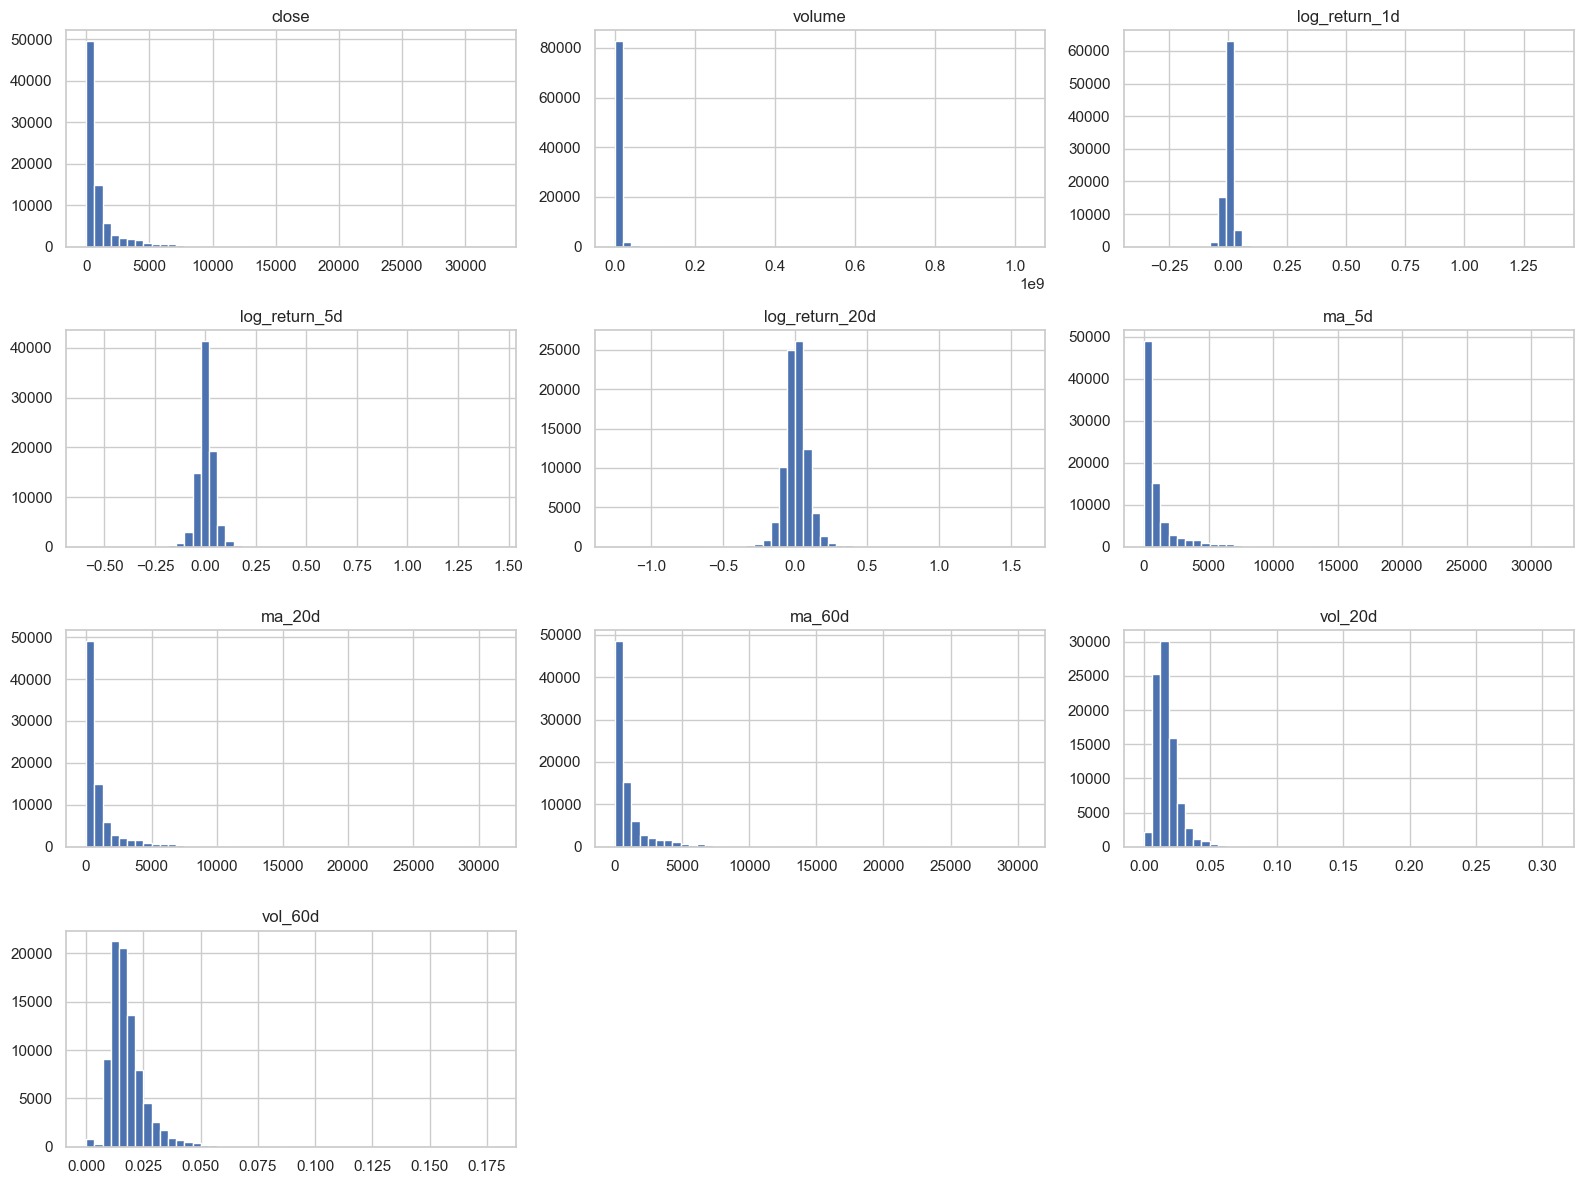

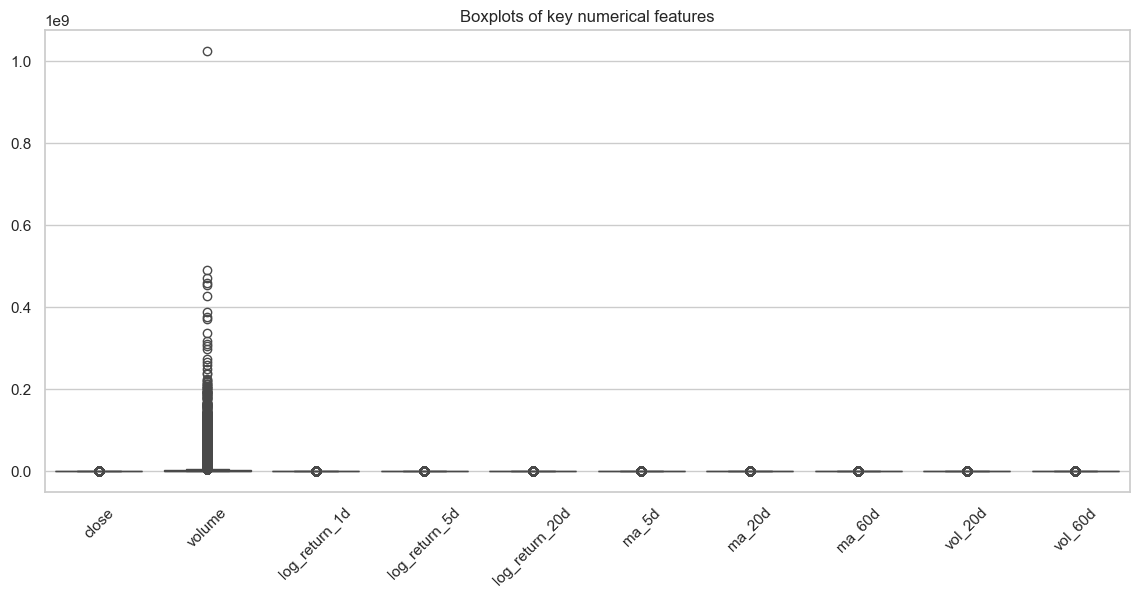

In [39]:
import numpy as np

num_cols = [
    "close", "volume", 
    "log_return_1d", "log_return_5d", "log_return_20d",
    "ma_5d", "ma_20d", "ma_60d",
    "vol_20d", "vol_60d",
]

num_cols = [c for c in num_cols if c in daily.columns]

# 1) Replace inf/-inf with NaN
daily_plot = daily.copy()
daily_plot[num_cols] = daily_plot[num_cols].replace([np.inf, -np.inf], np.nan)

# 2) Drop rows where all selected cols are NaN
daily_plot = daily_plot.dropna(subset=num_cols, how="all")

# 3) (Optional) Drop rows where a specific key column is NaN, e.g. log_return_1d
# daily_plot = daily_plot.dropna(subset=["log_return_1d"])

# Histograms
daily_plot[num_cols].hist(bins=50, figsize=(16, 12))
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(14, 6))
sns.boxplot(data=daily_plot[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of key numerical features")
plt.show()

##### Check the correlation and histograms company wise


=== ADANIGREEN ===


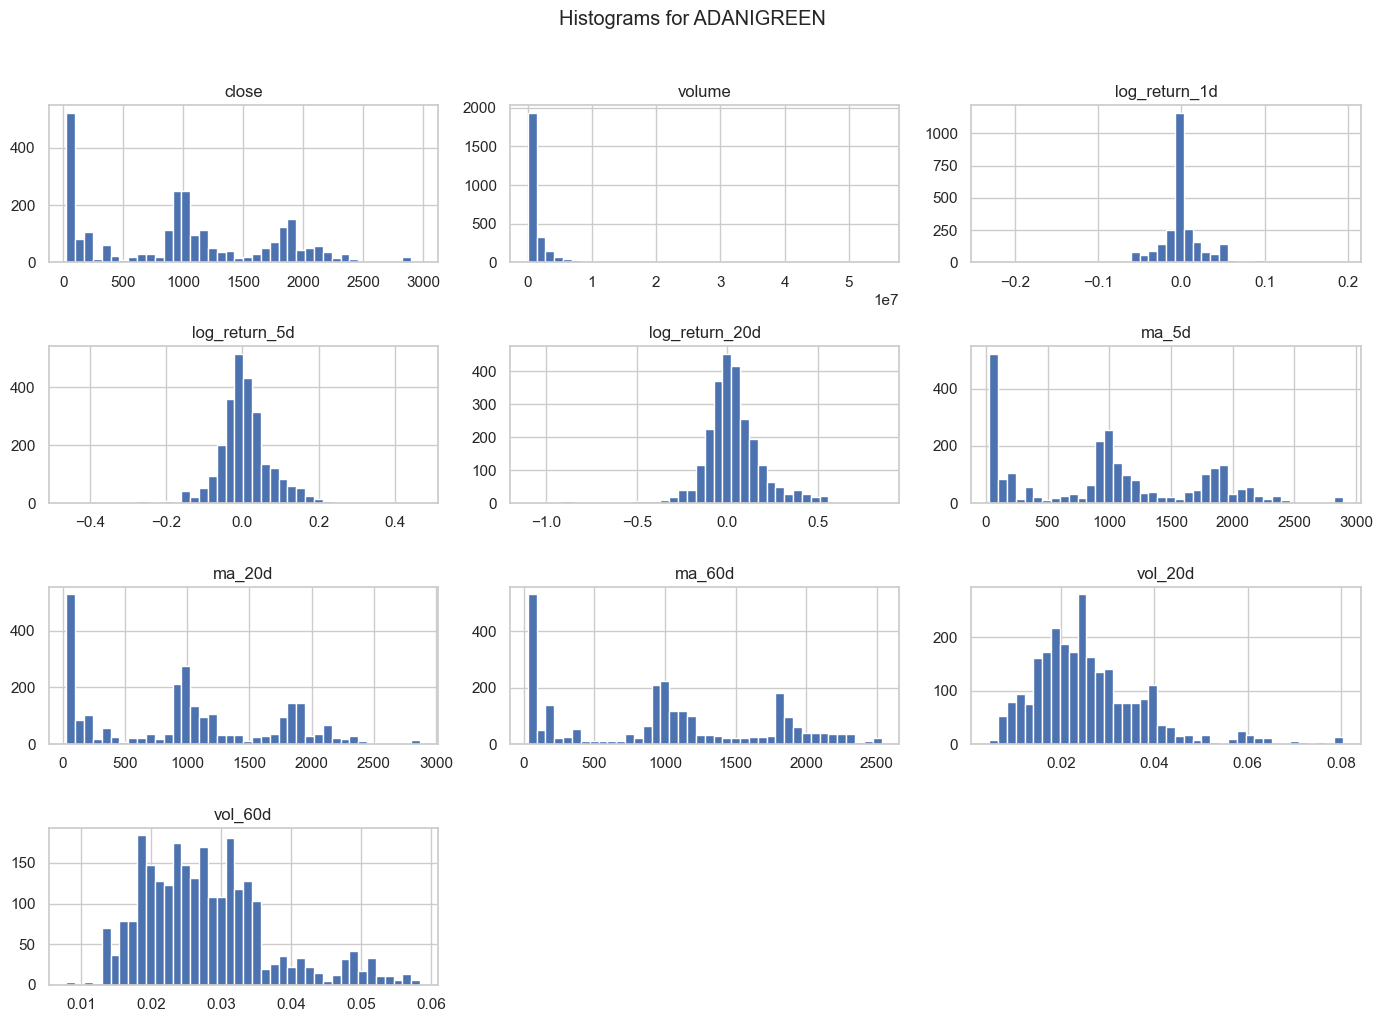

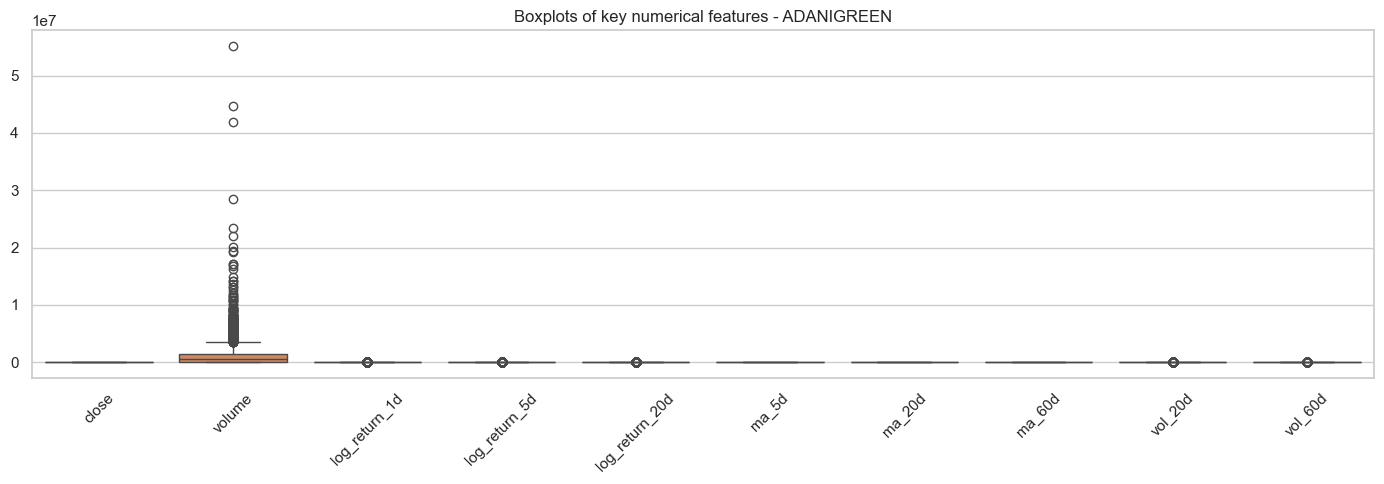


=== ADANIPOWER ===


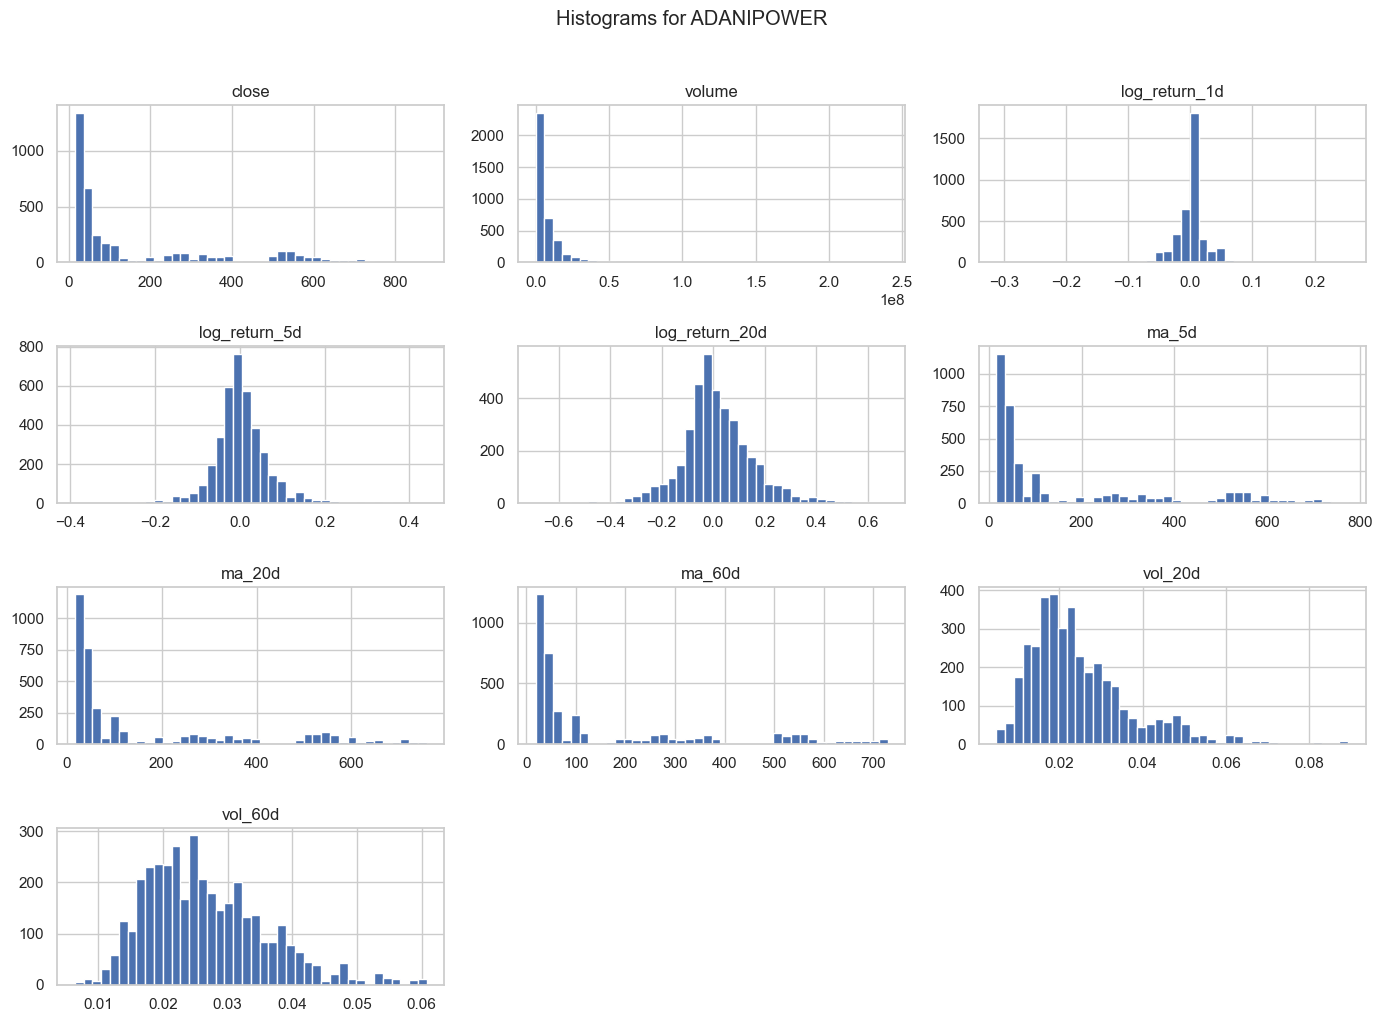

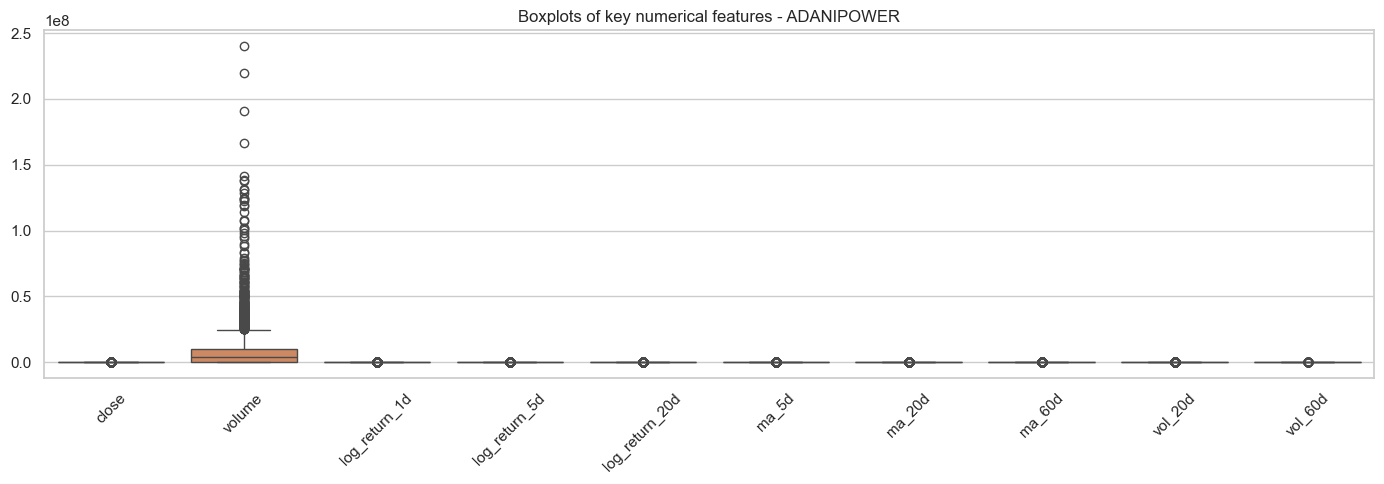


=== AMBUJACEM ===


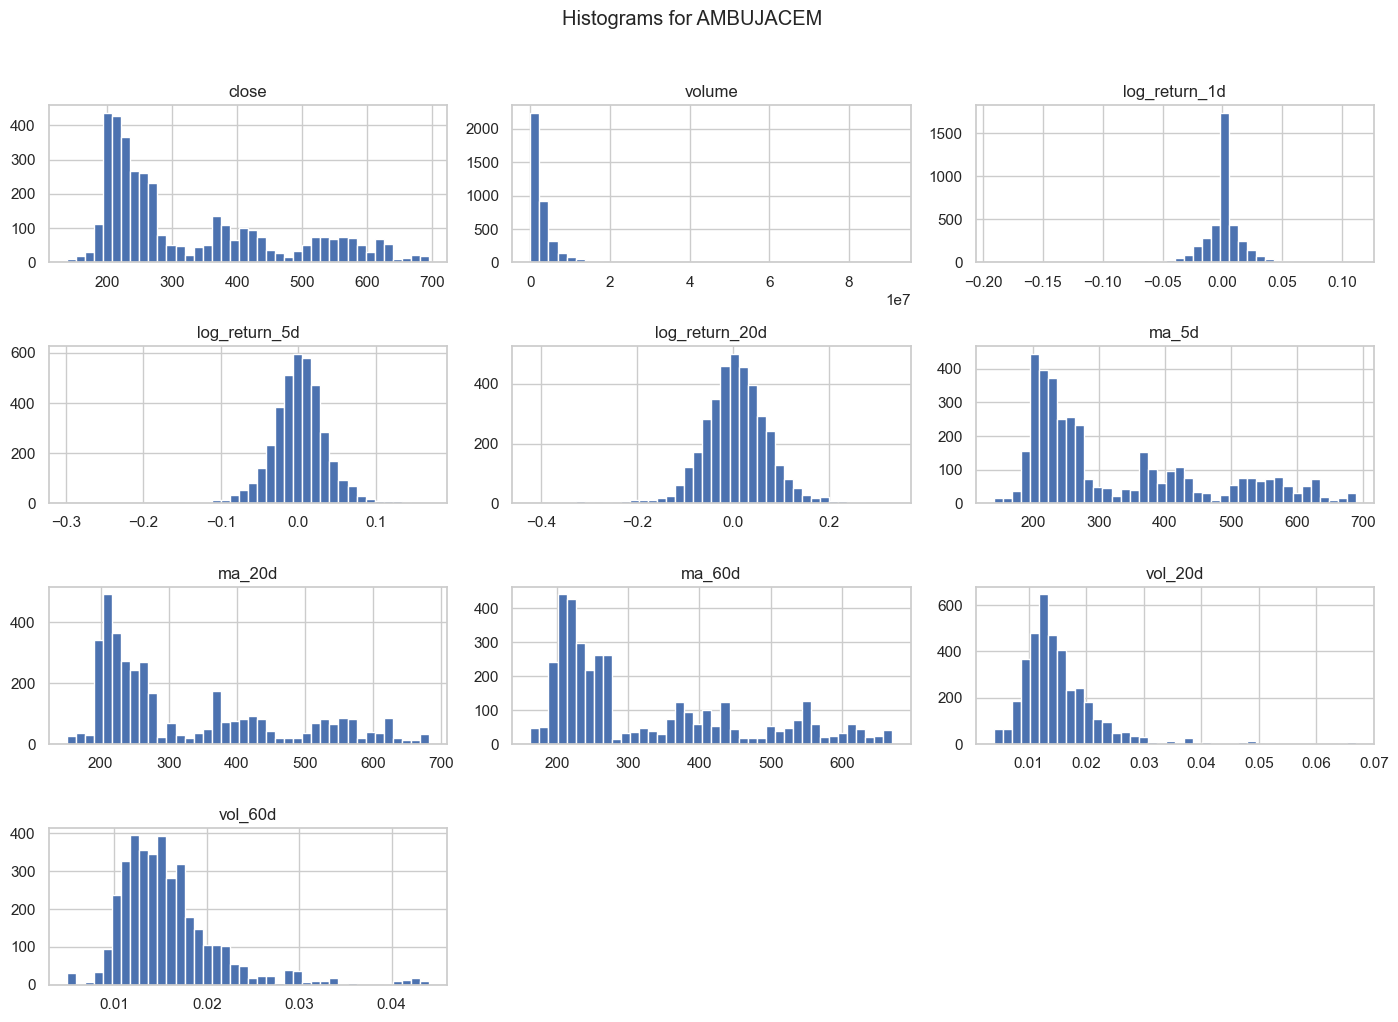

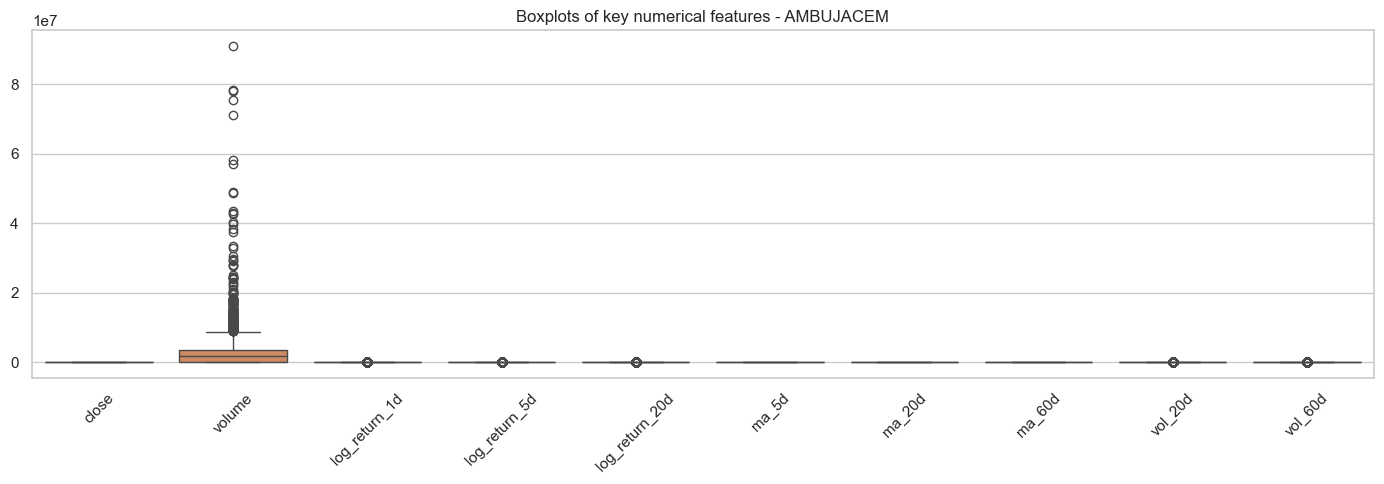


=== ATGL ===


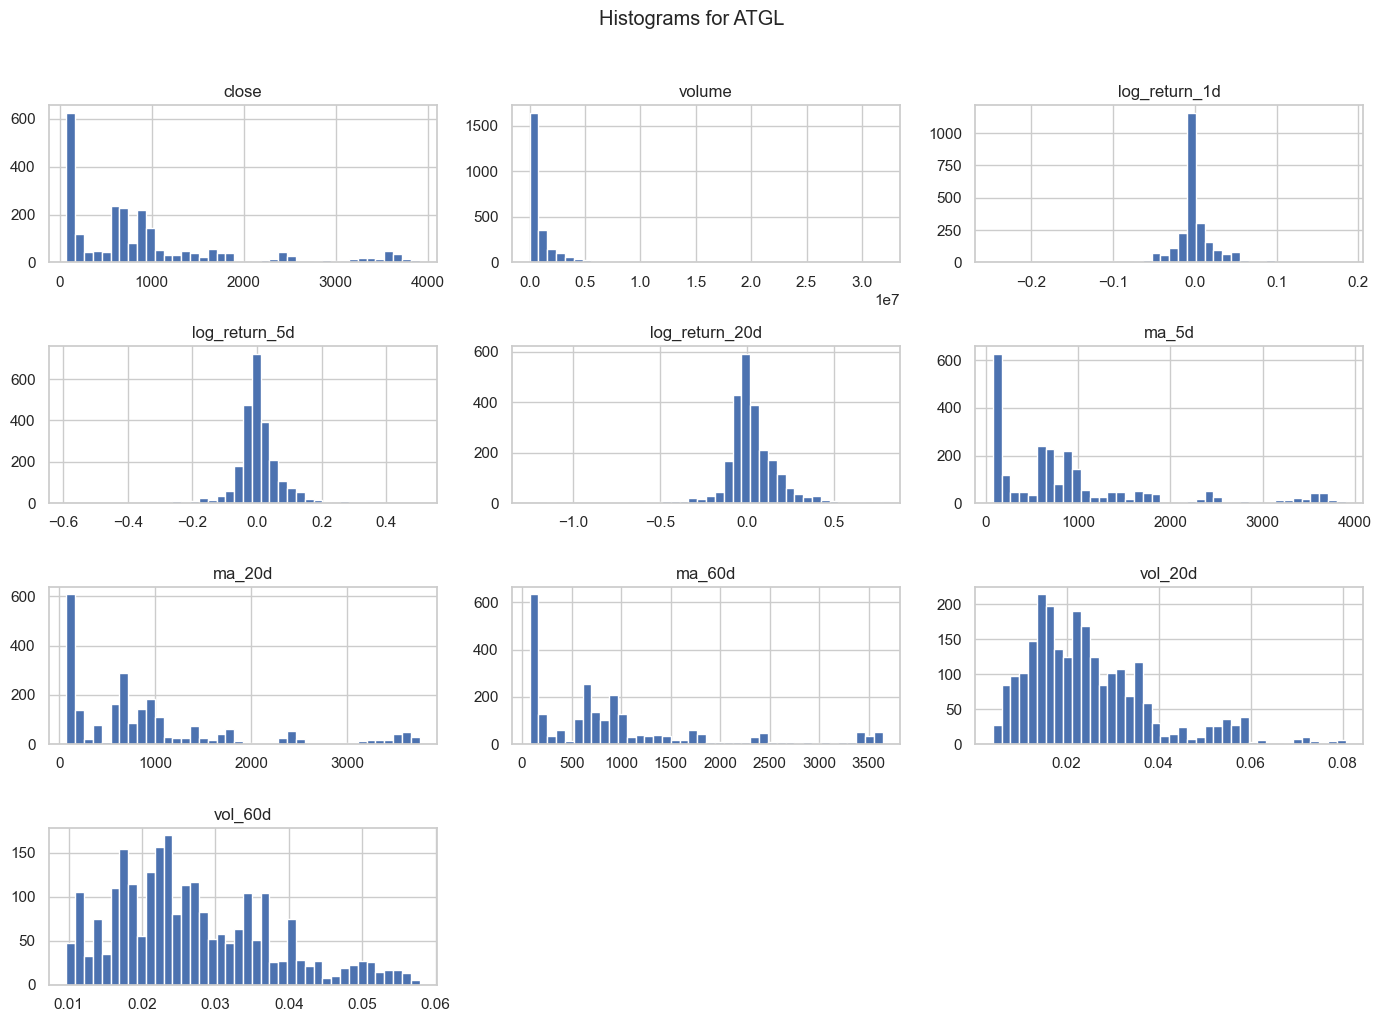

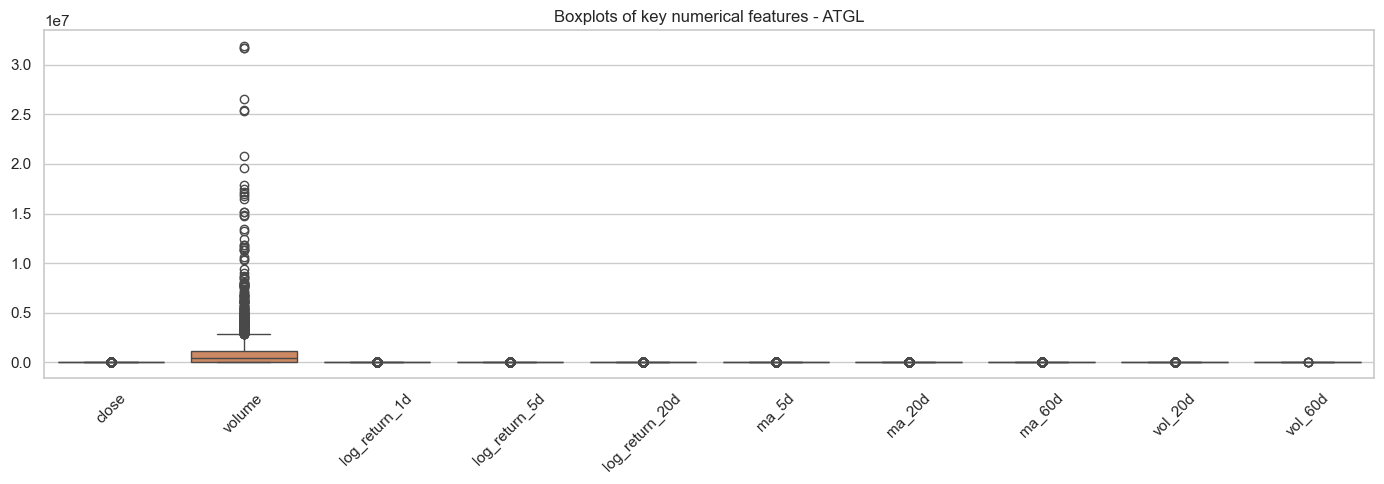


=== BANDHANBNK ===


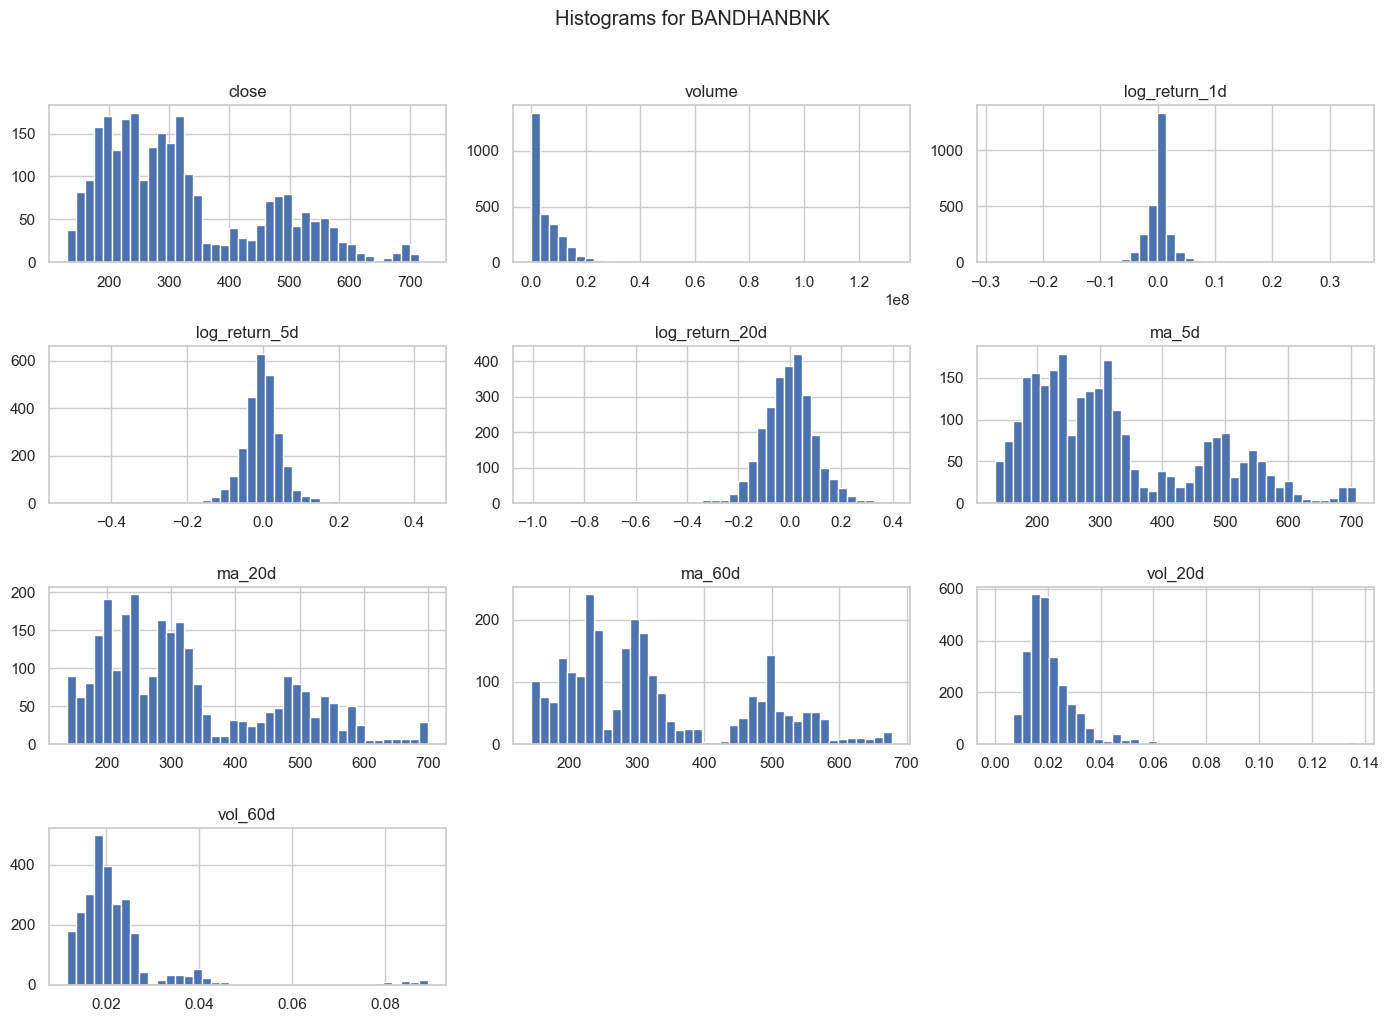

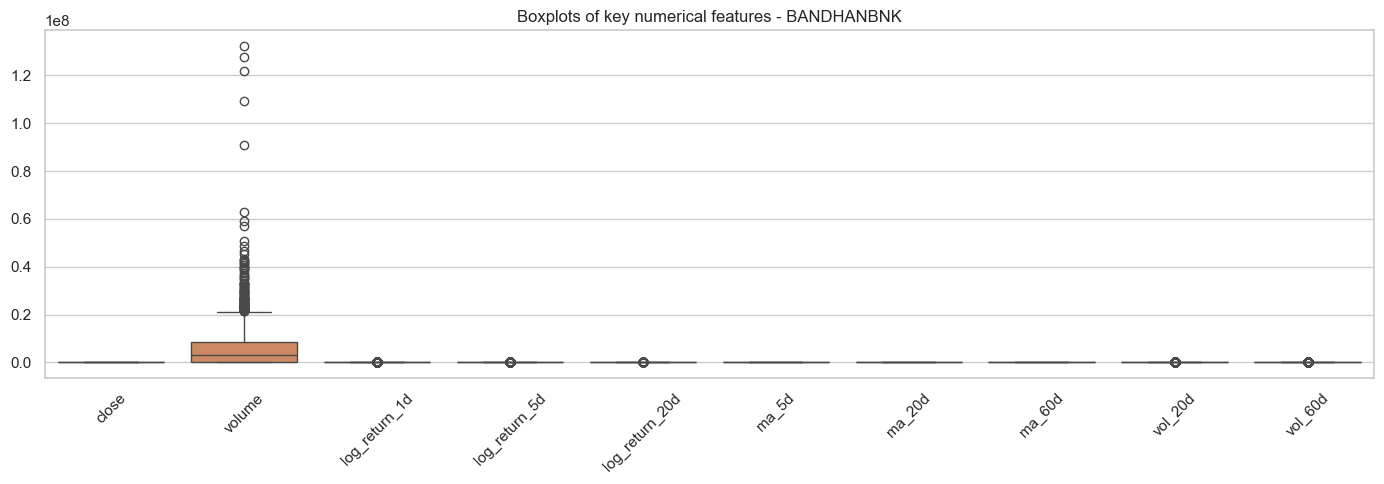


=== BERGEPAINT ===


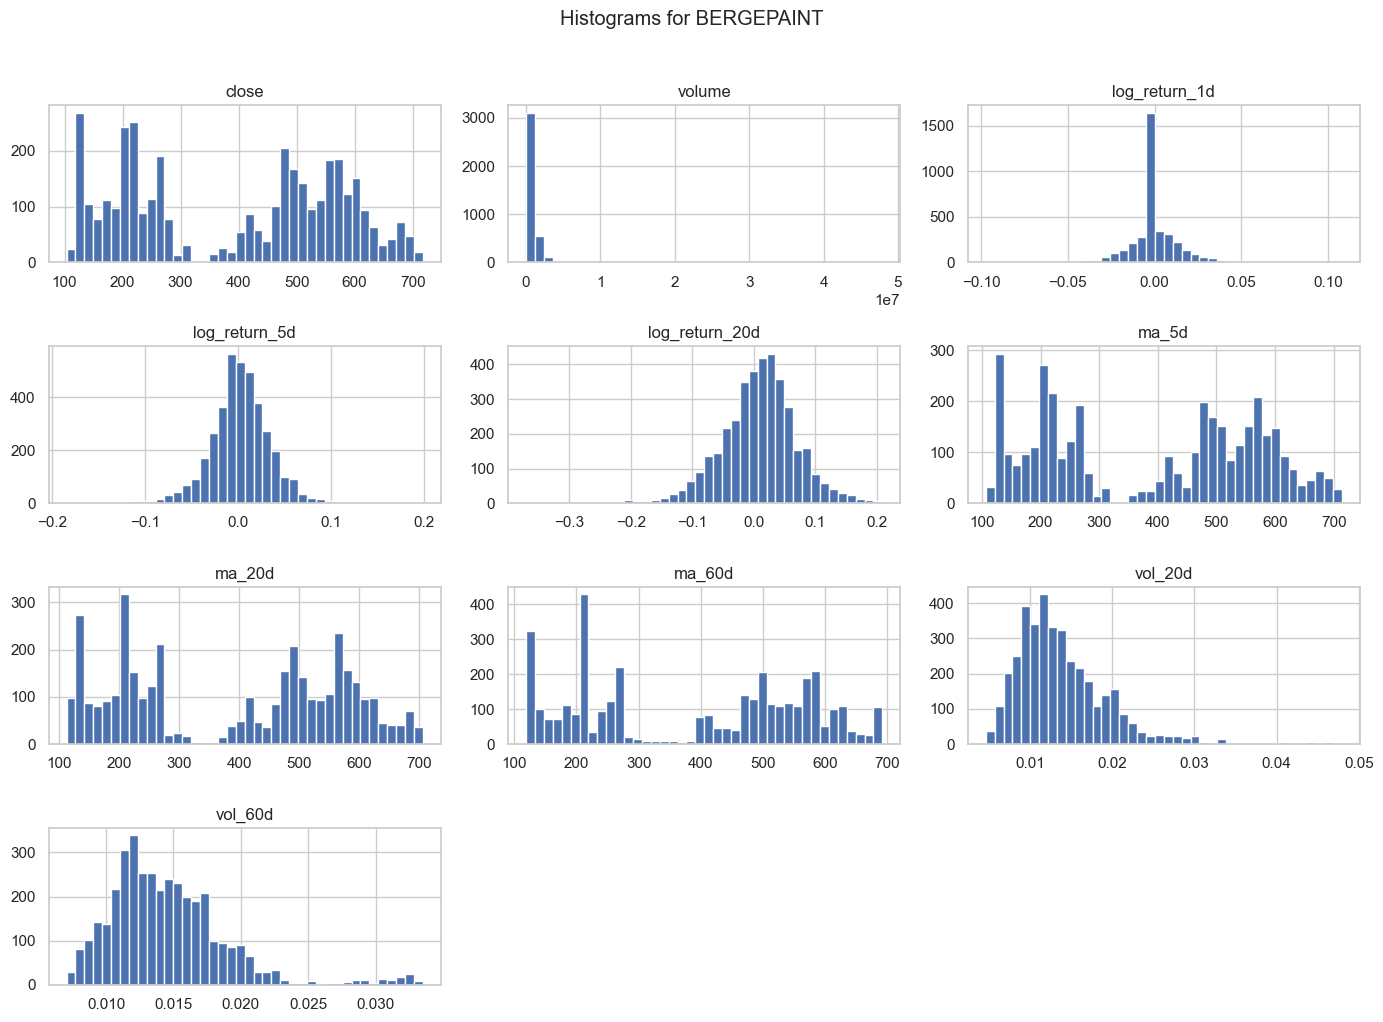

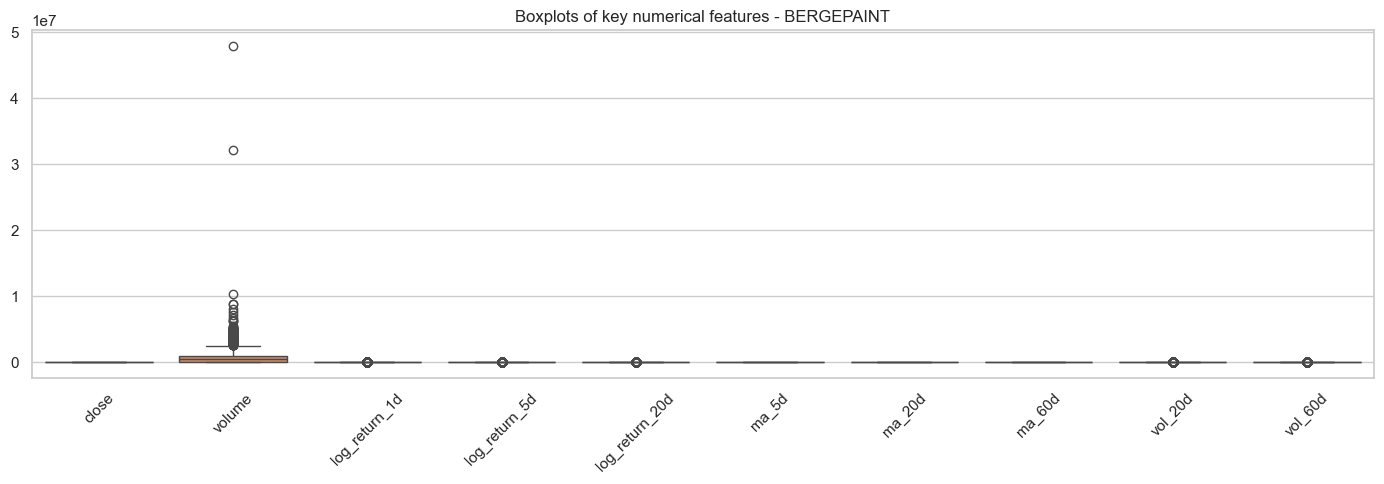


=== BLUEDART ===


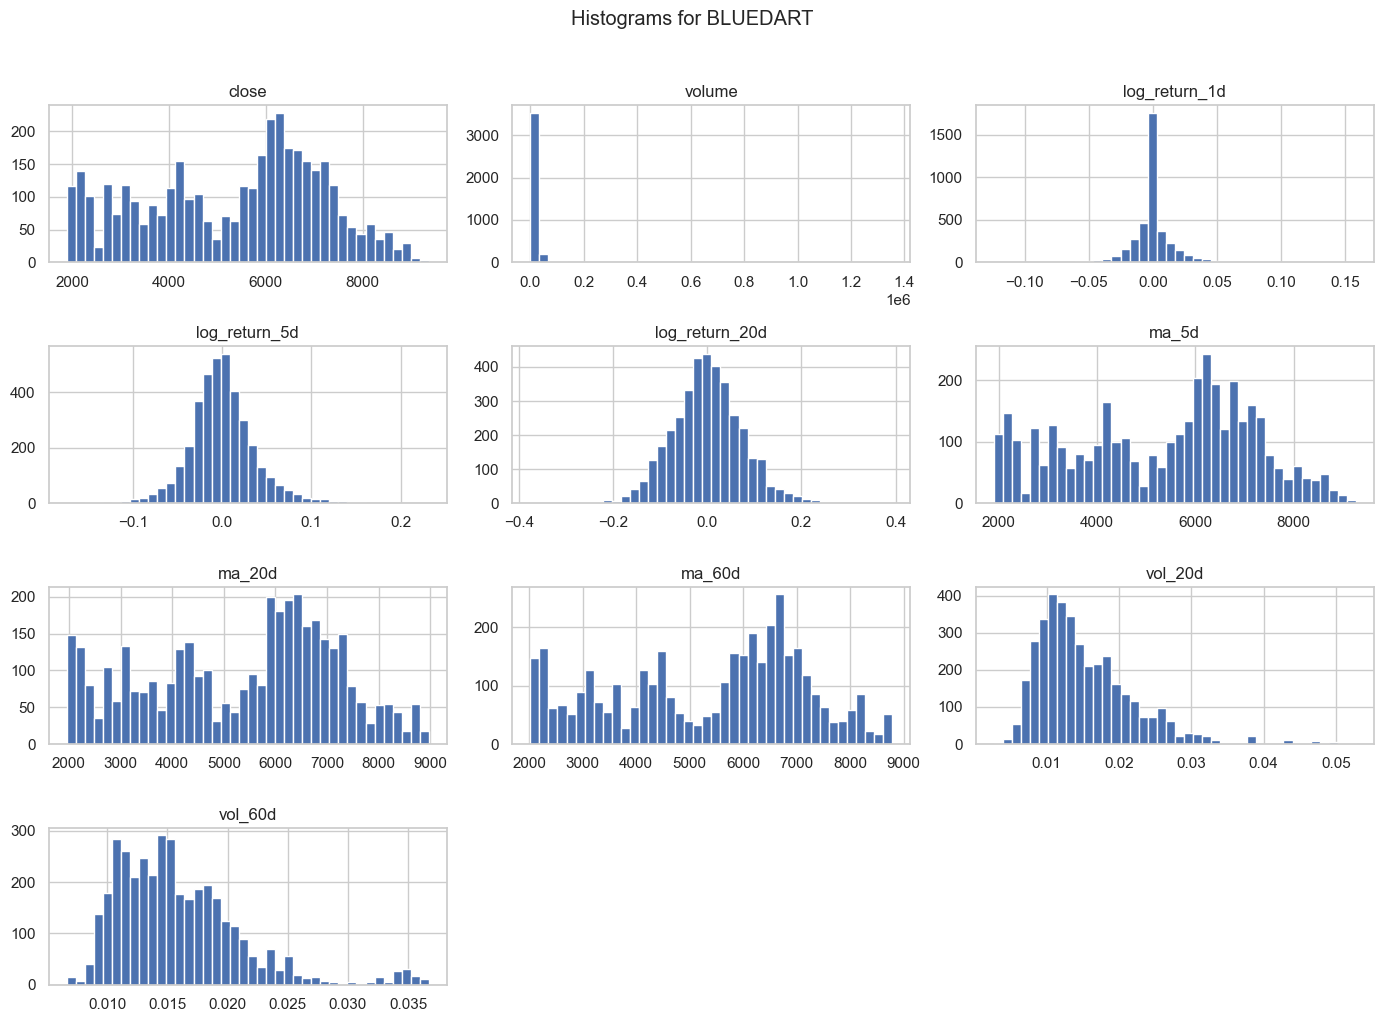

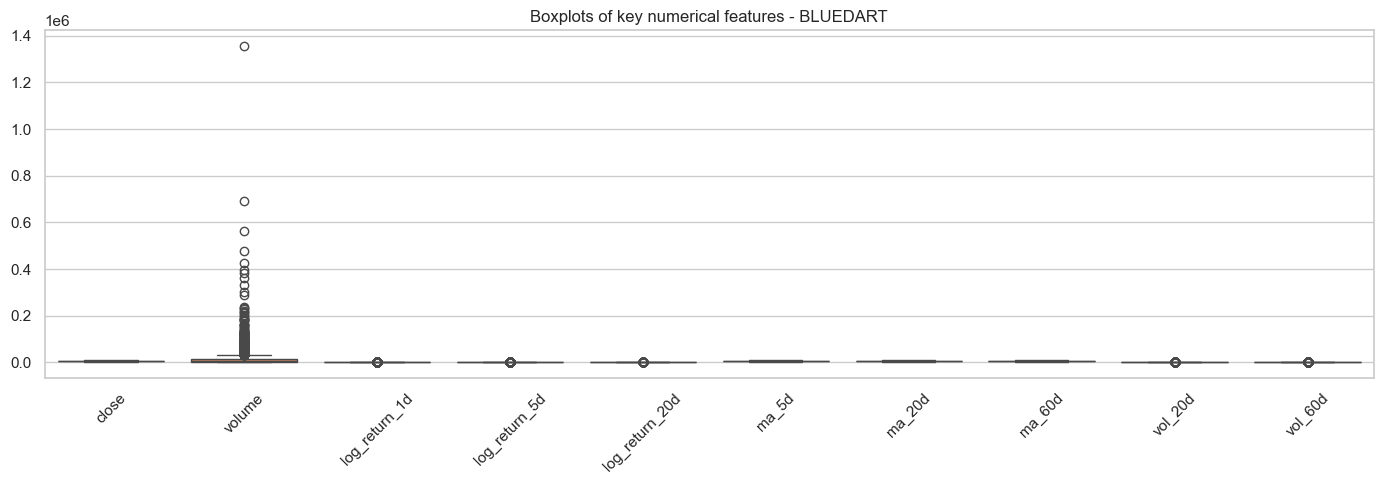


=== CHOLAFIN ===


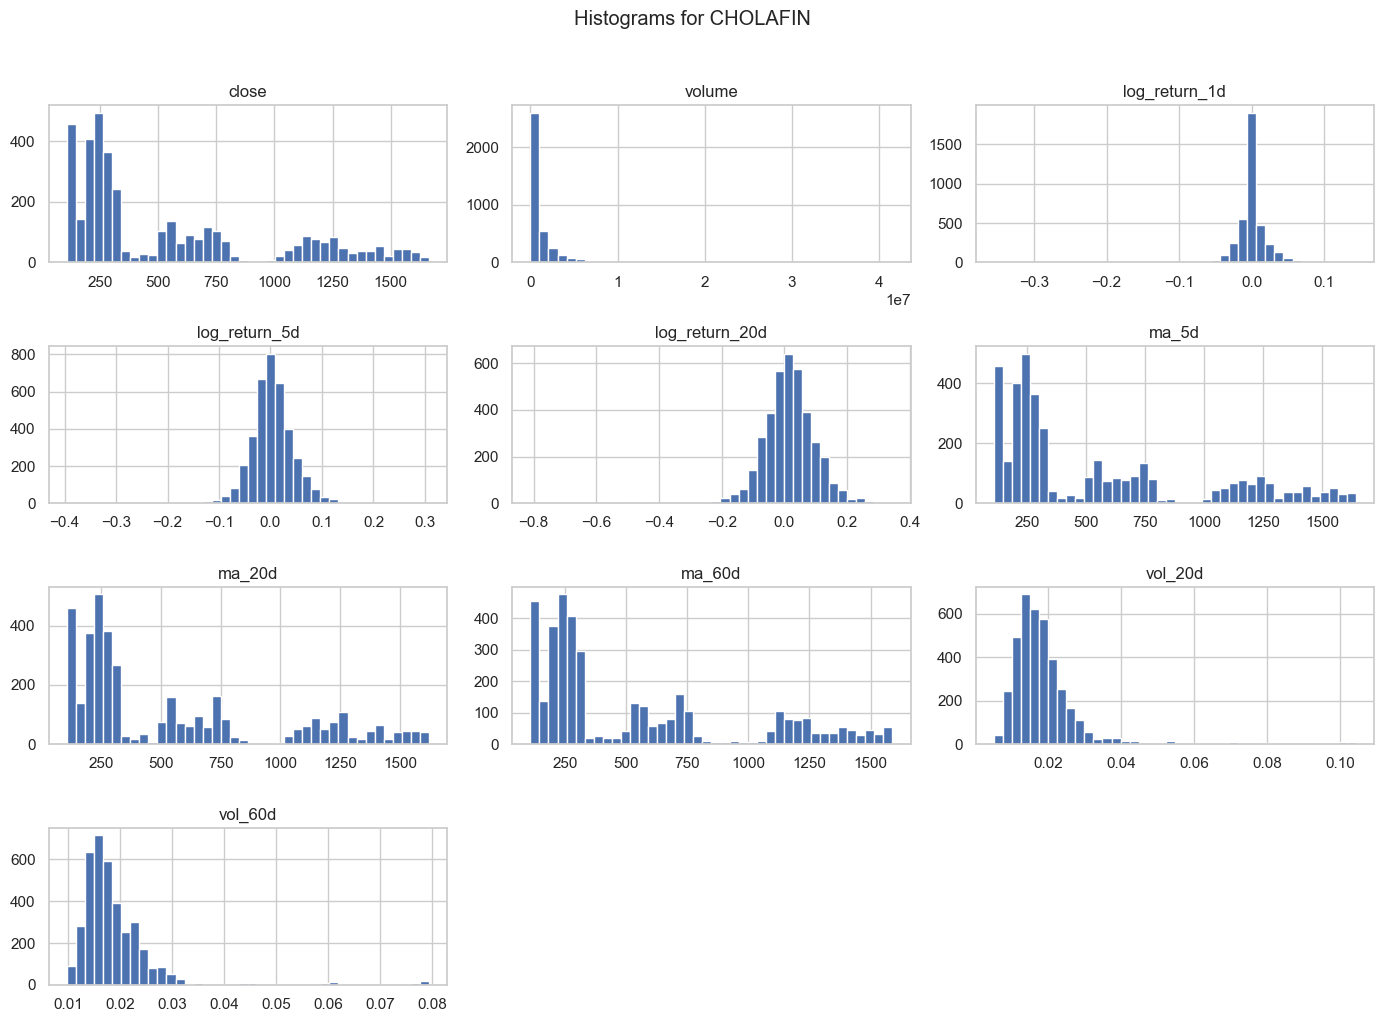

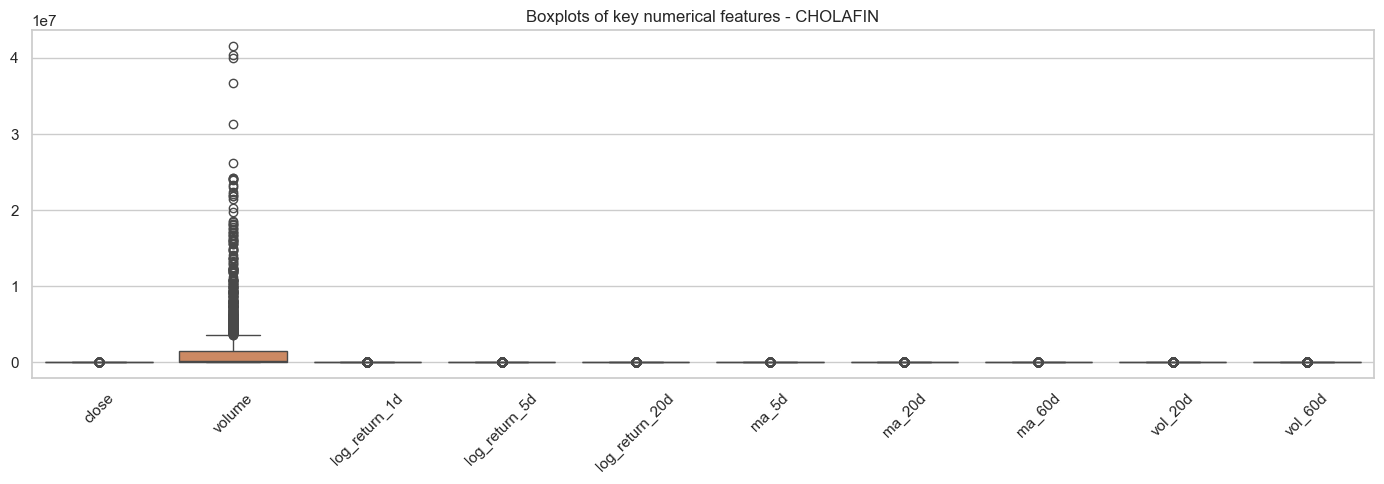


=== DABUR ===


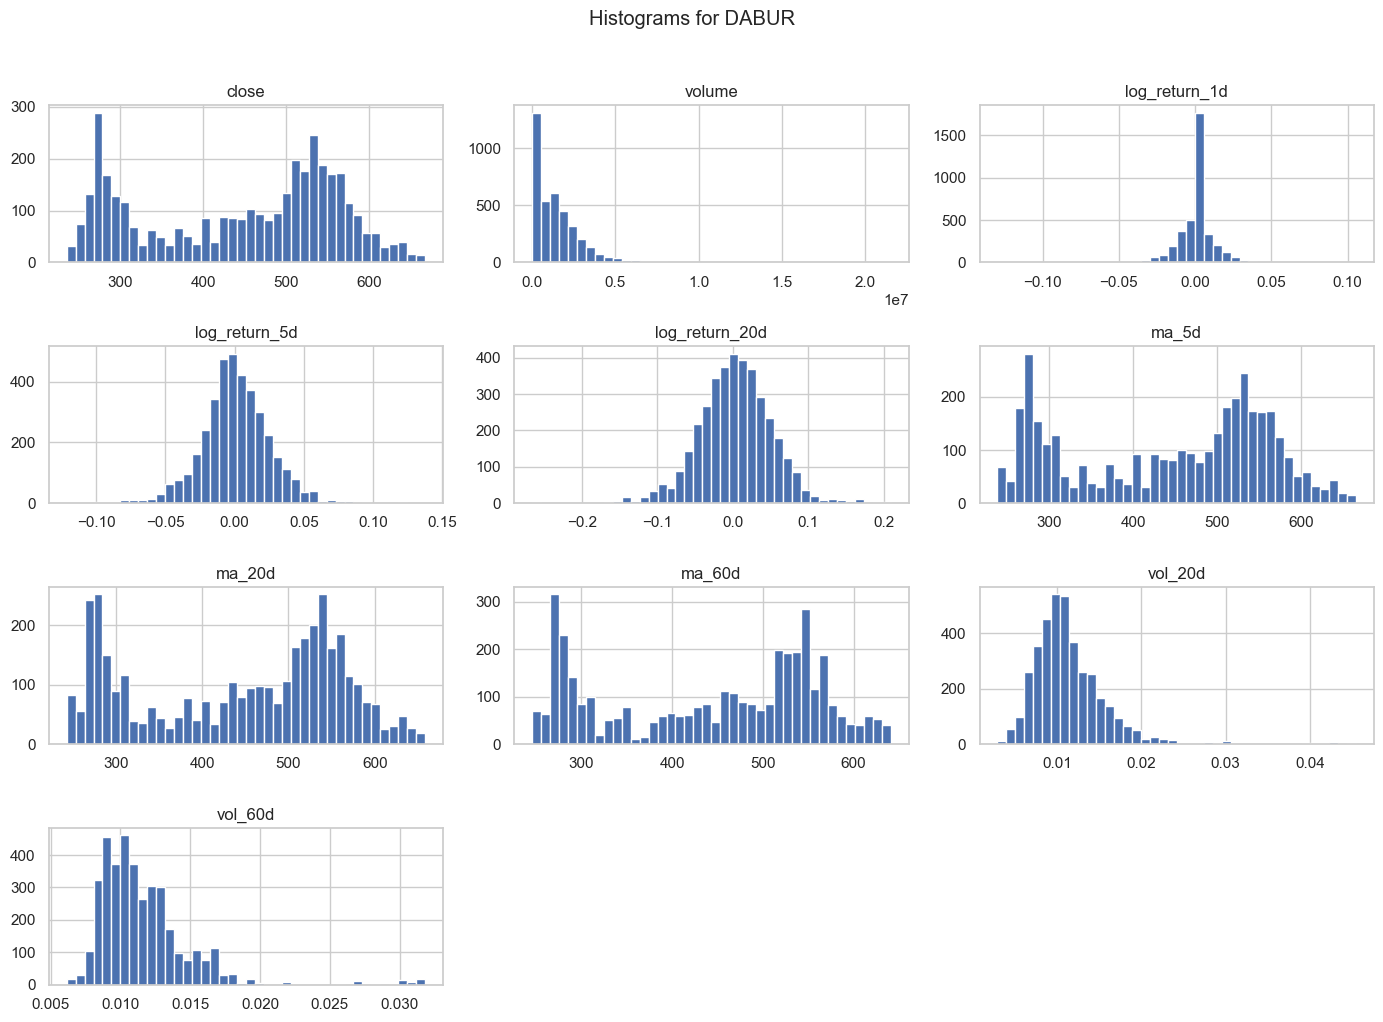

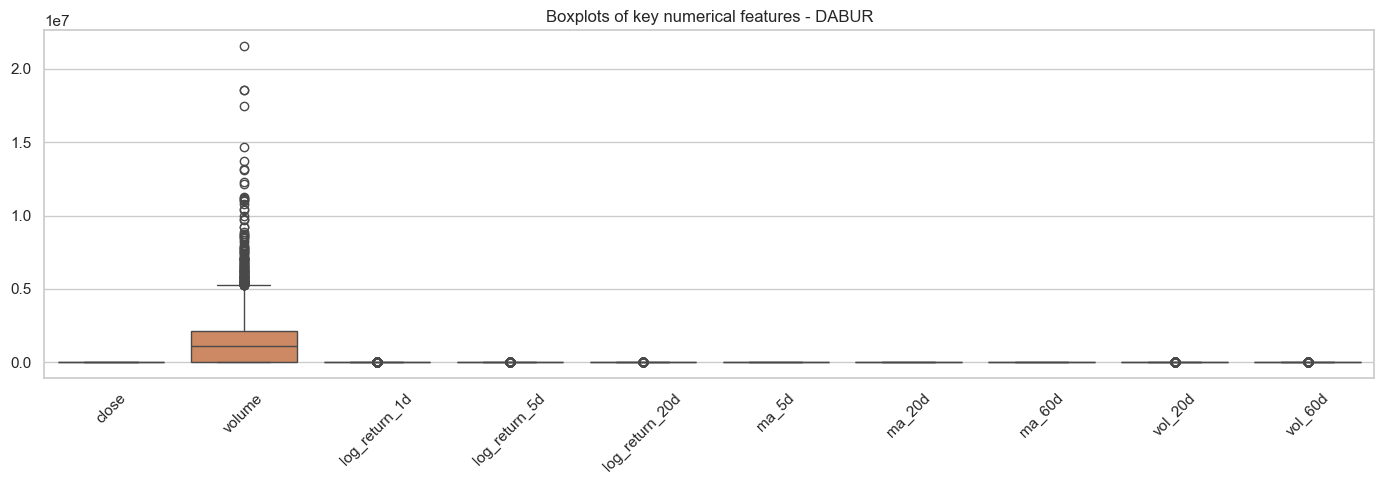


=== DLF ===


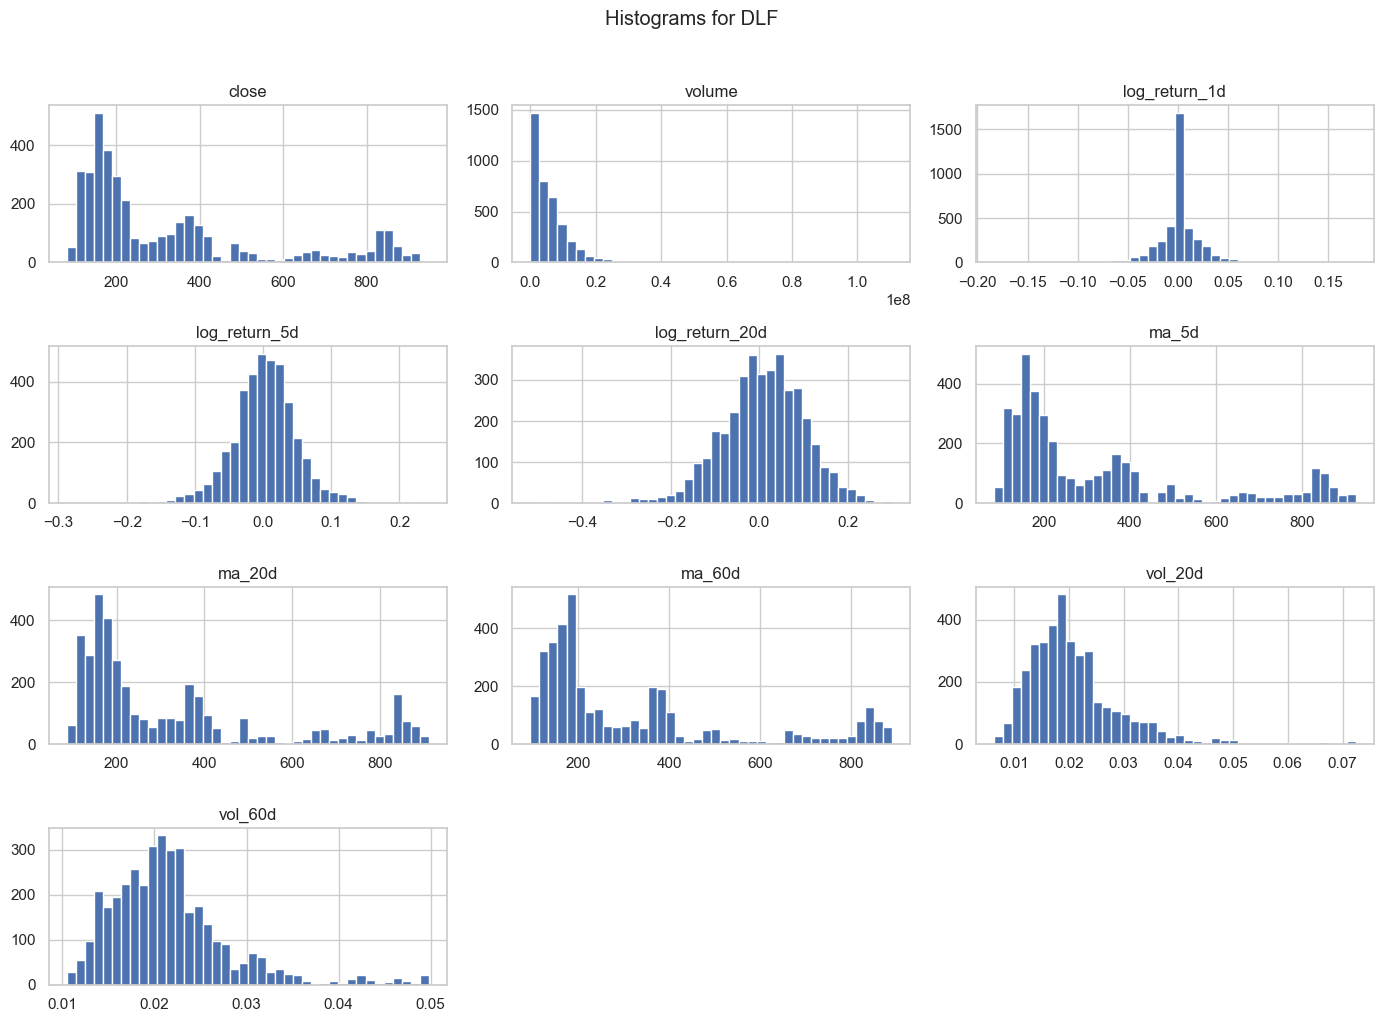

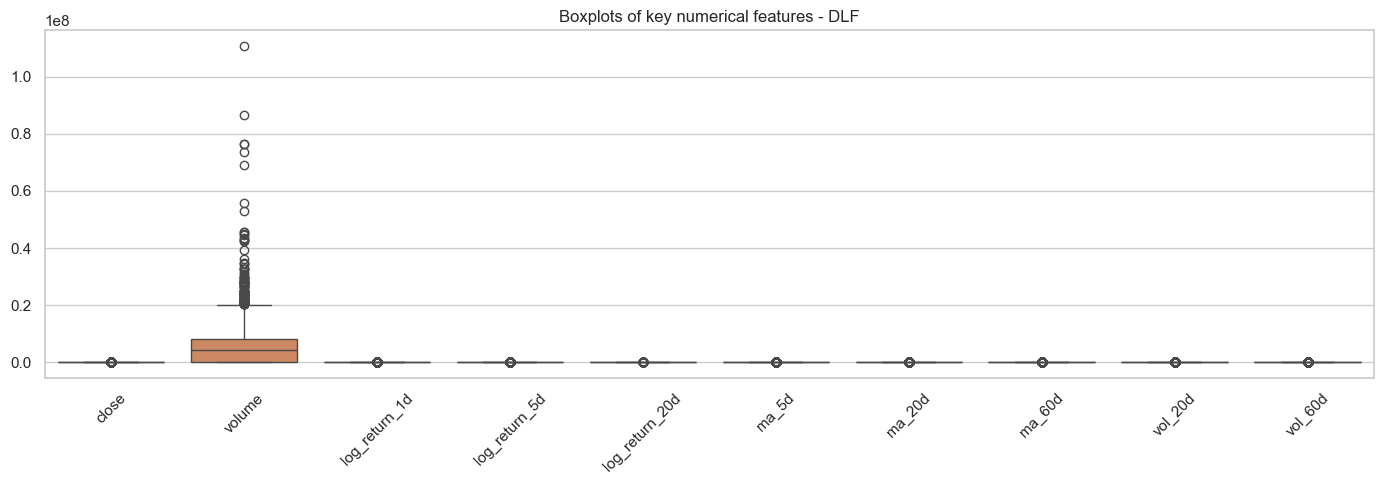


=== DMART ===


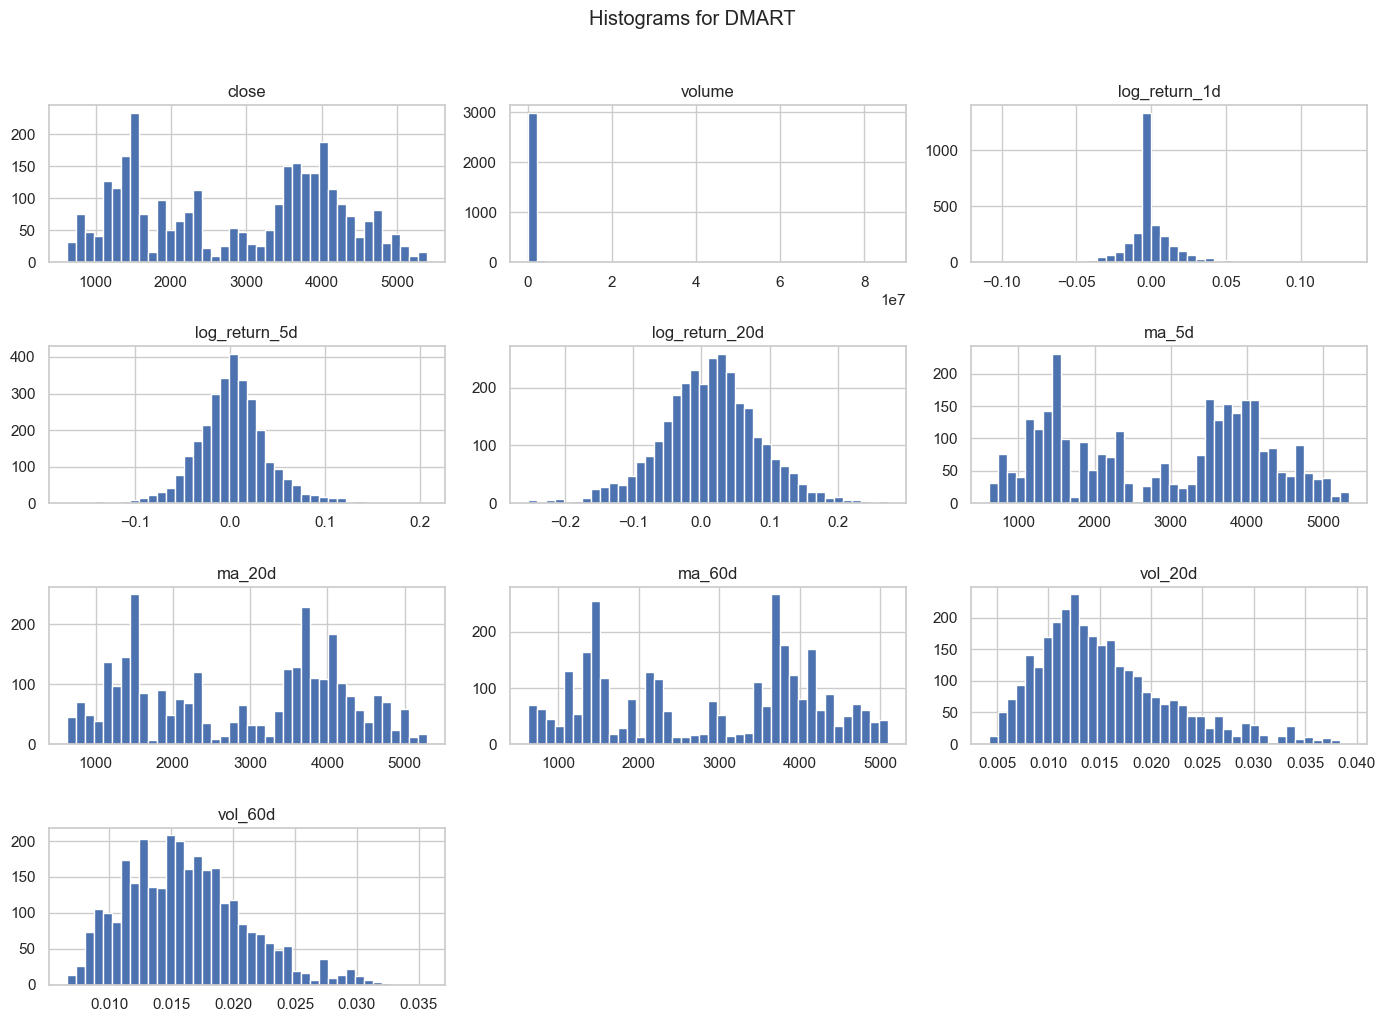

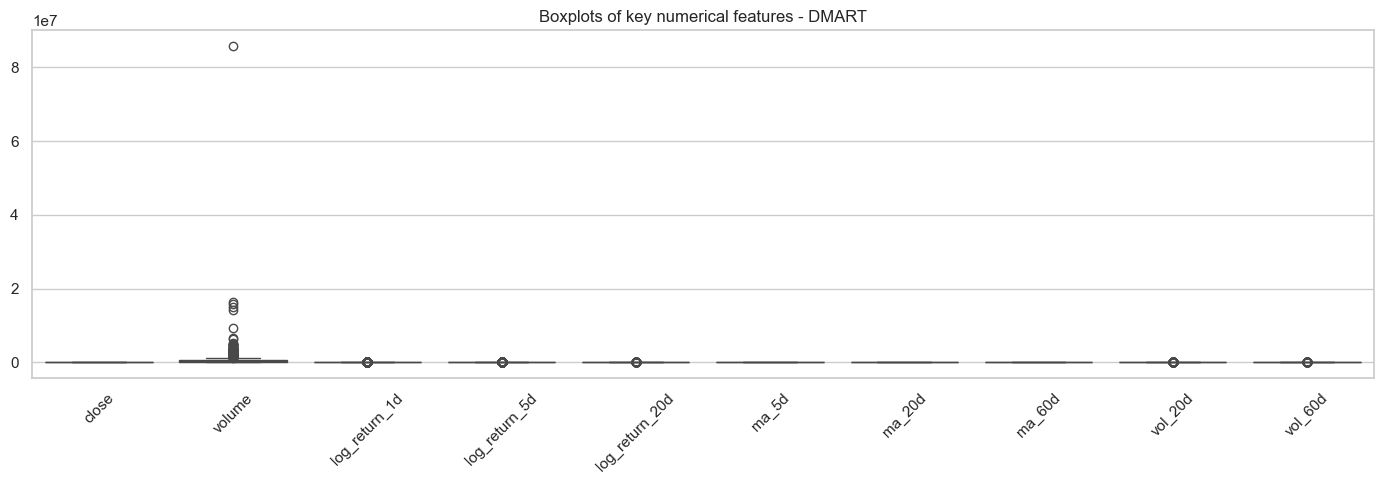


=== GAIL ===


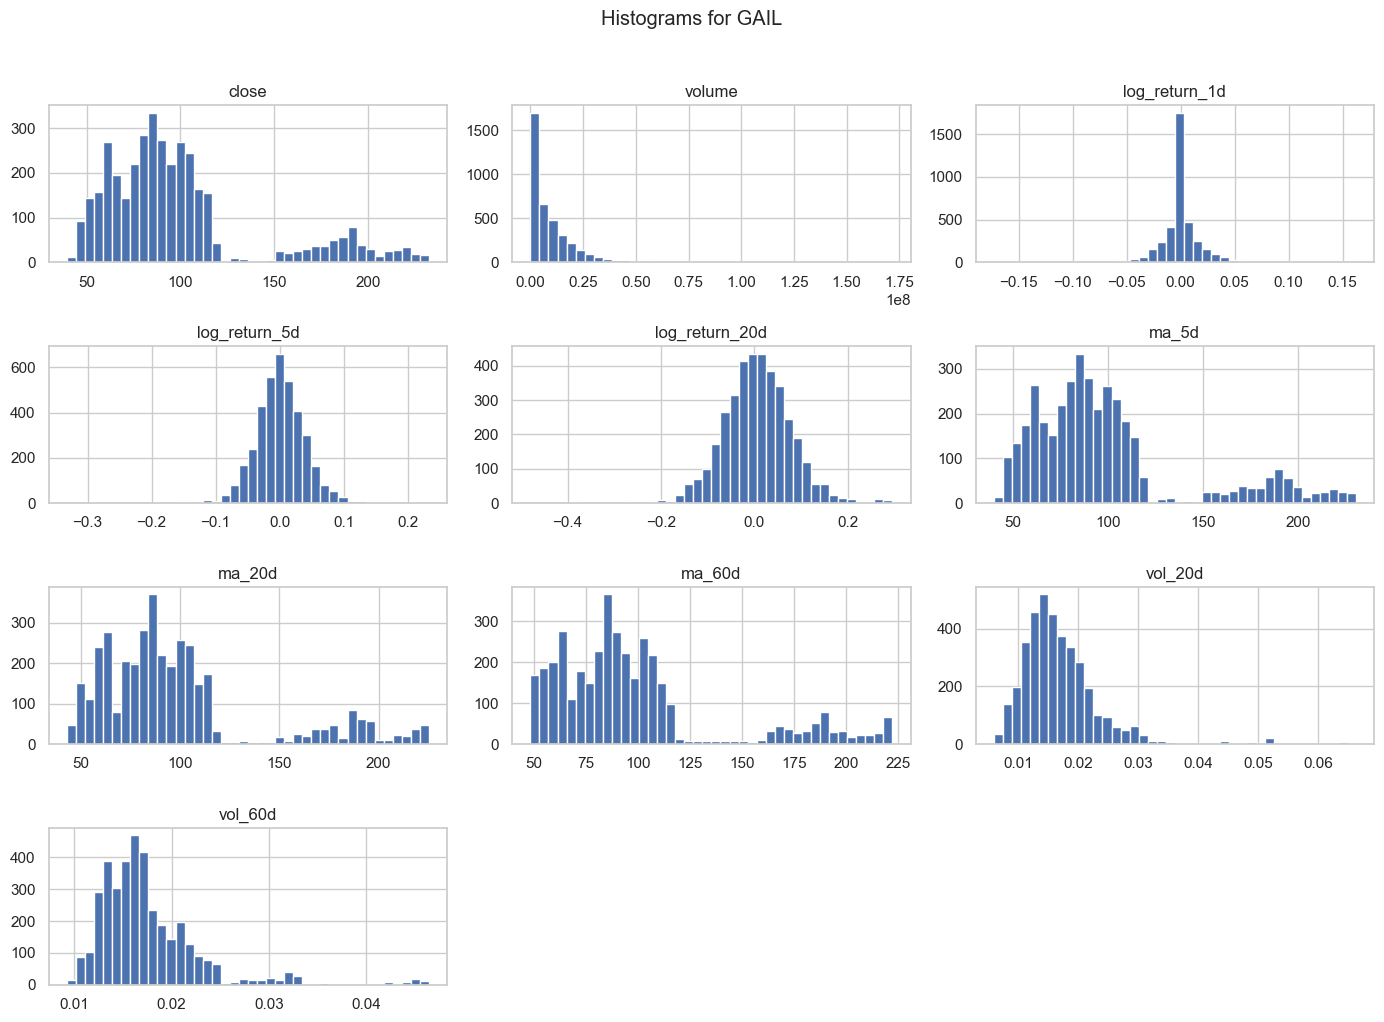

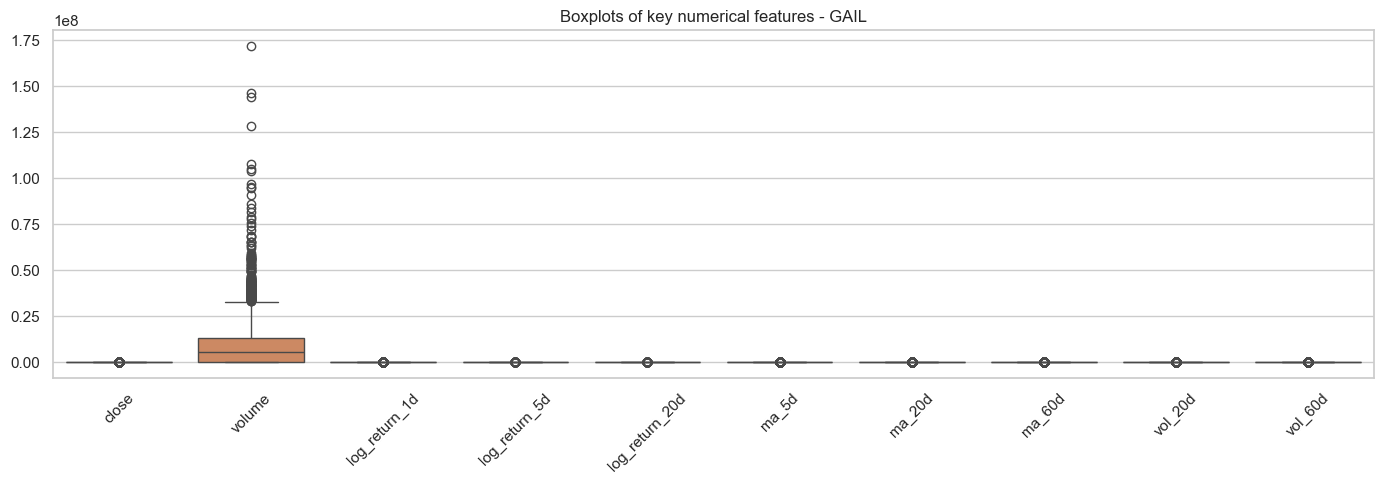


=== GODREJCP ===


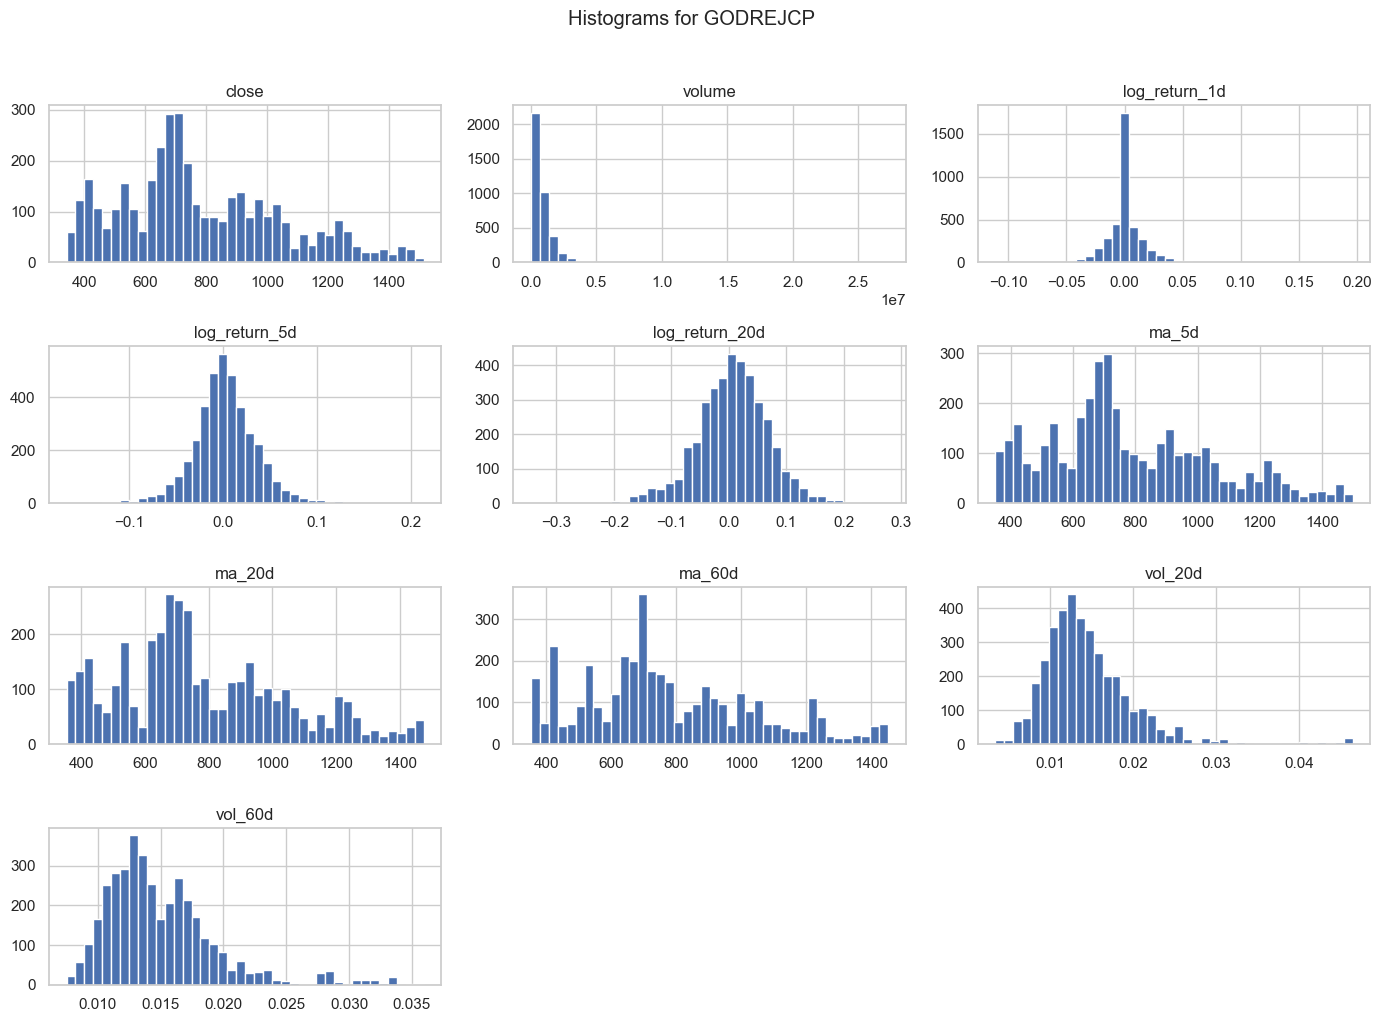

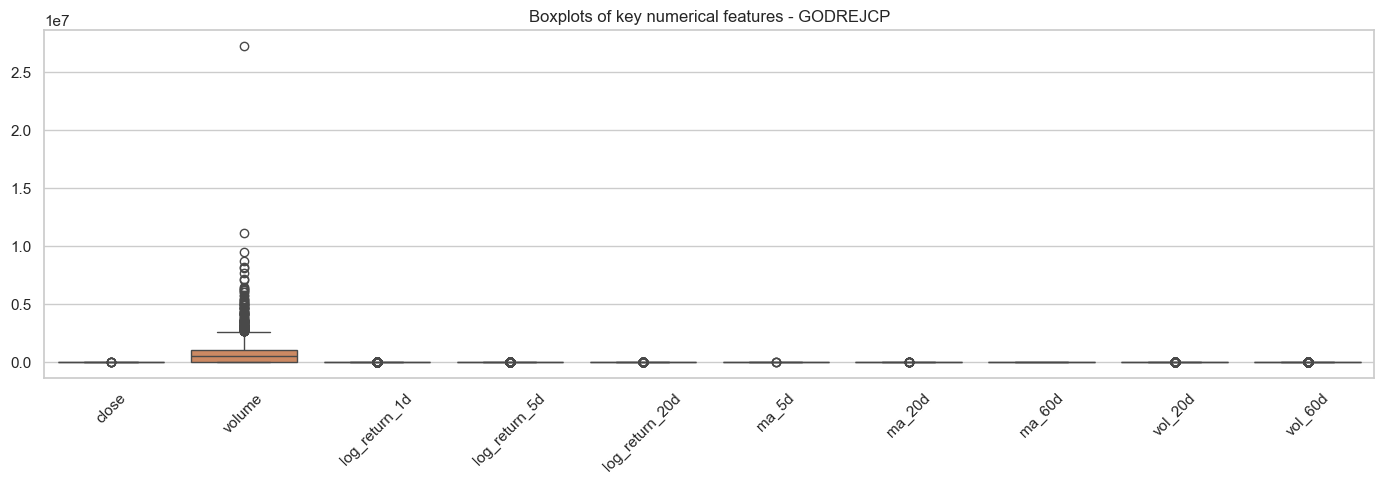


=== HDFCAMC ===


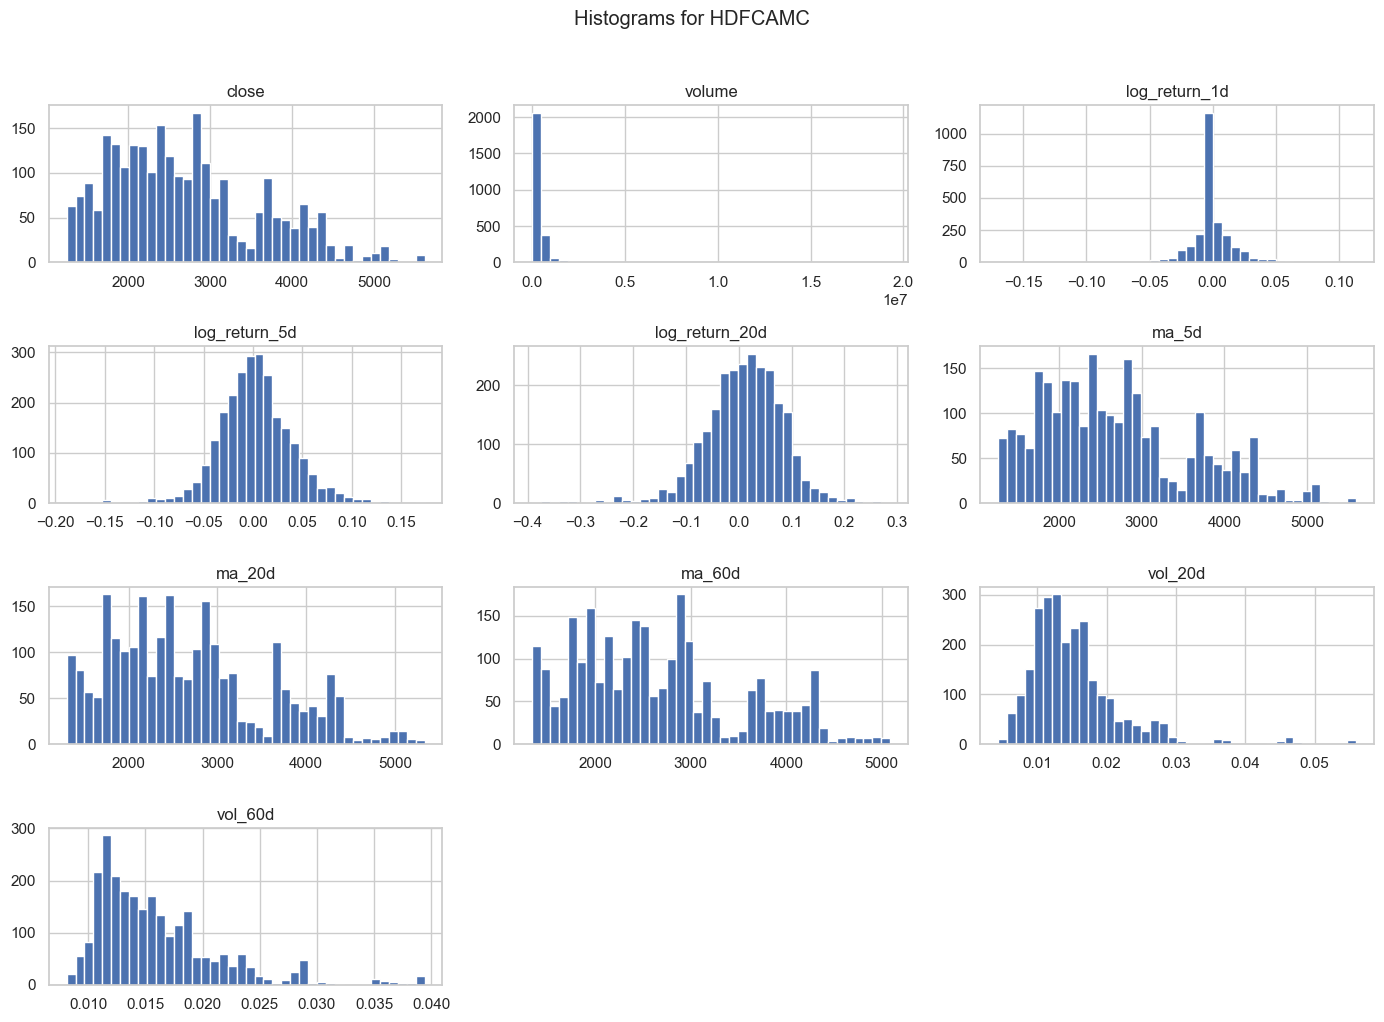

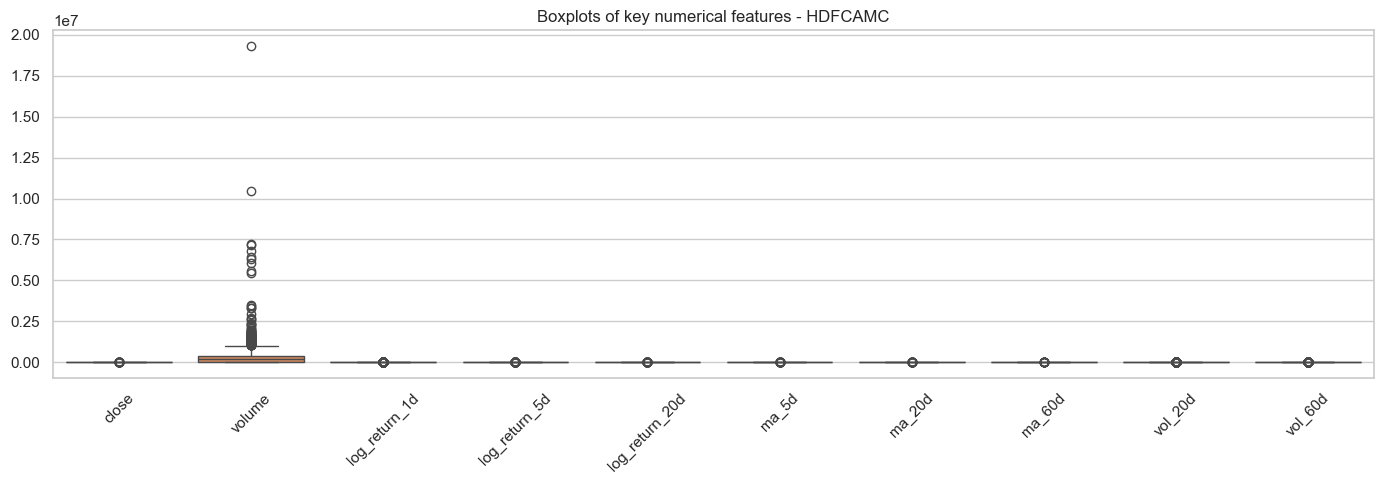


=== ICICIGI ===


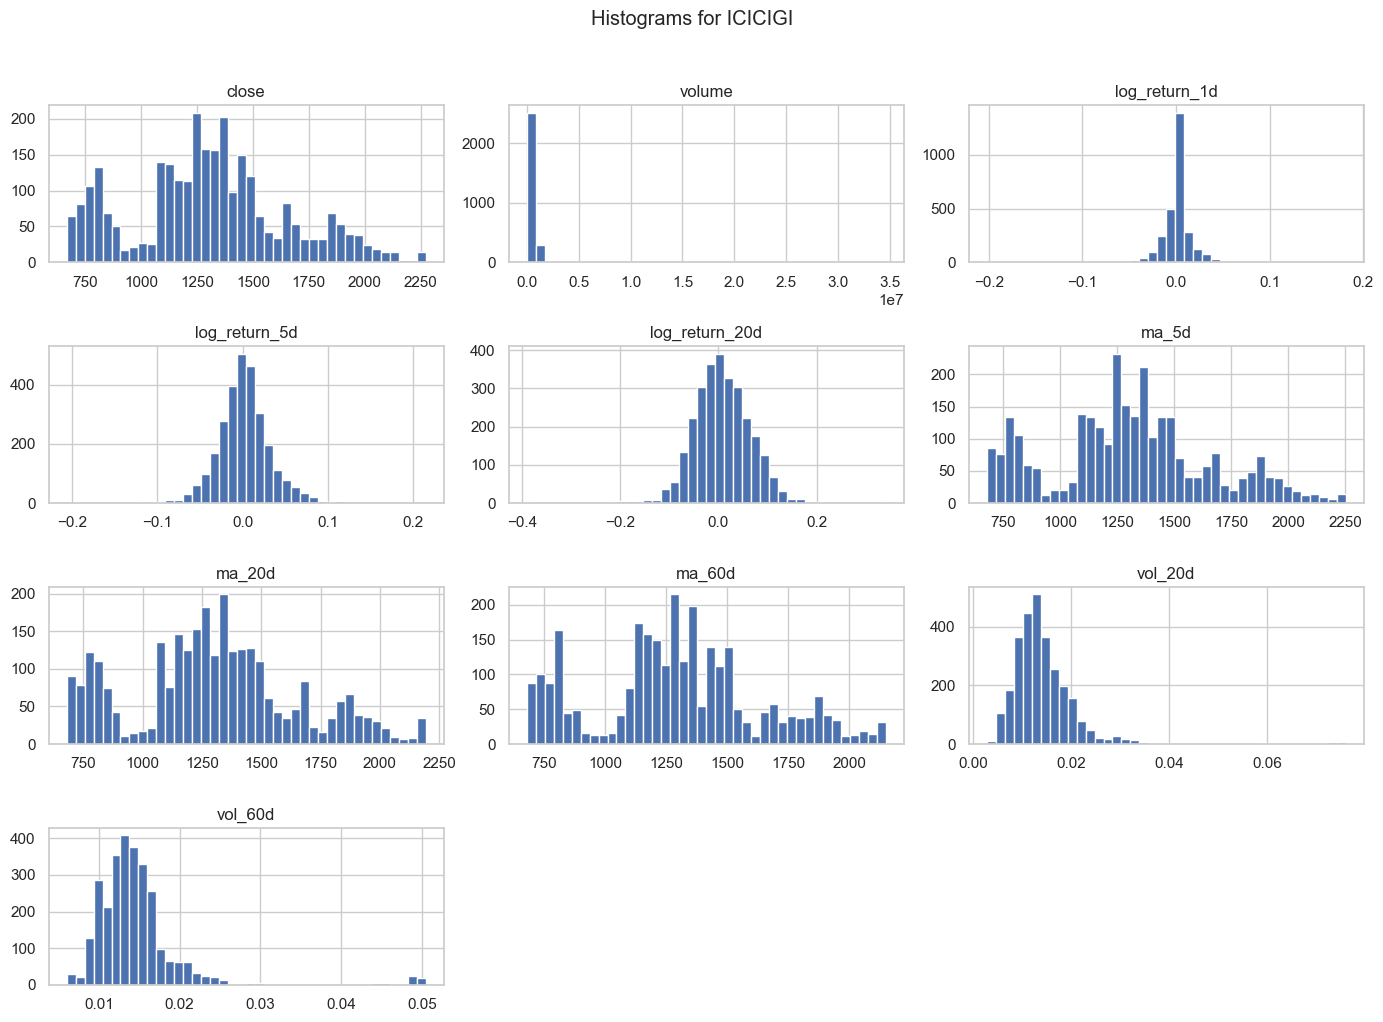

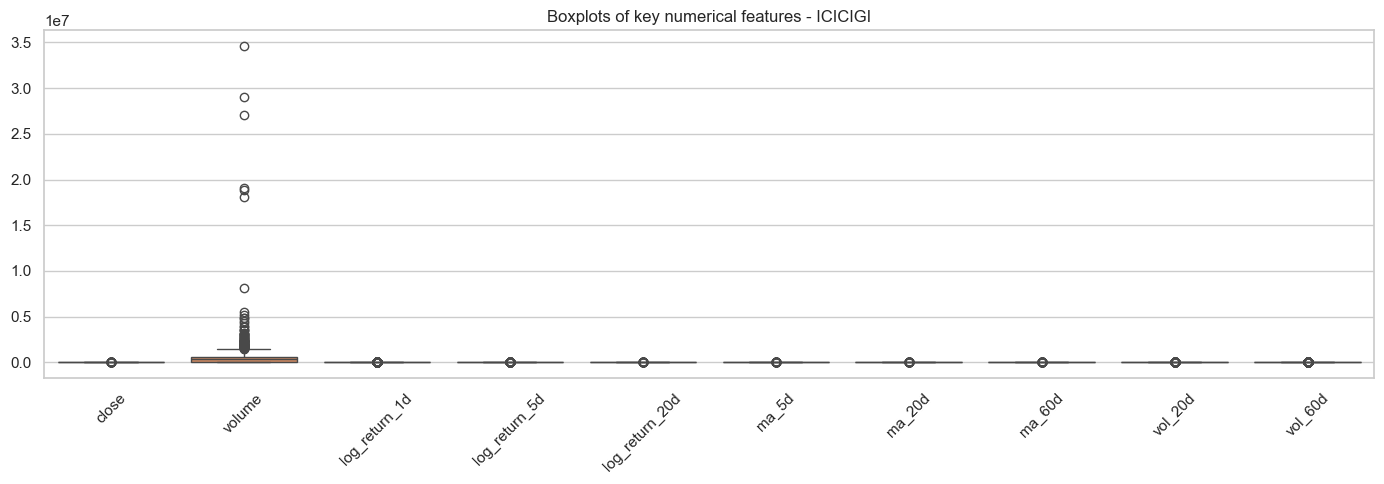


=== ICICIPRULI ===


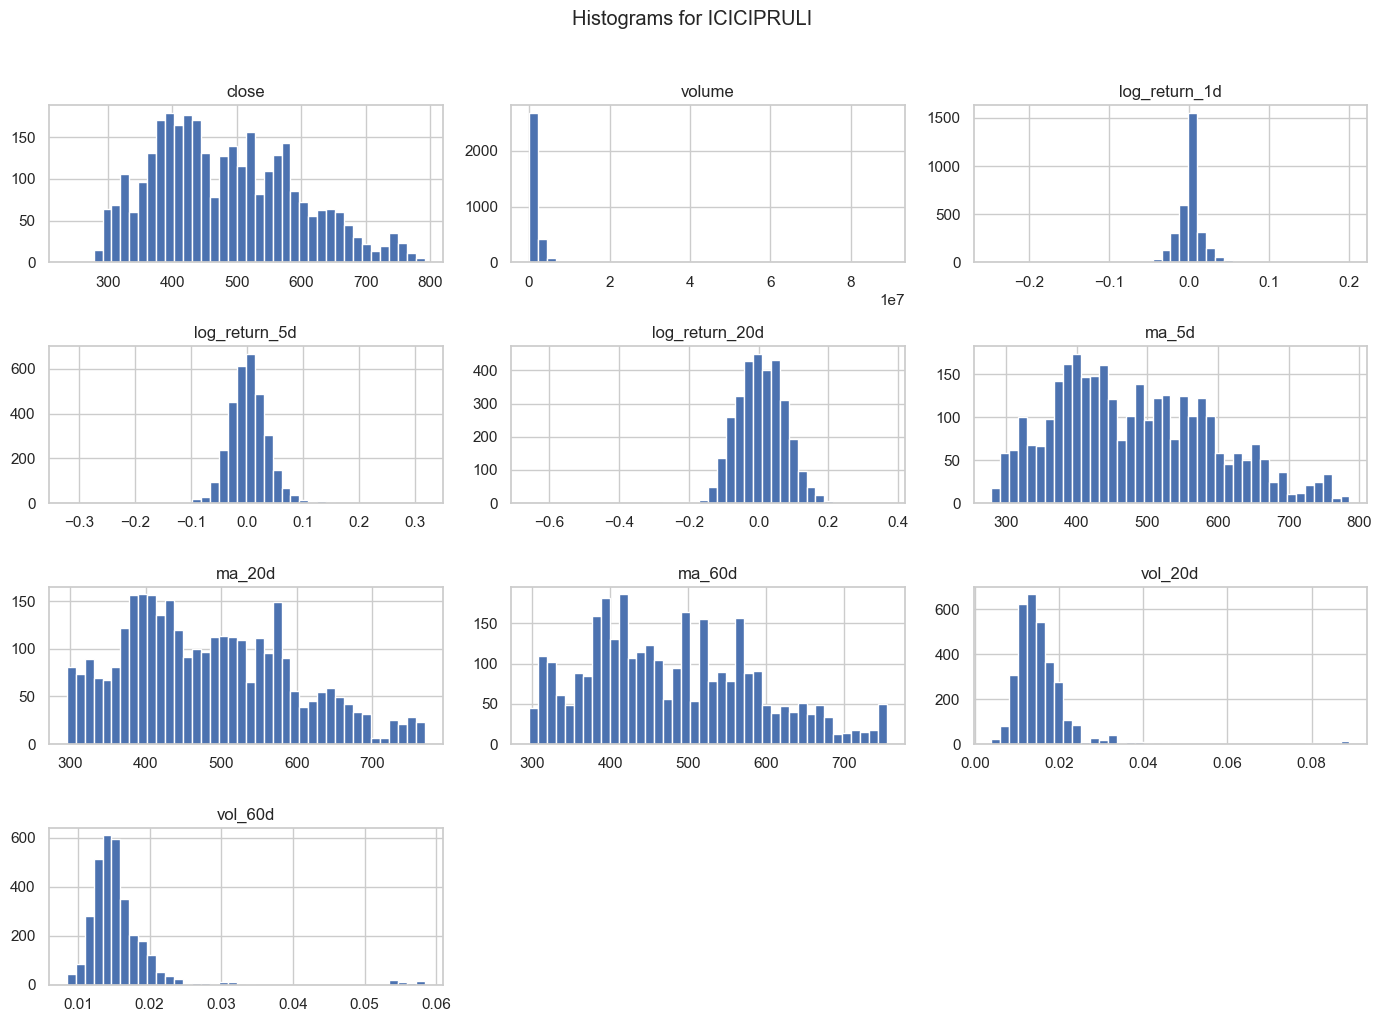

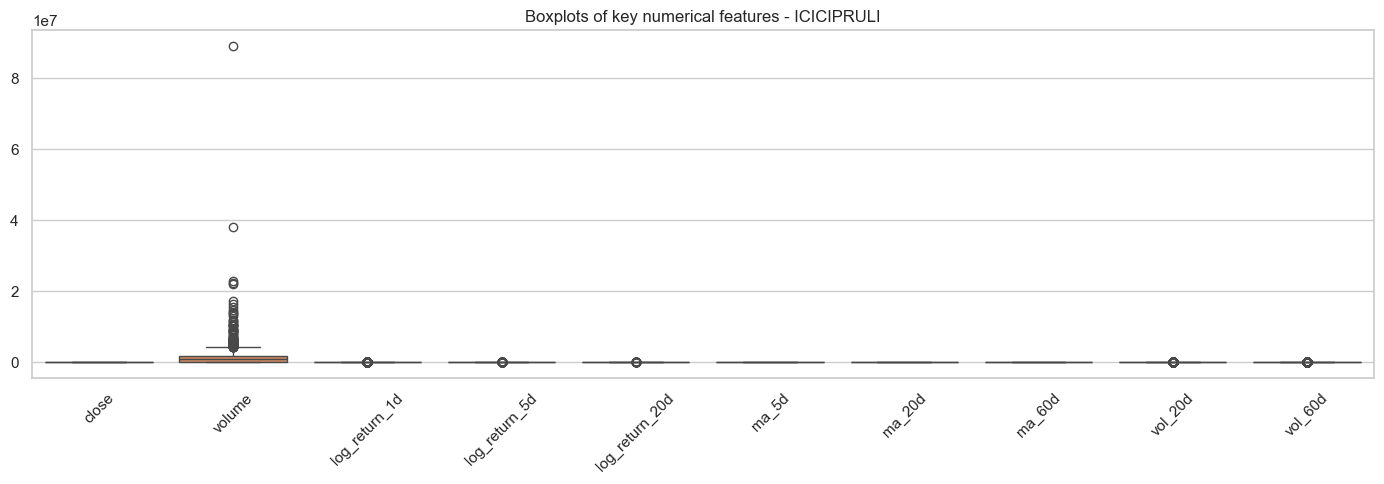


=== IRCTC ===


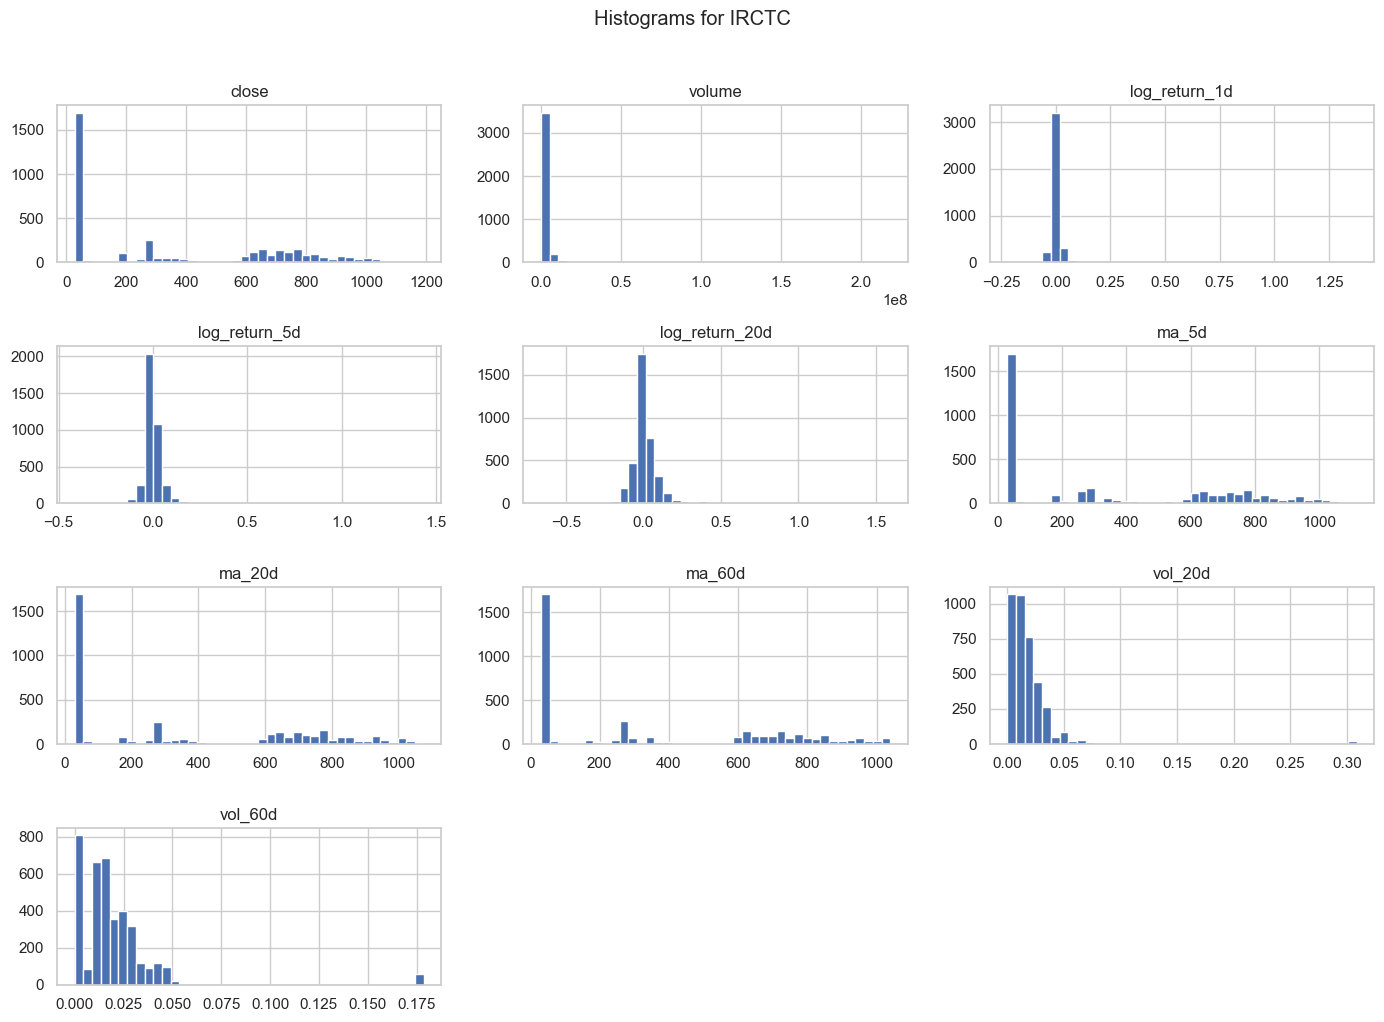

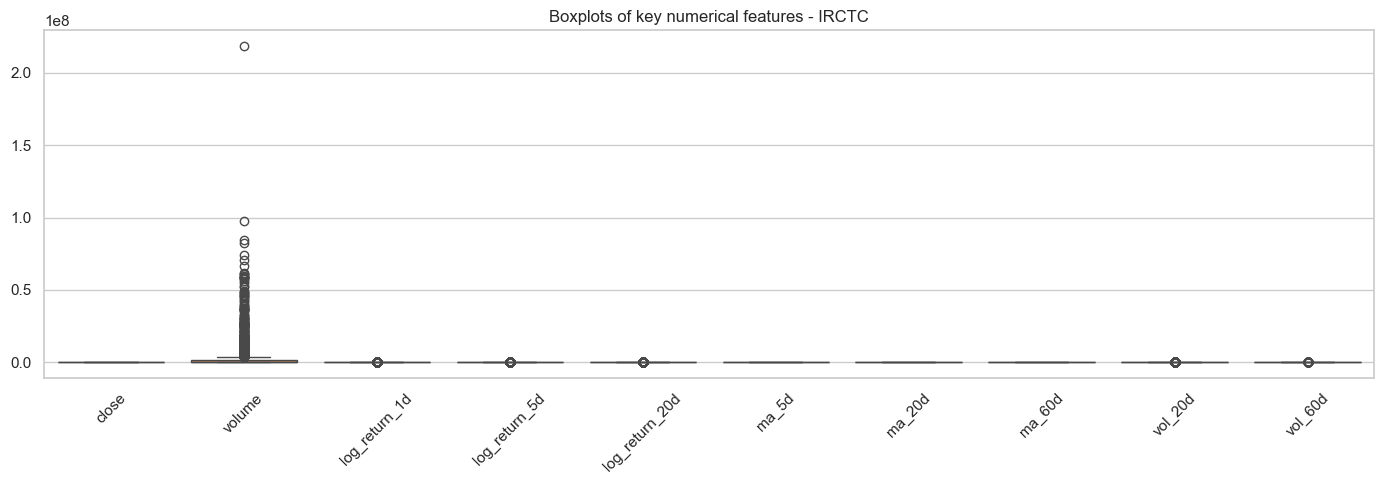


=== JSWENERGY ===


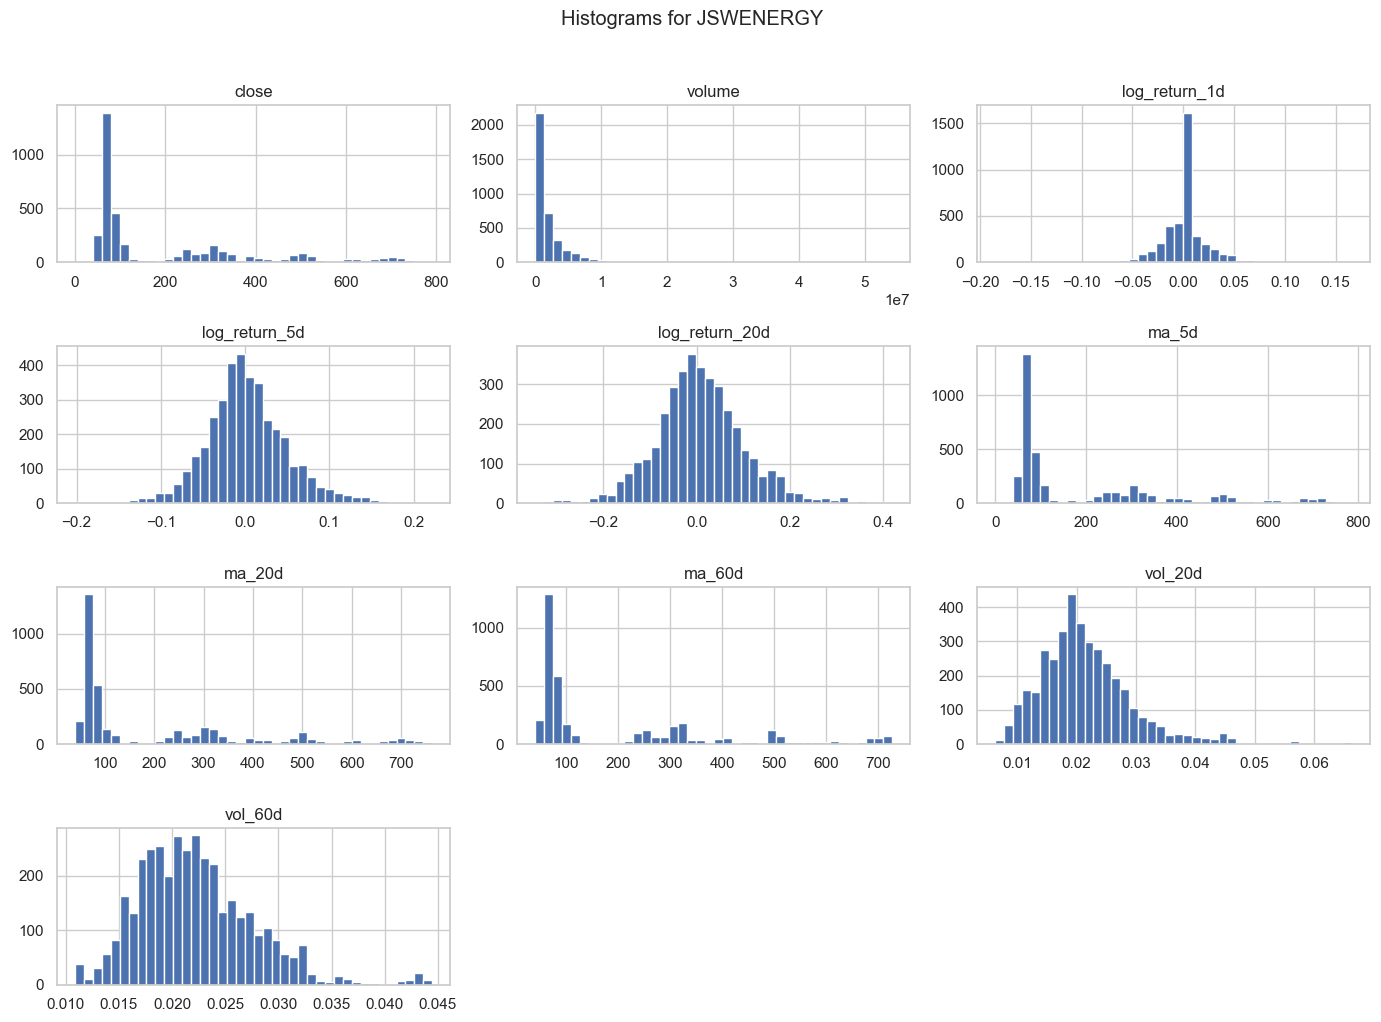

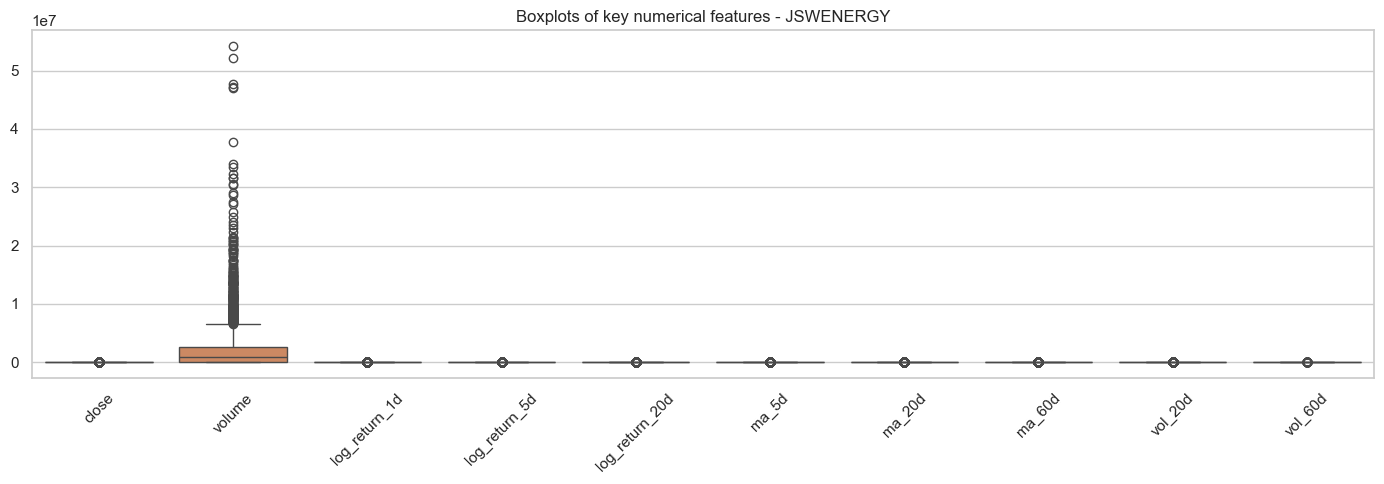


=== LTTS ===


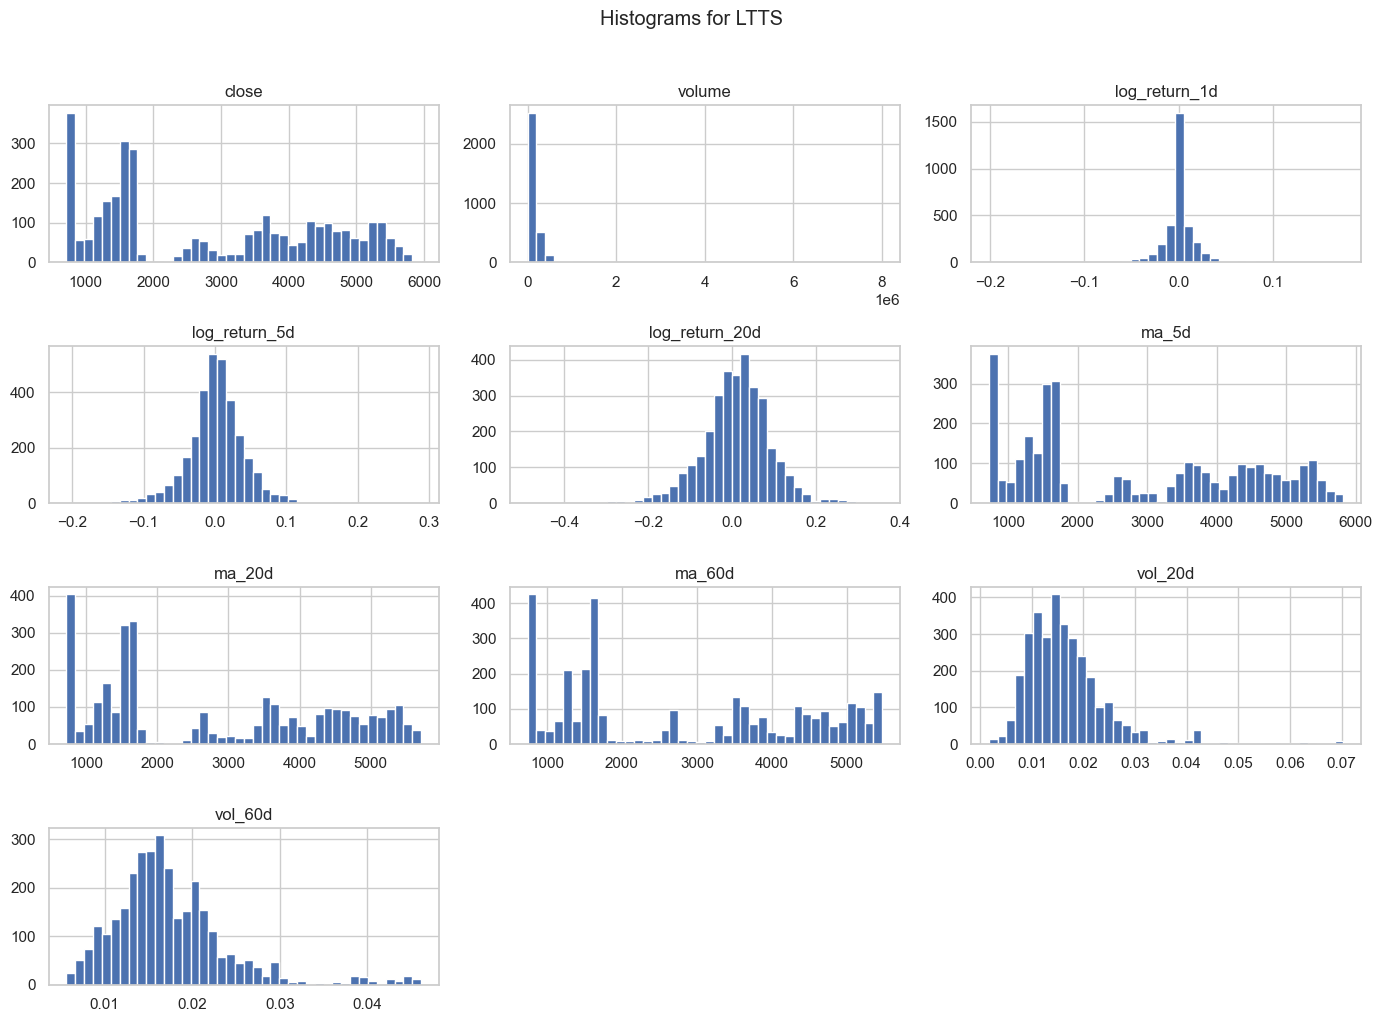

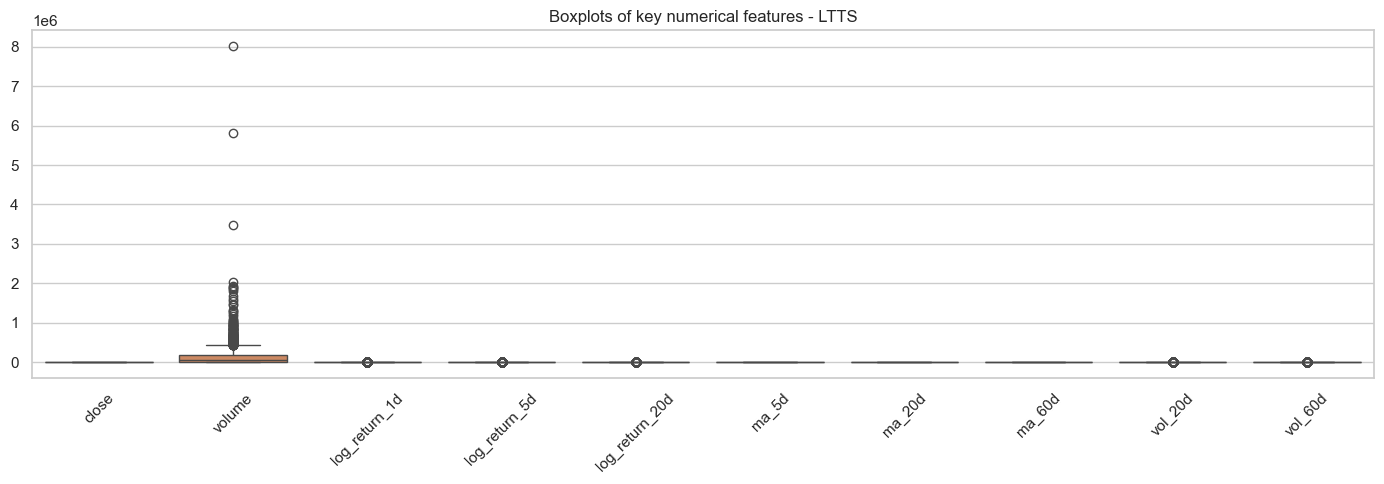


=== MARICO ===


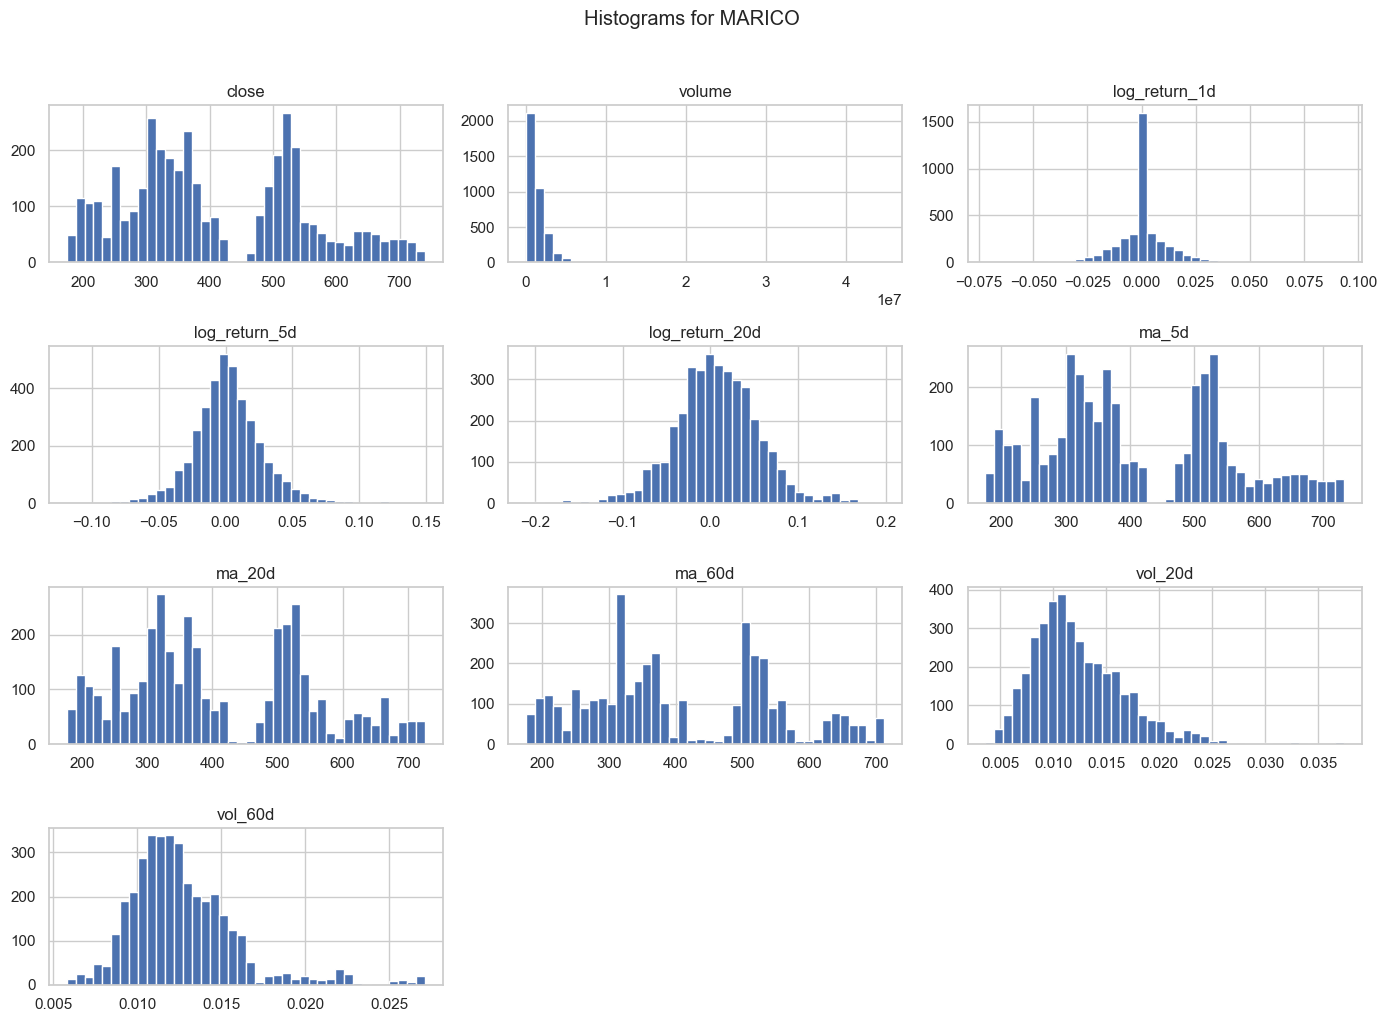

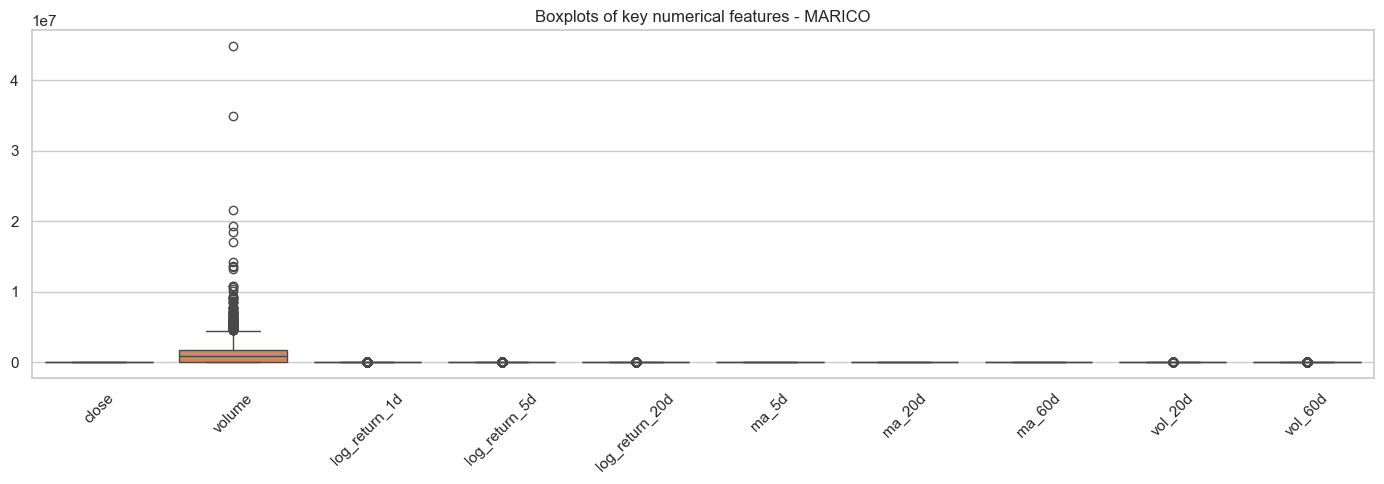


=== NAUKRI ===


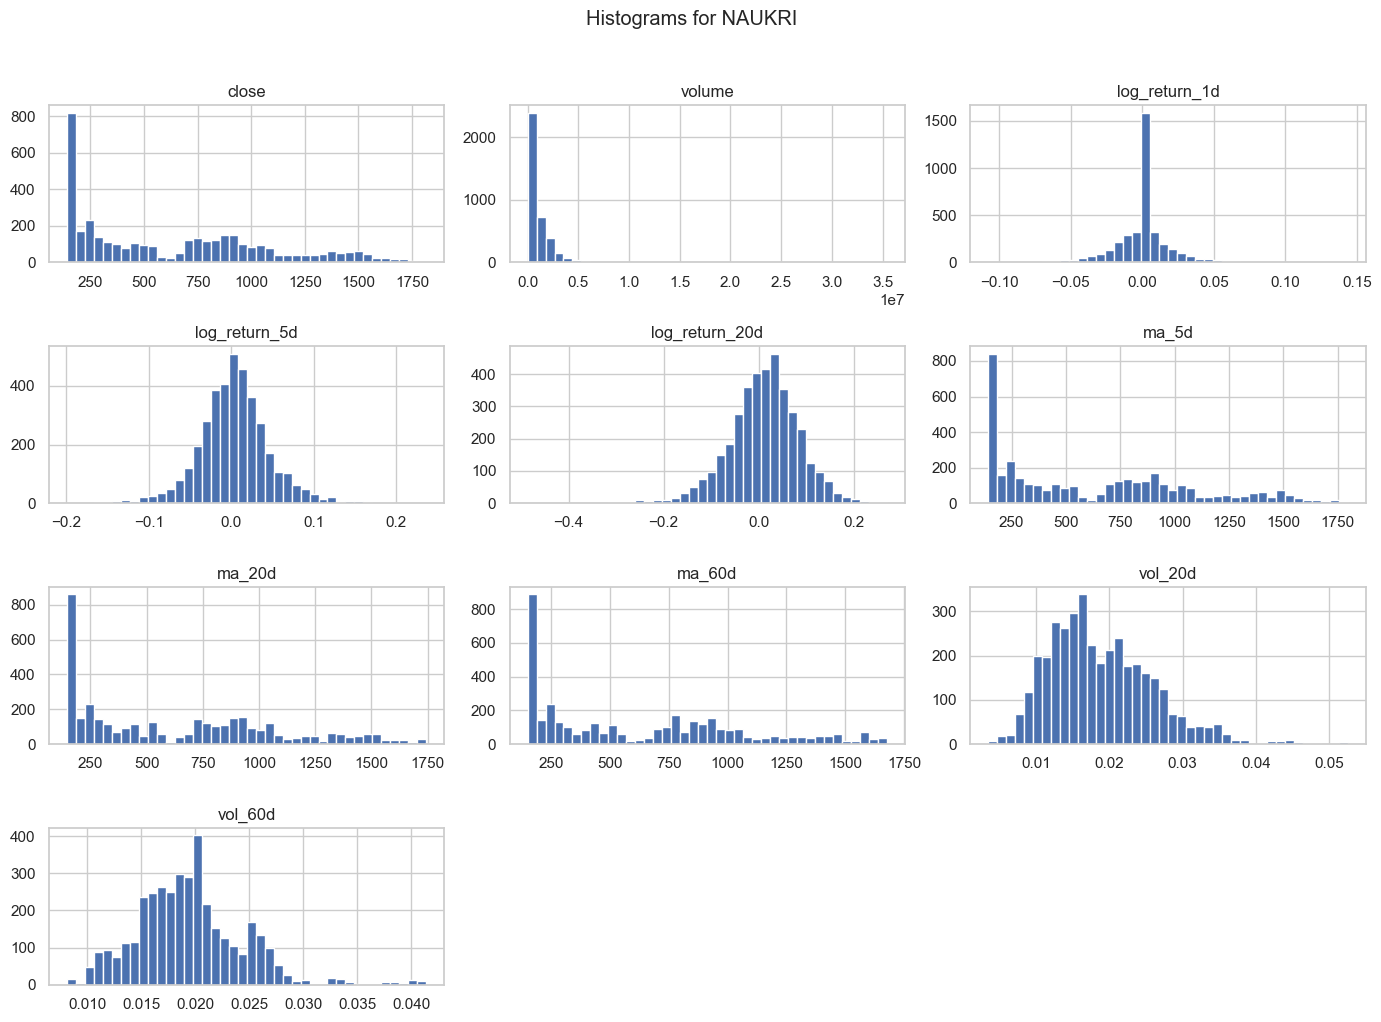

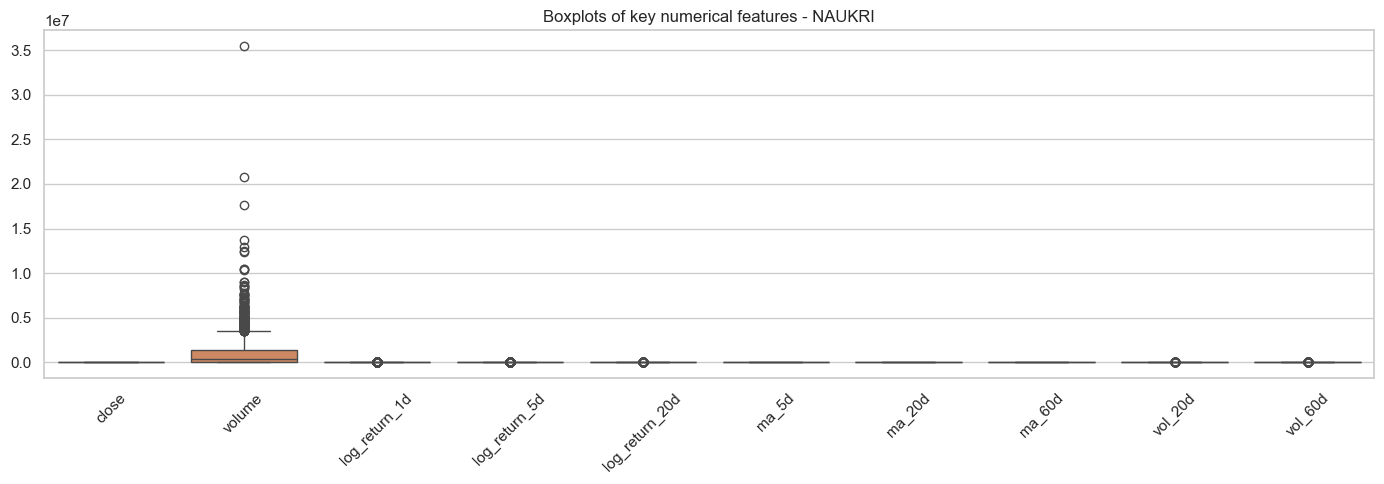


=== NMDC ===


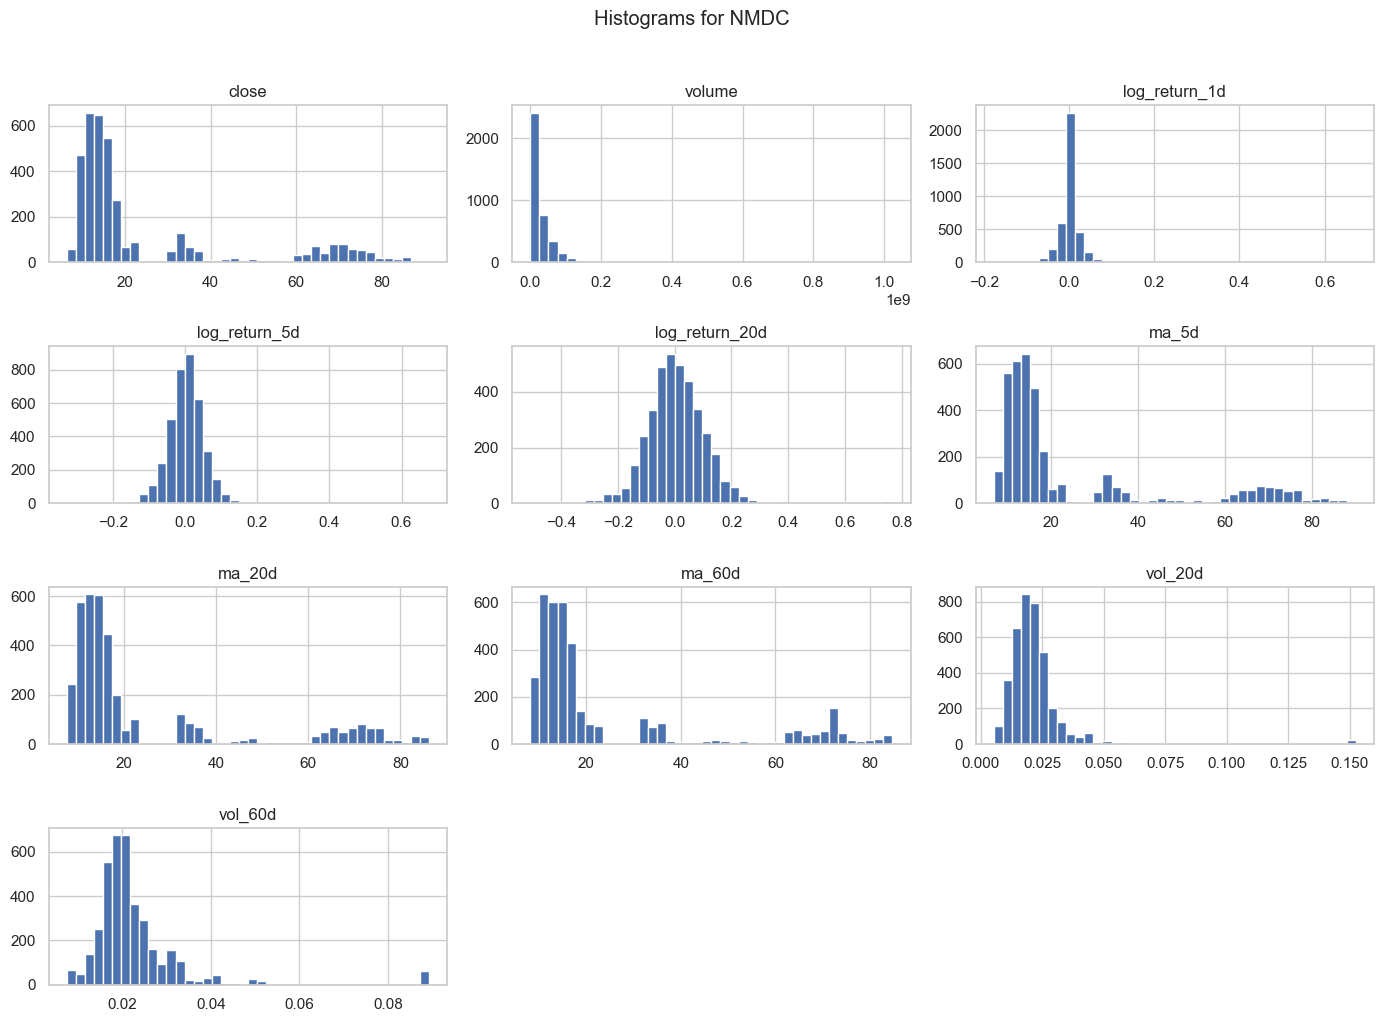

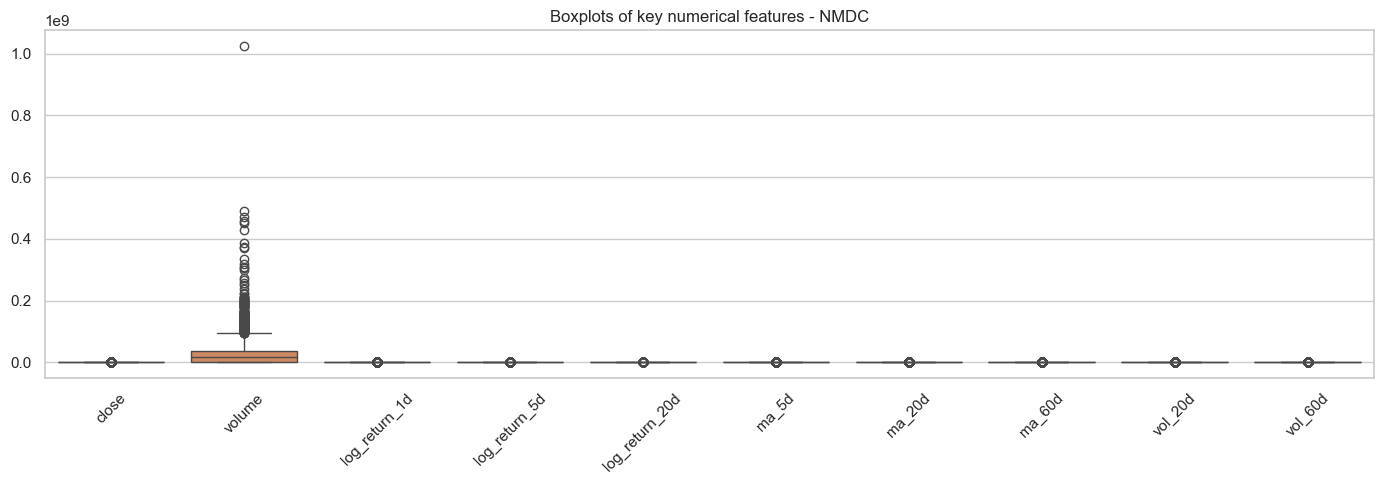


=== PIDILITIND ===


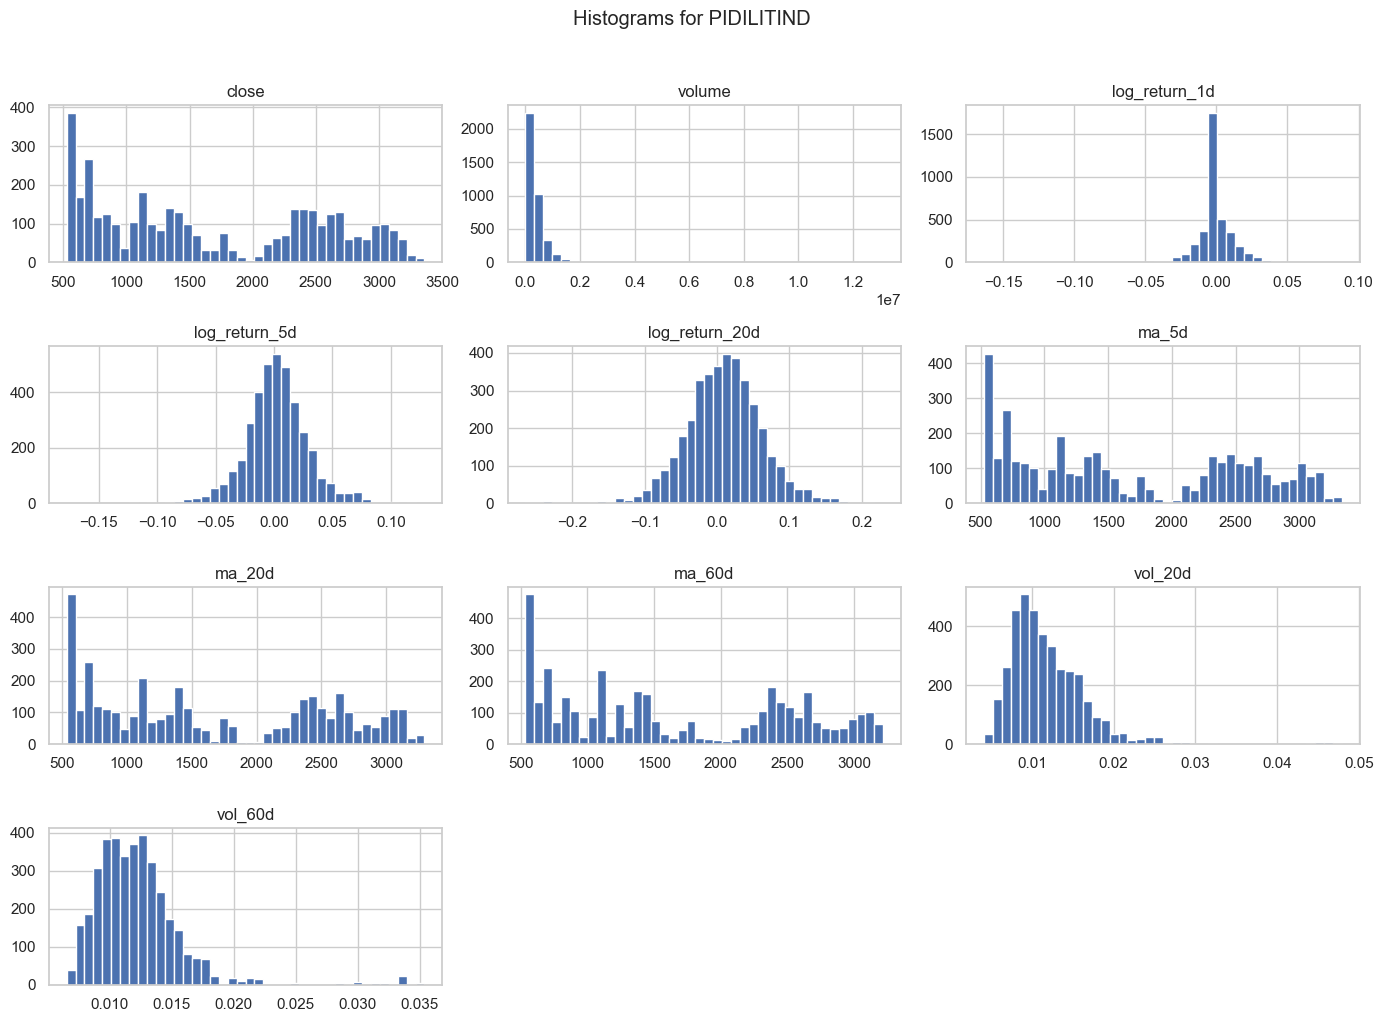

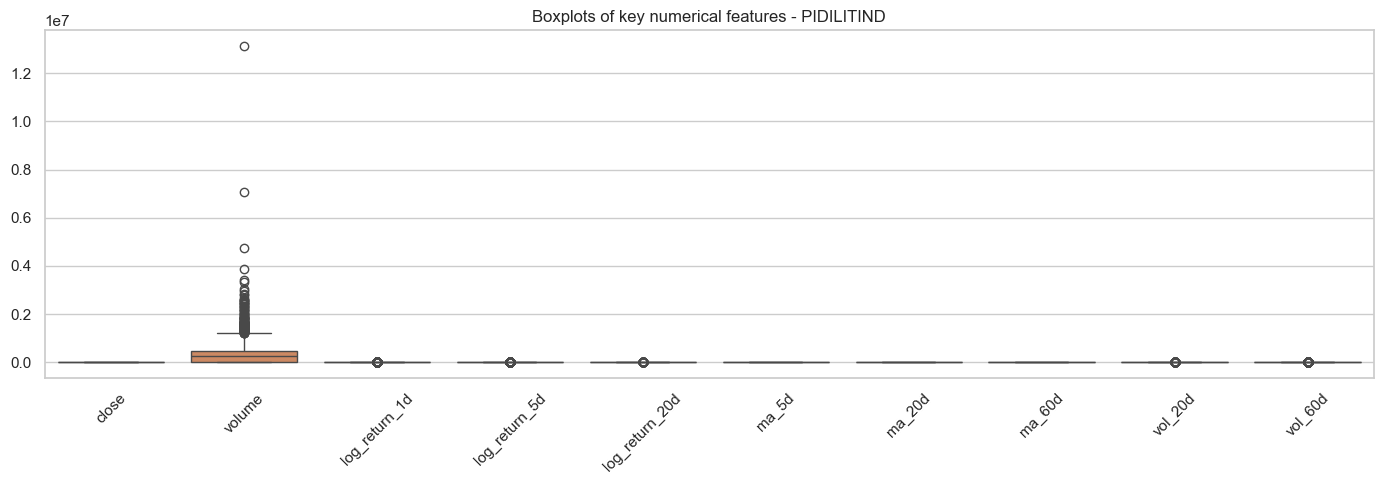


=== SBICARD ===


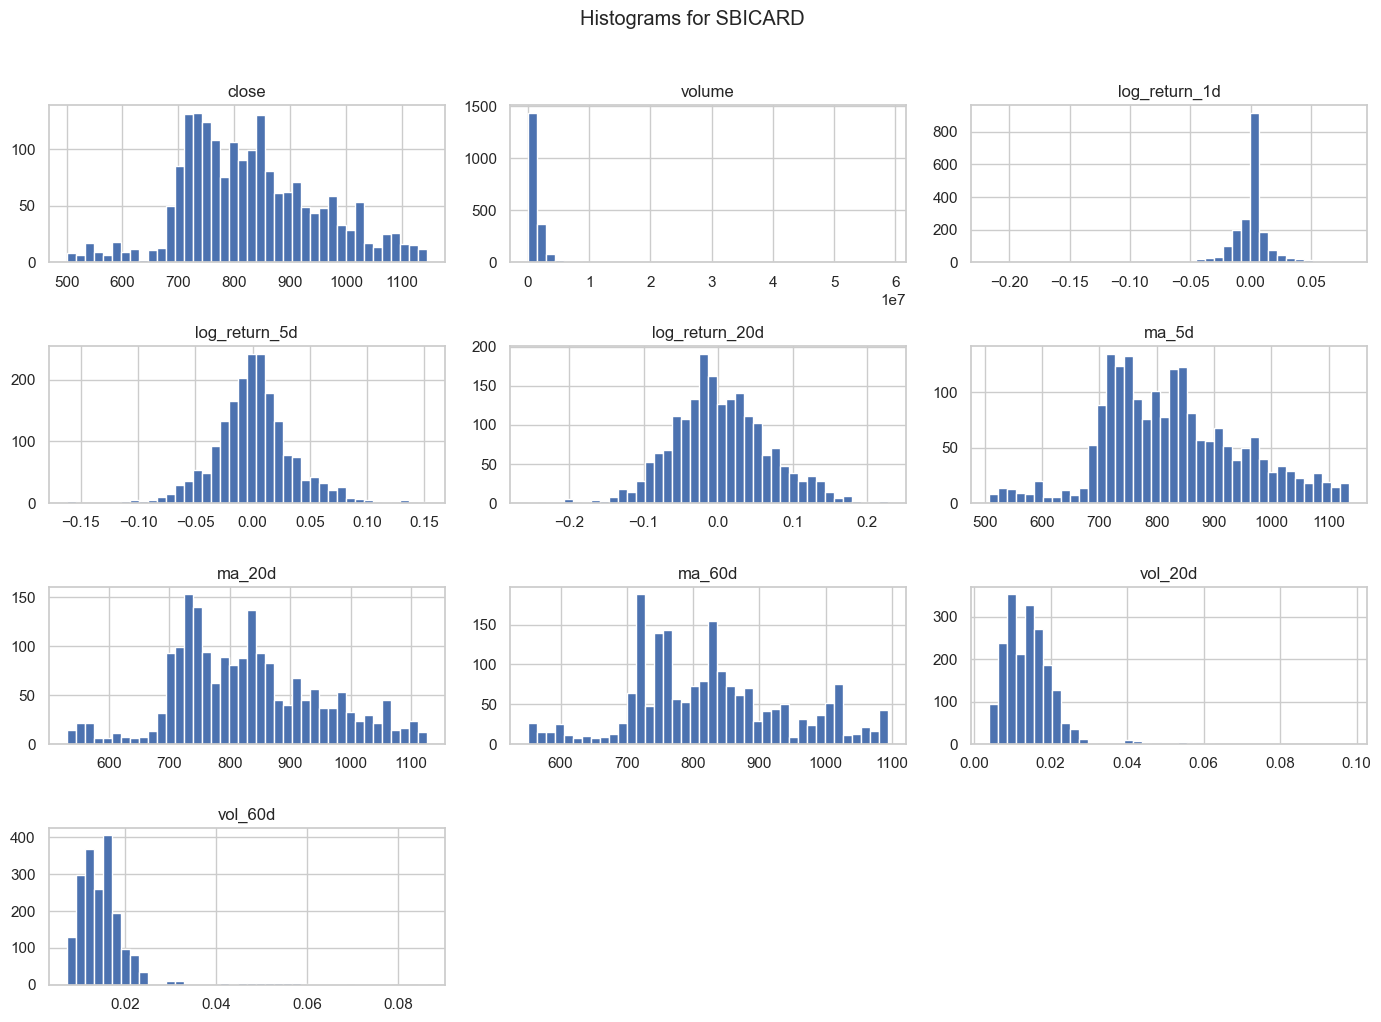

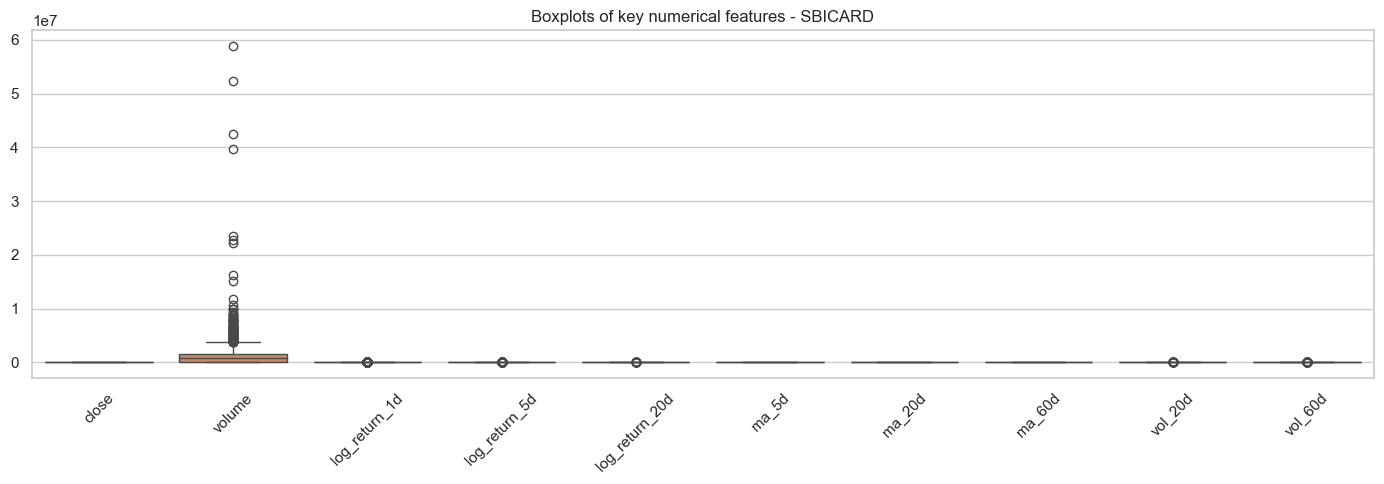


=== SHREECEM ===


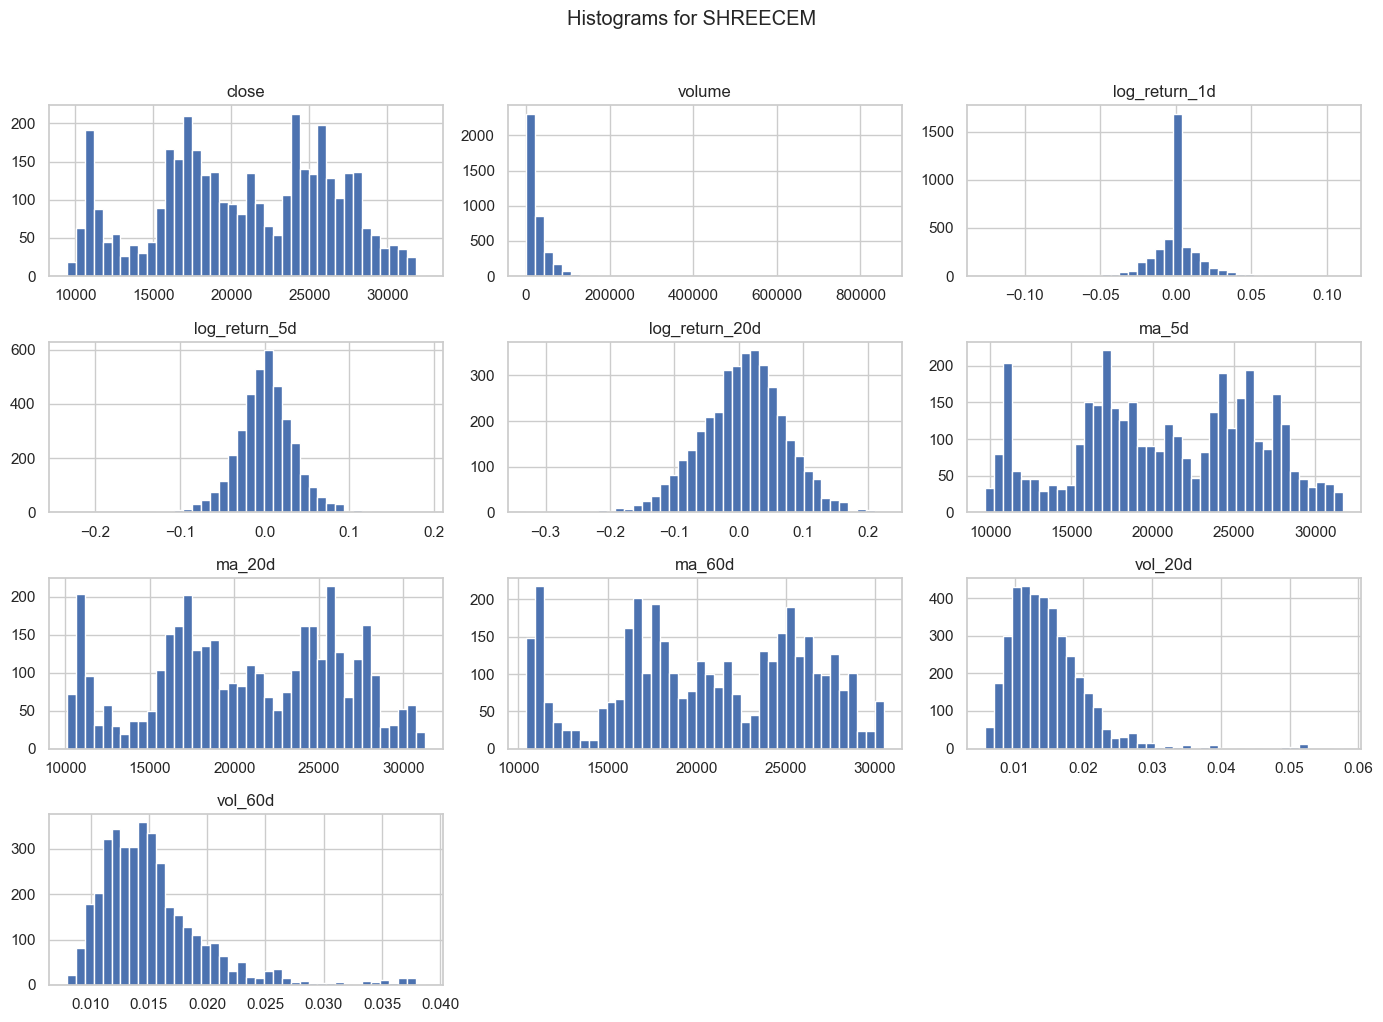

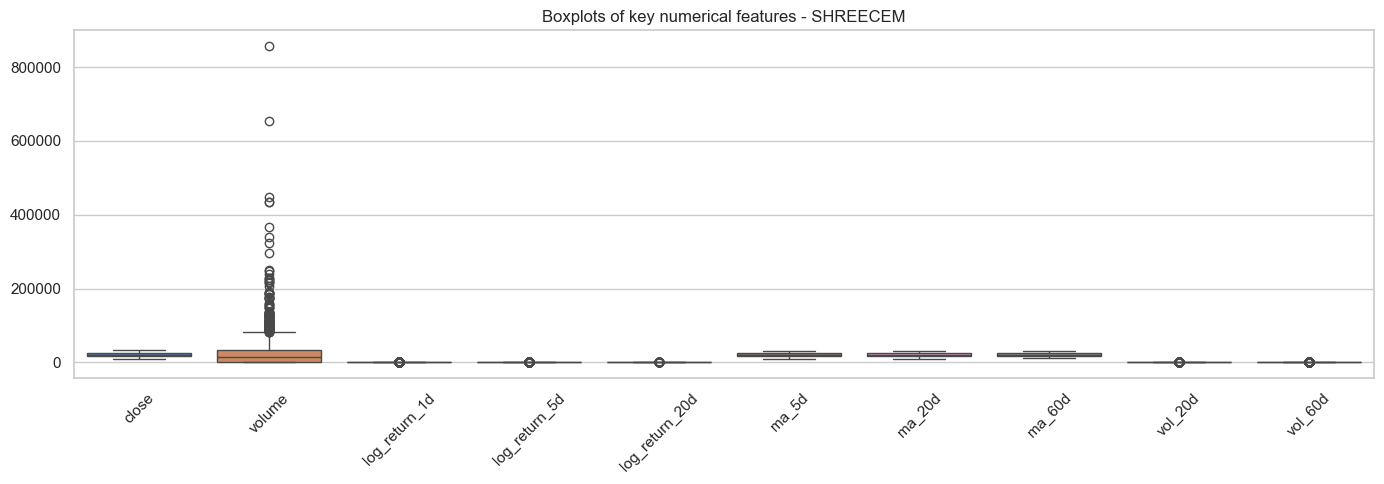

In [40]:
import numpy as np

# Choose columns to plot
num_cols = [
    "close", "volume", 
    "log_return_1d", "log_return_5d", "log_return_20d",
    "ma_5d", "ma_20d", "ma_60d",
    "vol_20d", "vol_60d",
]
num_cols = [c for c in num_cols if c in daily.columns]

companies = daily["company_name"].unique()

# Limit to first N companies if you want fewer plots
# companies = companies[:5]

for cname in companies:
    df_c = daily[daily["company_name"] == cname].copy()
    
    # Replace inf/-inf with NaN
    df_c[num_cols] = df_c[num_cols].replace([np.inf, -np.inf], np.nan)
    
    # Drop rows where all selected columns are NaN
    df_c = df_c.dropna(subset=num_cols, how="all")
    
    if df_c.empty:
        print(f"Skipping {cname}: no finite data for selected columns.")
        continue

    print(f"\n=== {cname} ===")

    # Histograms
    df_c[num_cols].hist(bins=40, figsize=(14, 10))
    plt.suptitle(f"Histograms for {cname}", y=1.02)
    plt.tight_layout()
    plt.show()

    # Boxplots
    plt.figure(figsize=(14, 5))
    sns.boxplot(data=df_c[num_cols])
    plt.xticks(rotation=45)
    plt.title(f"Boxplots of key numerical features - {cname}")
    plt.tight_layout()
    plt.show()

##### Time-series plots for a few sample companies

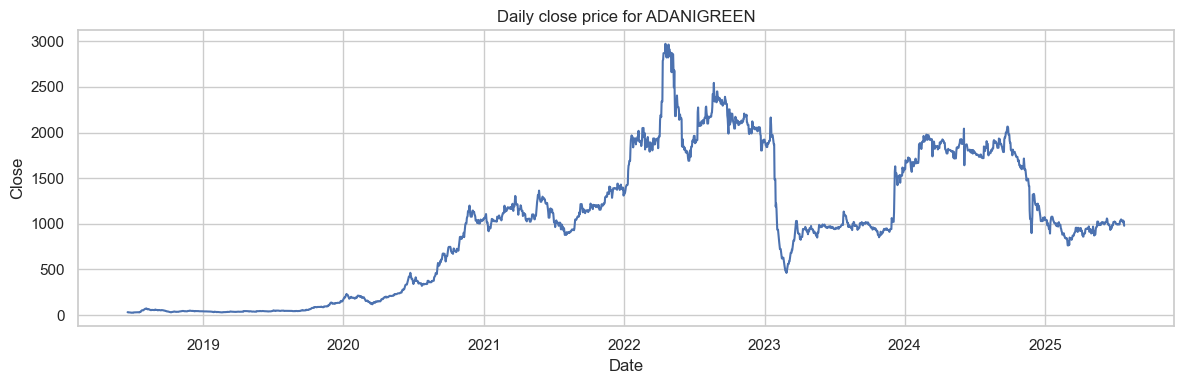

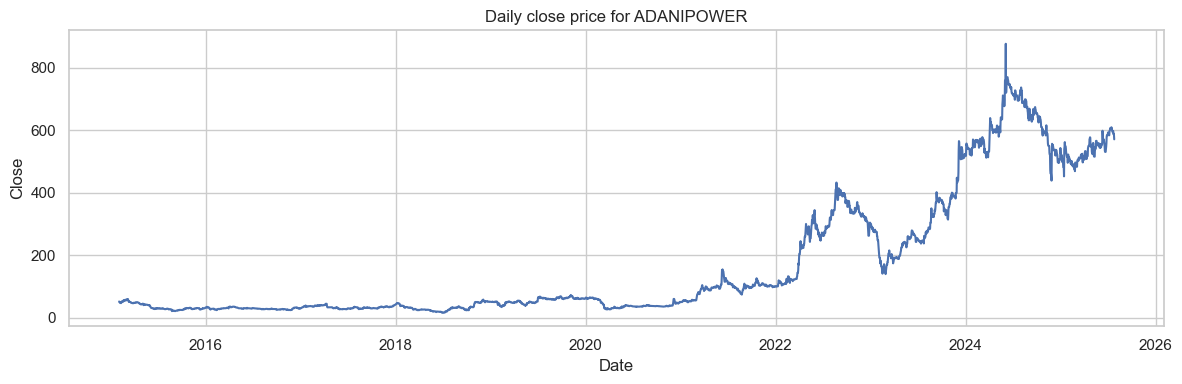

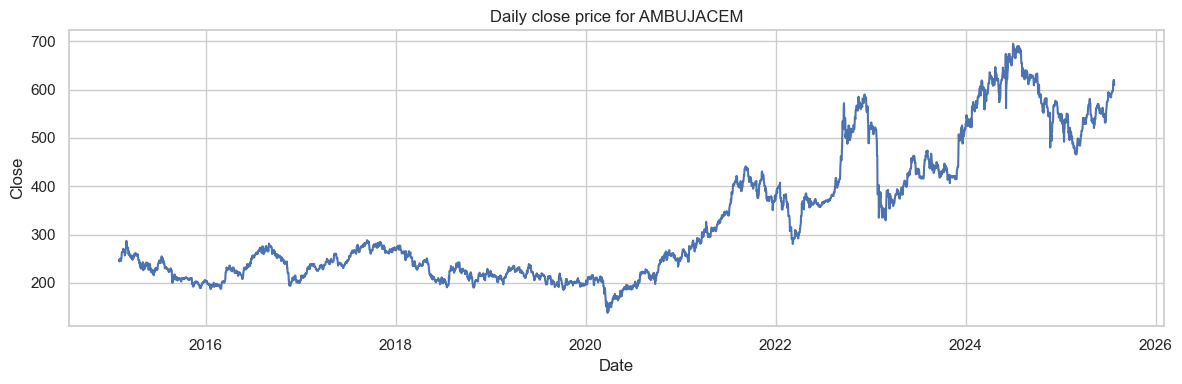

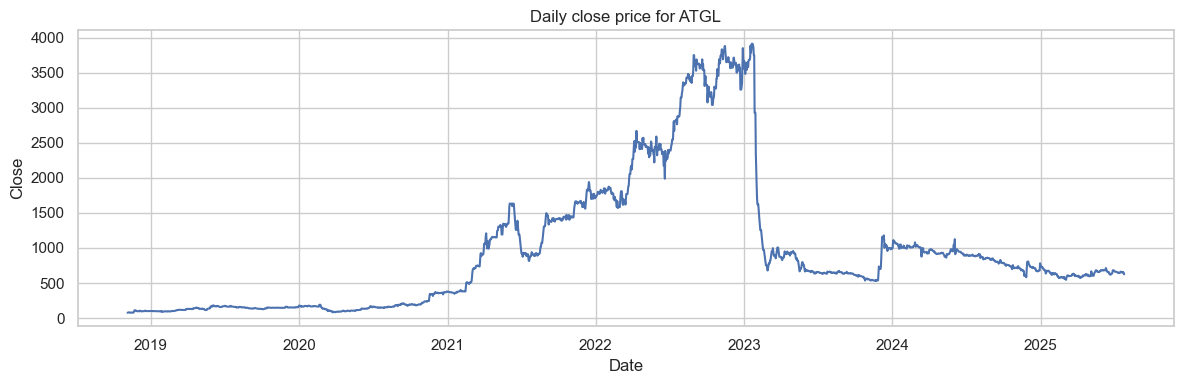

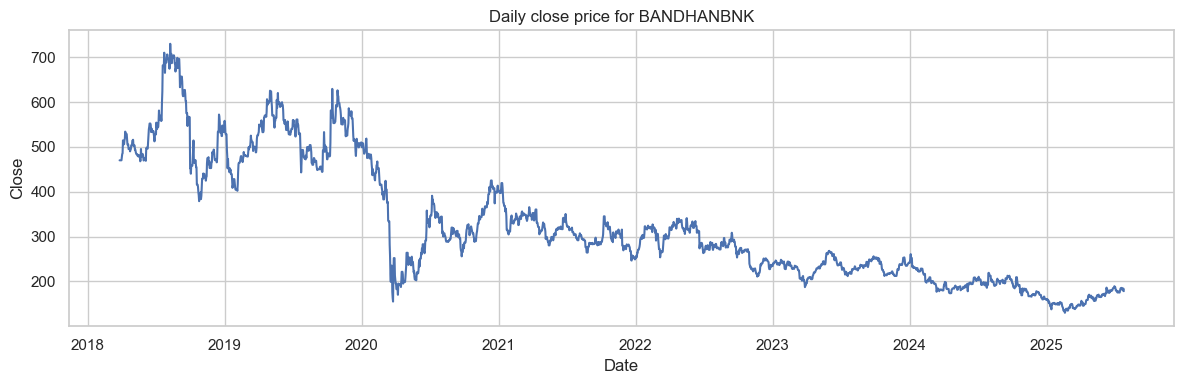

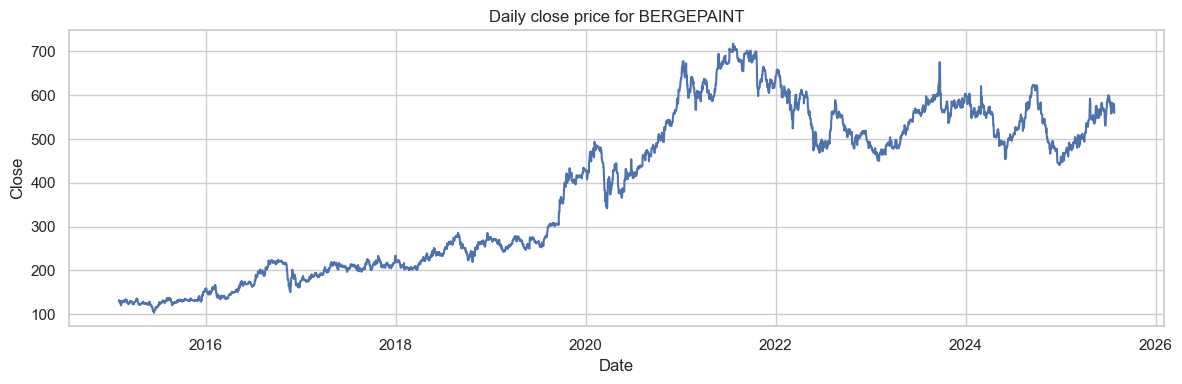

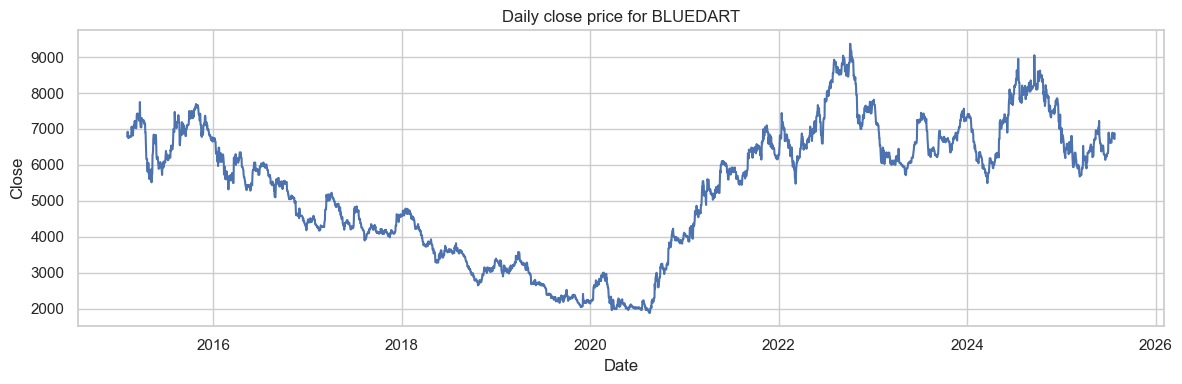

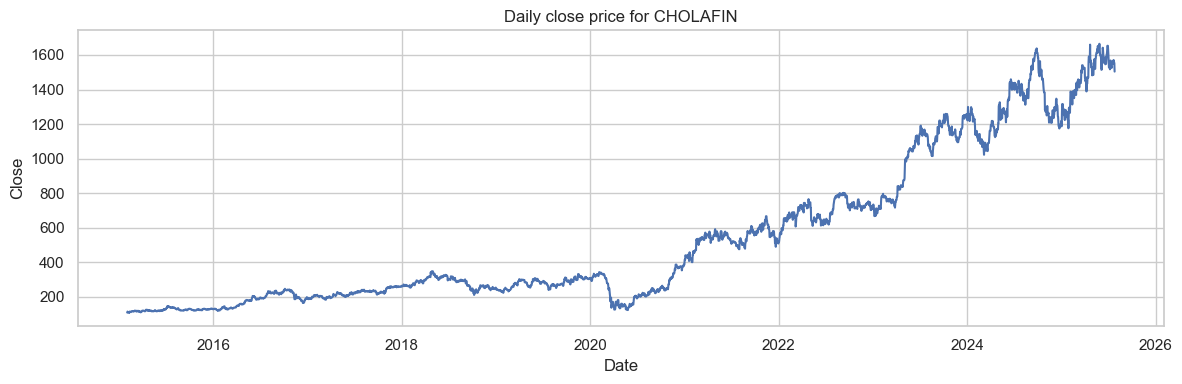

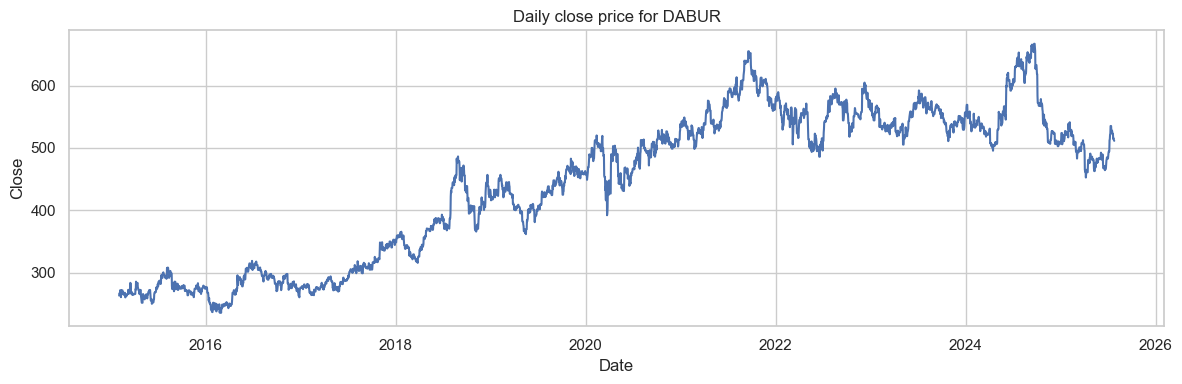

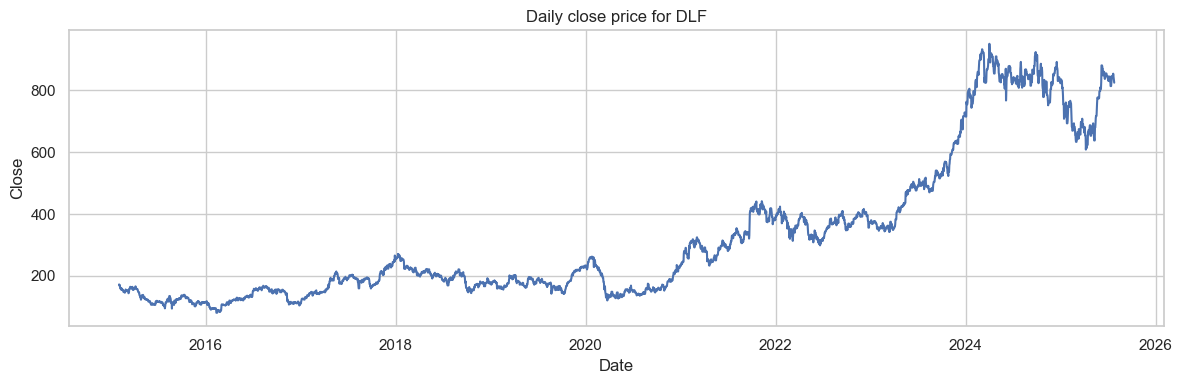

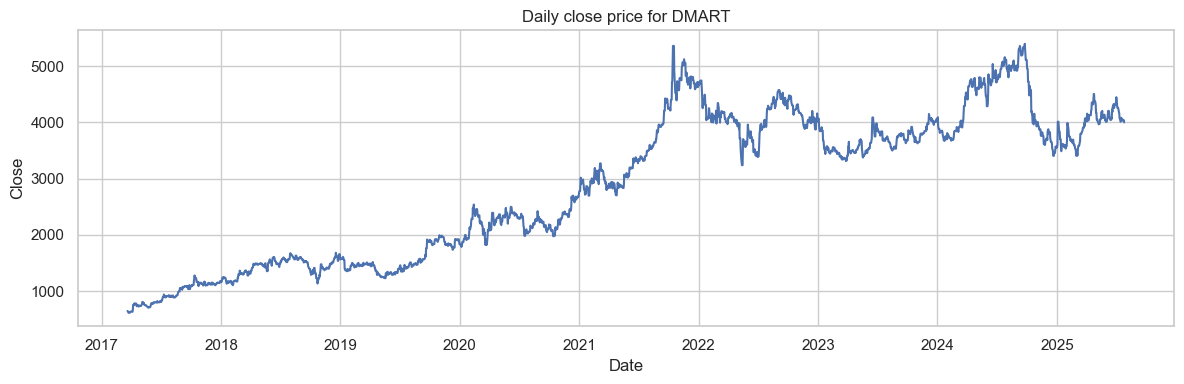

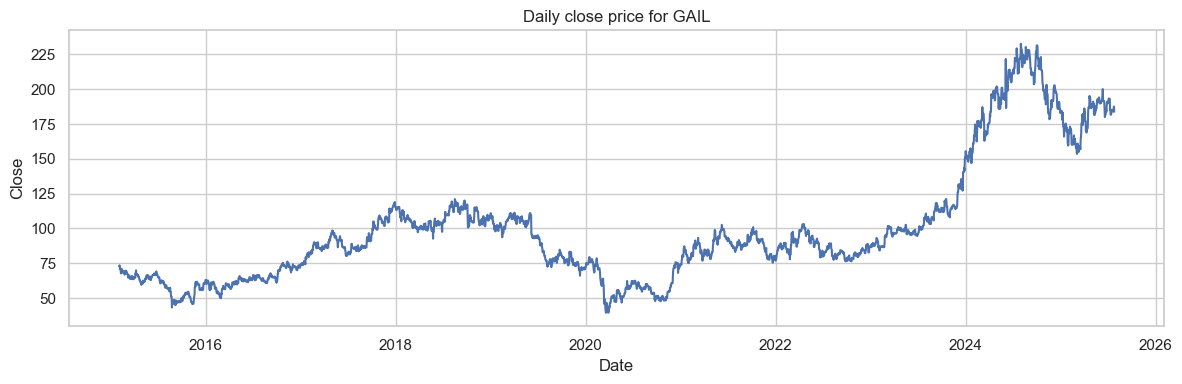

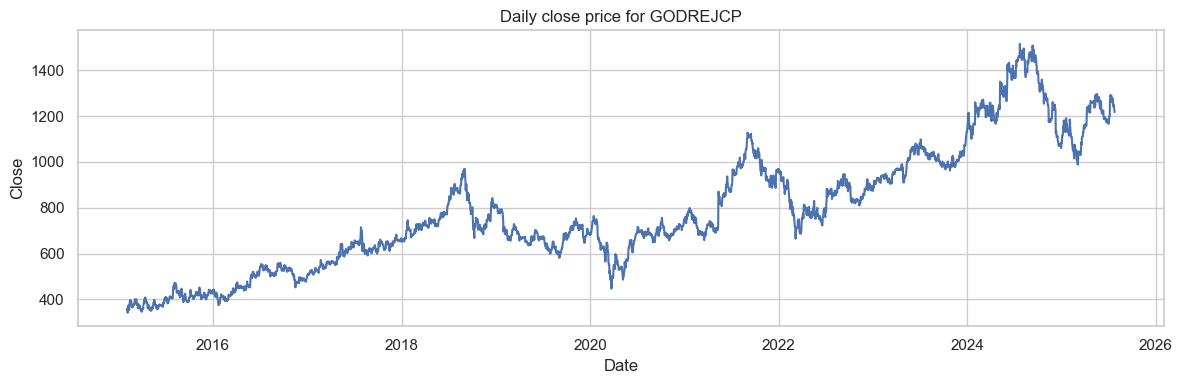

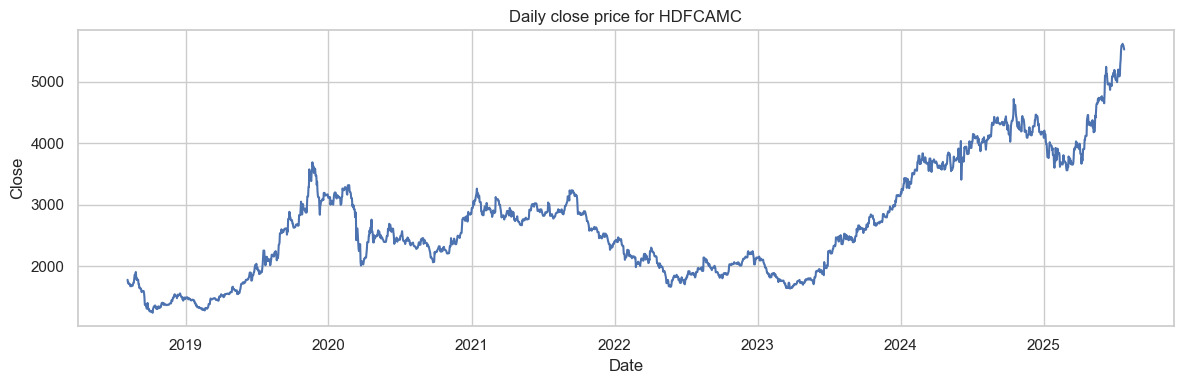

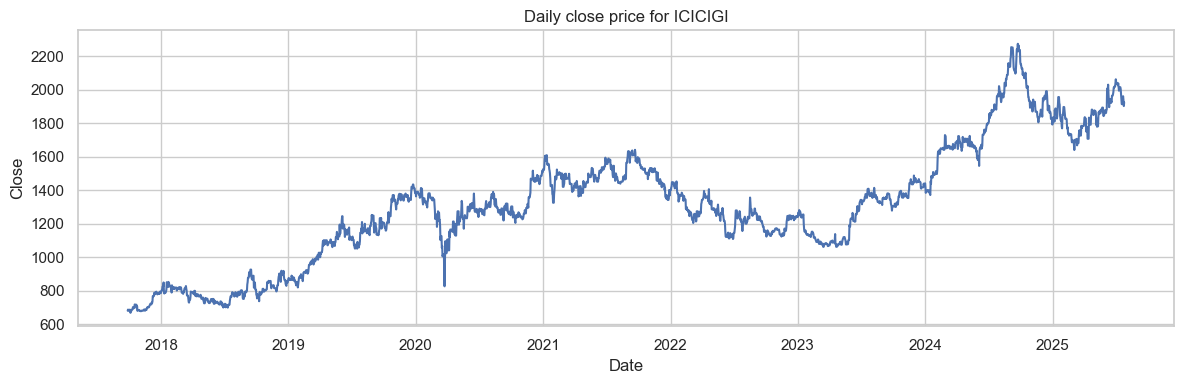

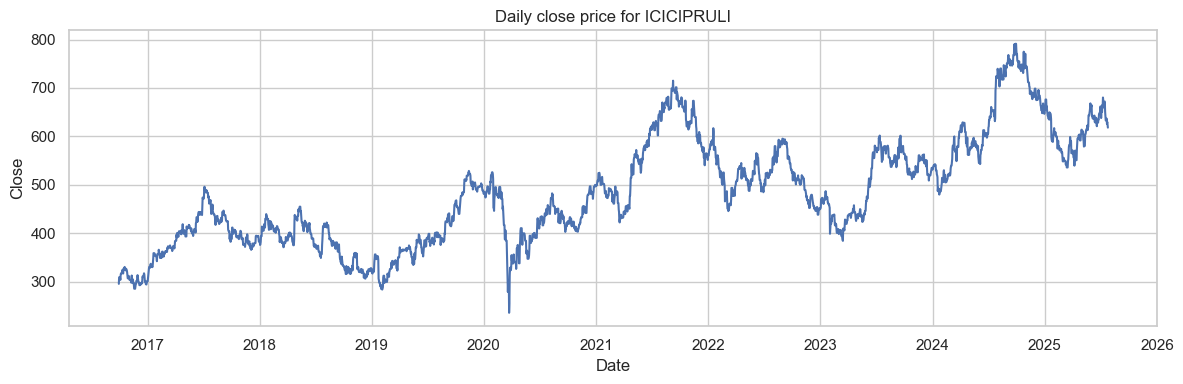

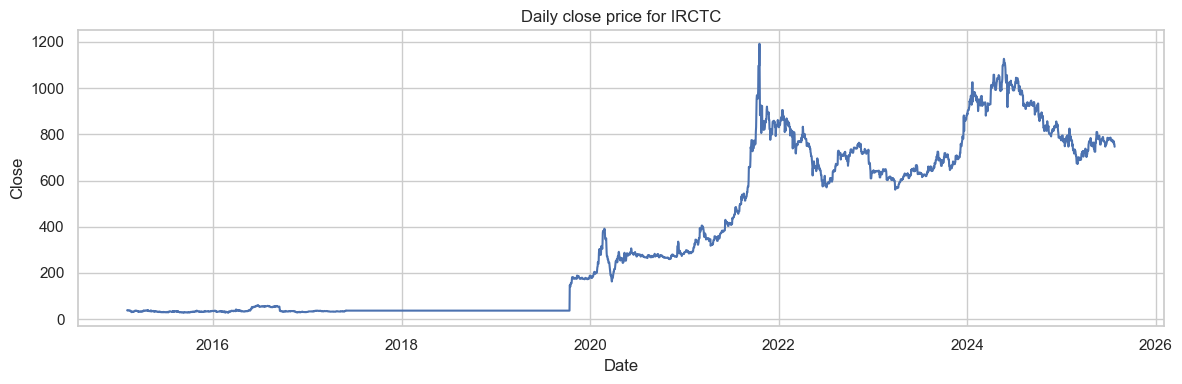

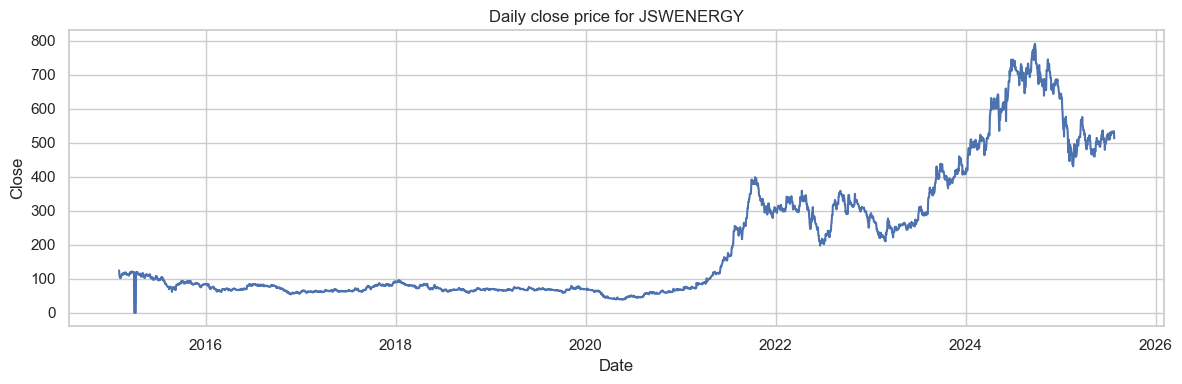

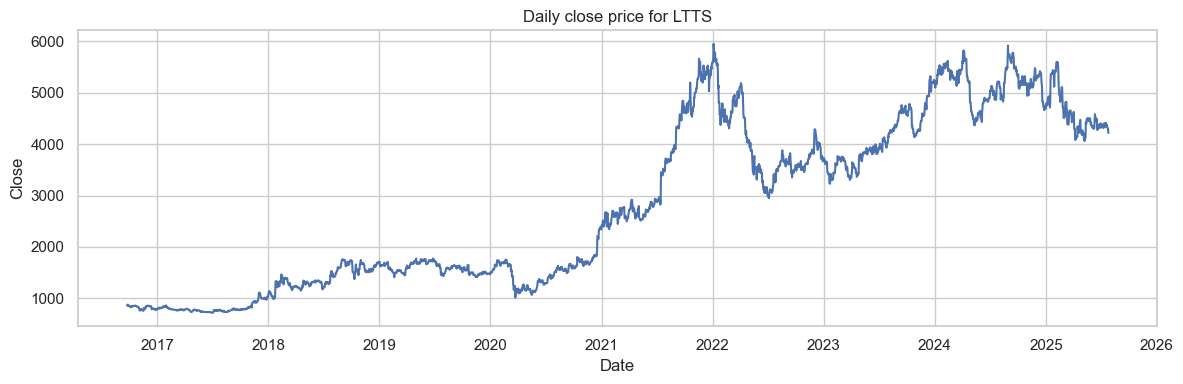

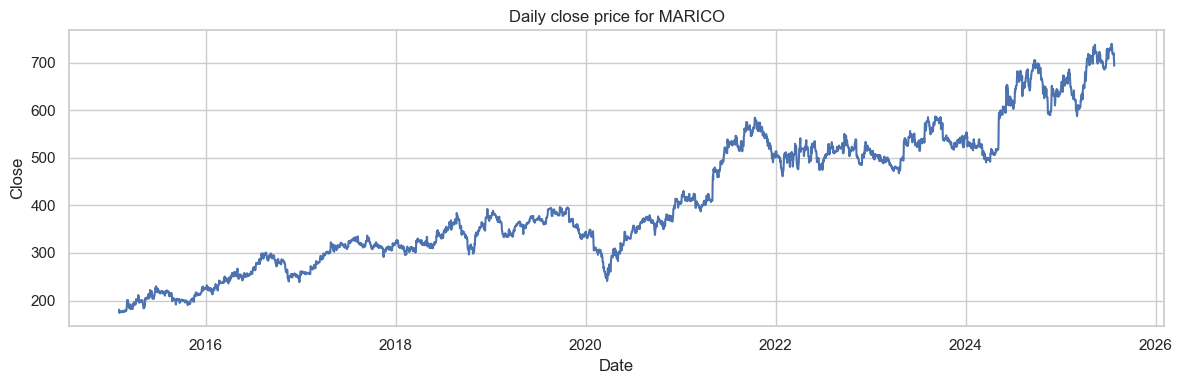

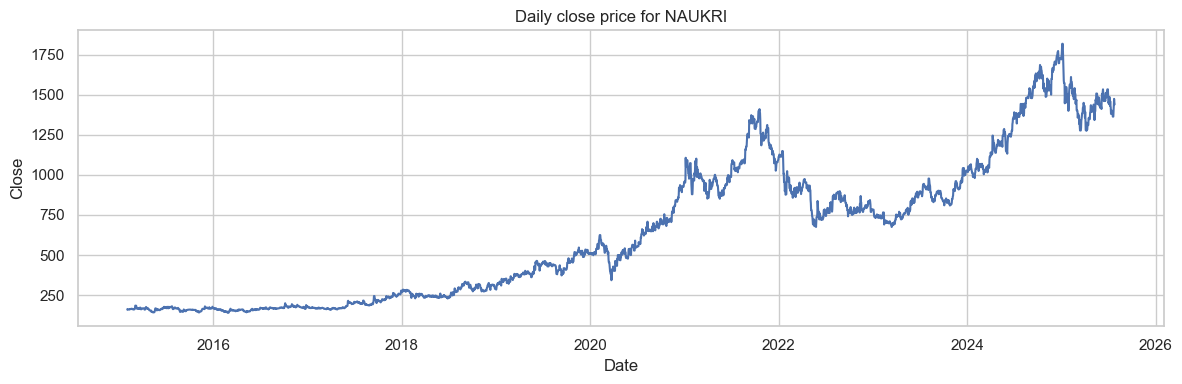

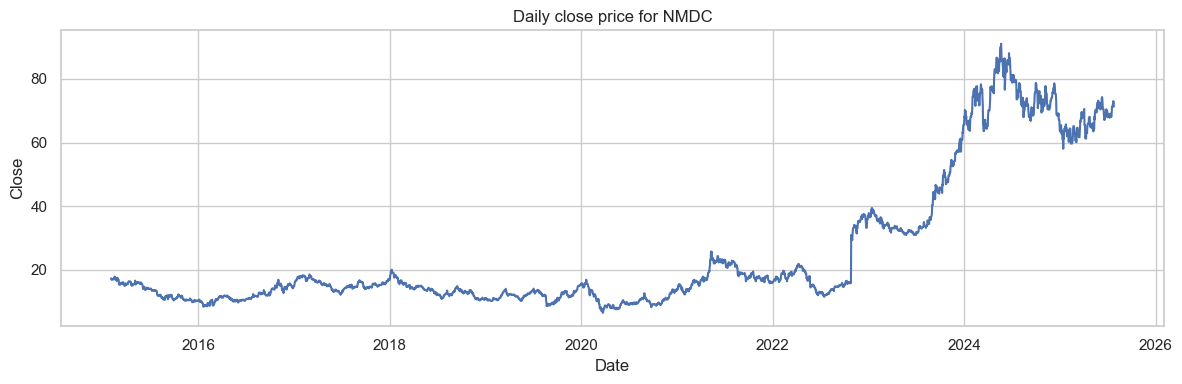

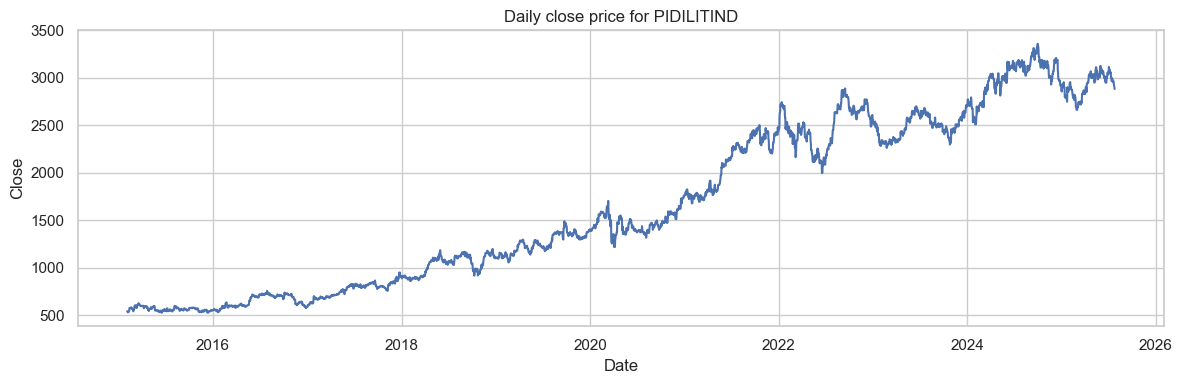

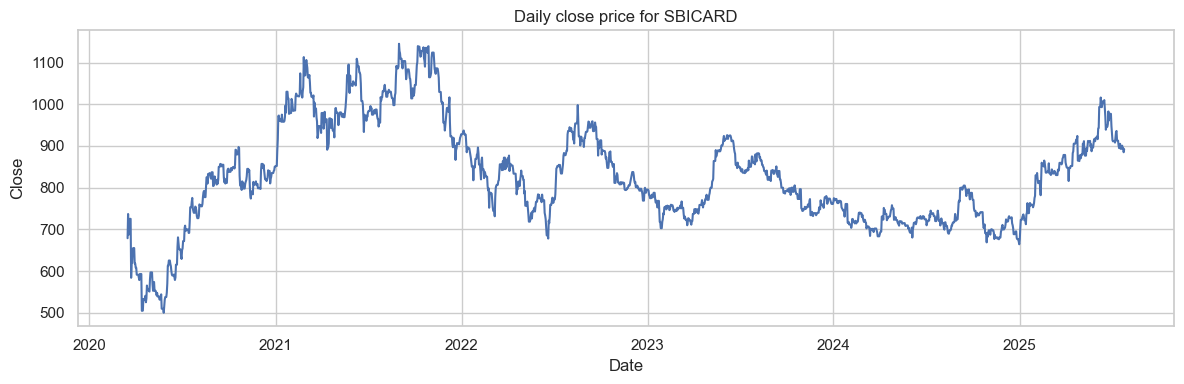

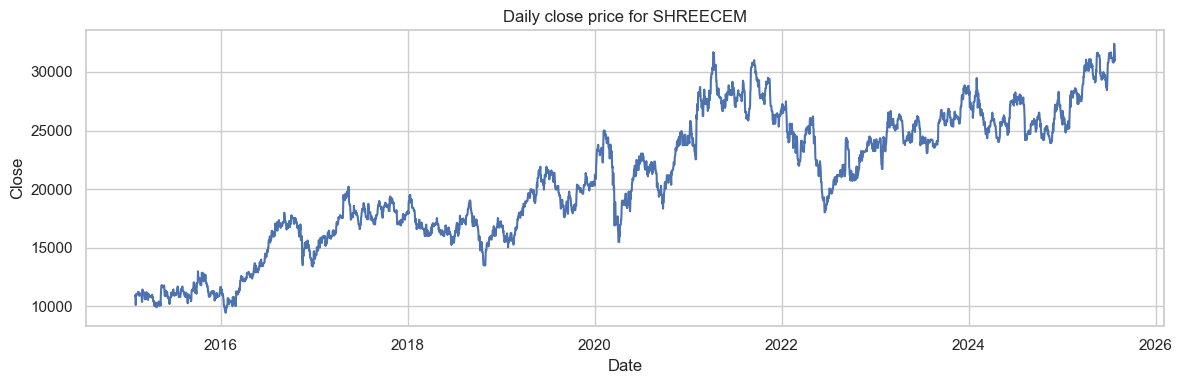

In [42]:
sample_companies = daily["company_name"].unique()[:]

for cname in sample_companies:
    df_c = daily[daily["company_name"] == cname]
    
    plt.figure(figsize=(12, 4))
    plt.plot(df_c["date"], df_c["close"])
    plt.title(f"Daily close price for {cname}")
    plt.xlabel("Date")
    plt.ylabel("Close")
    plt.tight_layout()
    plt.show()


##### 1. Summarize distributions numerically per company

In [49]:
features = [
    "close", "volume",
    "log_return_1d", "log_return_5d", "log_return_20d",
    "ma_5d", "ma_20d", "ma_60d",
    "vol_20d", "vol_60d",
]
features = [c for c in features if c in daily.columns]

summary = (
    daily
    .groupby("company_name")[features]
    .agg(["mean", "std", "min", "max"])
)

summary

close                                        volume  \
                      mean          std      min       max          mean   
company_name                                                               
ADANIGREEN      997.383256   733.044159    25.45   2972.60  1.285092e+06   
ADANIPOWER      170.945532   203.565347    15.40    876.95  8.267487e+06   
AMBUJACEM       328.179318   138.173344   138.05    695.00  2.843310e+06   
ATGL            958.057882   948.446169    75.60   3912.00  1.098526e+06   
BANDHANBNK      323.529313   134.600599   130.00    729.80  5.699736e+06   
BERGEPAINT      388.700392   180.269388   103.40    717.35  7.375942e+05   
BLUEDART       5331.212229  1832.856560  1888.00   9370.00  1.279876e+04   
CHOLAFIN        543.750379   437.400150   106.60   1664.90  1.336766e+06   
DABUR           443.398798   117.003882   235.90    667.00  1.443131e+06   
DLF             326.258179   233.129908    81.15    949.55  5.556610e+06   
DMART          2868.626041  1292.269908   615.25   5397.85  4.510452e+05   
GAIL             99.379268    42.642602    39.41    232.61  9.263115e+06   
GODREJCP        783.454275   266.602149   341.75   1515.00  7.627475e+05   
HDFCAMC        2692.498940   911.612591  1244.80   5619.50  3.159038e+05   
ICICIGI        1307.897342   351.018788   667.00   2273.00  4.614654e+05   
ICICIPRULI      482.935909   110.818131   236.00    791.20  1.285882e+06   
IRCTC           358.188908   344.917100    27.60   1192.00  2.236486e+06   
JSWENERGY       205.282101   192.698282     0.00    791.50  2.227890e+06   
LTTS           2821.056134  1625.079932   717.00   5955.50  1.292518e+05   
MARICO          409.964521   140.408114   174.13    740.20  1.277095e+06   
NAUKRI          641.810870   444.202152   140.00   1817.00  9.531208e+05   
NMDC             25.269898    21.524059     6.43     91.07  2.855894e+07   
PIDILITIND     1664.527424   873.814555   526.00   3360.00  3.447540e+05   
SBICARD         828.646272   123.413544   500.20   1144.90  1.273070e+06   
SHREECEM      20732.704142  5590.393753  9460.00  32400.00  2.399118e+04   

                                              log_return_1d            ...  \
                       std  min           max          mean       std  ...   
company_name                                                           ...   
ADANIGREEN    2.689944e+06  0.0  5.511926e+07      0.001325  0.029415  ...   
ADANIPOWER    1.525115e+07  0.0  2.399721e+08      0.000628  0.028266  ...   
AMBUJACEM     5.001436e+06  0.0  9.087747e+07      0.000235  0.016895  ...   
ATGL          2.377484e+06  0.0  3.185829e+07      0.000860  0.029010  ...   
BANDHANBNK    8.659930e+06  0.0  1.322031e+08     -0.000362  0.025159  ...   
BERGEPAINT    1.283766e+06  0.0  4.790529e+07      0.000377  0.015143  ...   
BLUEDART      3.759493e+04  0.0  1.355014e+06     -0.000002  0.016834  ...   
CHOLAFIN      3.018469e+06  0.0  4.153648e+07      0.000688  0.021296  ...   
DABUR         1.714862e+06  0.0  2.152855e+07      0.000173  0.012102  ...   
DLF           6.814708e+06  0.0  1.106906e+08      0.000408  0.022524  ...   
DMART         1.738653e+06  0.0  8.570785e+07      0.000597  0.016720  ...   
GAIL          1.263785e+07  0.0  1.717011e+08      0.000242  0.018328  ...   
GODREJCP      1.014212e+06  0.0  2.726281e+07      0.000321  0.015524  ...   
HDFCAMC       6.558445e+05  0.0  1.929638e+07      0.000445  0.016883  ...   
ICICIGI       1.251968e+06  0.0  3.458434e+07      0.000364  0.015868  ...   
ICICIPRULI    2.397831e+06  0.0  8.903489e+07      0.000229  0.017181  ...   
IRCTC         7.615603e+06  0.0  2.184222e+08      0.000775  0.030402  ...   
JSWENERGY     3.923005e+06  0.0  5.417804e+07           NaN       NaN  ...   
LTTS          2.586372e+05  0.0  8.010677e+06      0.000493  0.018647  ...   
MARICO        1.792784e+06  0.0  4.479933e+07      0.000352  0.013044  ...   
NAUKRI        1.502550e+06  0.0  3.543862e+07      0.000571  0.020042  ...   
NMDC          4.3717

##### 2. Quantify outliers and tail risk

In [50]:
def outlier_ratio(s, k=1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return ((s < lower) | (s > upper)).mean()

outlier_stats = (
    daily
    .groupby("company_name")["log_return_1d"]
    .apply(outlier_ratio)
    .reset_index(name="outlier_ratio_log_return_1d")
)

outlier_stats.sort_values("outlier_ratio_log_return_1d", ascending=False)

company_name  outlier_ratio_log_return_1d
16        IRCTC                     0.436634
3          ATGL                     0.211405
0    ADANIGREEN                     0.202312
1    ADANIPOWER                     0.190750
24     SHREECEM                     0.187876
21         NMDC                     0.185785
6      BLUEDART                     0.182127
10        DMART                     0.181043
13      HDFCAMC                     0.177926
11         GAIL                     0.174288
18         LTTS                     0.172862
8         DABUR                     0.169323
2     AMBUJACEM                     0.169323
20       NAUKRI                     0.166449
5    BERGEPAINT                     0.165404
22   PIDILITIND                     0.159916
9           DLF                     0.159916
19       MARICO                     0.158610
14      ICICIGI                     0.157747
12     GODREJCP                     0.156258
17    JSWENERGY                     0.155474
7      CHOLAFIN                     0.153384
4    BANDHANBNK                     0.151606
23      SBICARD                     0.150664
15   ICICIPRULI                     0.146803

##### 3. Compare volatility and volume across companies

In [51]:
vol_liq = (
    daily
    .groupby("company_name")
    .agg(
        avg_volatility=("log_return_1d", "std"),
        avg_volume=("volume", "mean")
    )
    .reset_index()
)

vol_liq.sort_values("avg_volatility", ascending=False).head()
vol_liq.sort_values("avg_volume", ascending=False)

company_name  avg_volatility    avg_volume
21         NMDC        0.025006  2.855894e+07
11         GAIL        0.018328  9.263115e+06
1    ADANIPOWER        0.028266  8.267487e+06
4    BANDHANBNK        0.025159  5.699736e+06
9           DLF        0.022524  5.556610e+06
2     AMBUJACEM        0.016895  2.843310e+06
16        IRCTC        0.030402  2.236486e+06
17    JSWENERGY             NaN  2.227890e+06
8         DABUR        0.012102  1.443131e+06
7      CHOLAFIN        0.021296  1.336766e+06
15   ICICIPRULI        0.017181  1.285882e+06
0    ADANIGREEN        0.029415  1.285092e+06
19       MARICO        0.013044  1.277095e+06
23      SBICARD        0.016411  1.273070e+06
3          ATGL        0.029010  1.098526e+06
20       NAUKRI        0.020042  9.531208e+05
12     GODREJCP        0.015524  7.627475e+05
5    BERGEPAINT        0.015143  7.375942e+05
14      ICICIGI        0.015868  4.614654e+05
10        DMART        0.016720  4.510452e+05
22   PIDILITIND        0.012771  3.447540e+05
13      HDFCAMC        0.016883  3.159038e+05
18         LTTS        0.018647  1.292518e+05
24     SHREECEM        0.015800  2.399118e+04
6      BLUEDART        0.016834  1.279876e+04

##### 4. Relate price trend and volatility

In [52]:
# Approximate trend as correlation(date, close) per company
trend_stats = (
    daily
    .assign(date_ordinal=daily["date"].map(pd.Timestamp.toordinal))
    .groupby("company_name")
    .apply(lambda g: g["date_ordinal"].corr(g["close"]))
    .reset_index(name="trend_corr")
)

trend_stats.sort_values("trend_corr", ascending=False)   # strong uptrend
trend_stats.sort_values("trend_corr")                # flat/declining

/var/folders/wv/ygt32m016zv4b7r2wb1yllnm0000gn/T/ipykernel_47548/2199372416.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily


company_name  trend_corr
4    BANDHANBNK   -0.881425
23      SBICARD   -0.175699
3          ATGL    0.313108
6      BLUEDART    0.357499
13      HDFCAMC    0.670812
0    ADANIGREEN    0.676387
11         GAIL    0.681727
21         NMDC    0.748883
15   ICICIPRULI    0.783830
17    JSWENERGY    0.809110
1    ADANIPOWER    0.819416
2     AMBUJACEM    0.821607
14      ICICIGI    0.825127
9           DLF    0.852873
5    BERGEPAINT    0.874251
8         DABUR    0.891117
24     SHREECEM    0.897967
7      CHOLAFIN    0.899301
12     GODREJCP    0.903252
16        IRCTC    0.905157
10        DMART    0.906050
18         LTTS    0.913232
20       NAUKRI    0.918080
19       MARICO    0.952333
22   PIDILITIND    0.973680

In [53]:
from pathlib import Path
import shutil

# Base data folder (adjust if needed)
data_folder = Path("../Data")     # from EDA notebook
target_folder = data_folder / "Data_25_companies"

target_folder.mkdir(exist_ok=True)

selected_files = [
    "DMART_minute.csv",
    "ICICIPRULI_minute.csv",
    "DLF_minute.csv",
    "ADANIGREEN_minute.csv",
    "AMBUJACEM_minute.csv",
    "JSWENERGY_minute.csv",
    "BANDHANBNK_minute.csv",
    "DABUR_minute.csv",
    "CHOLAFIN_minute.csv",
    "NAUKRI_minute.csv",
    "ADANIPOWER_minute.csv",
    "ATGL_minute.csv",
    "SHREECEM_minute.csv",
    "BERGEPAINT_minute.csv",
    "ICICIGI_minute.csv",
    "GODREJCP_minute.csv",
    "BLUEDART_minute.csv",
    "SBICARD_minute.csv",
    "NMDC_minute.csv",
    "PIDILITIND_minute.csv",
    "MARICO_minute.csv",
    "HDFCAMC_minute.csv",
    "LTTS_minute.csv",
    "GAIL_minute.csv",
    "IRCTC_minute.csv",
]

for fname in selected_files:
    src = data_folder / fname
    if src.exists():
        dst = target_folder / fname
        shutil.copy2(src, dst)
        print(f"Copied {fname}")
    else:
        print(f"Missing file (not copied): {fname}")

print("Done.")

Copied DMART_minute.csv
Copied ICICIPRULI_minute.csv
Copied DLF_minute.csv
Copied ADANIGREEN_minute.csv
Copied AMBUJACEM_minute.csv
Copied JSWENERGY_minute.csv
Copied BANDHANBNK_minute.csv
Copied DABUR_minute.csv
Copied CHOLAFIN_minute.csv
Copied NAUKRI_minute.csv
Copied ADANIPOWER_minute.csv
Copied ATGL_minute.csv
Copied SHREECEM_minute.csv
Copied BERGEPAINT_minute.csv
Copied ICICIGI_minute.csv
Copied GODREJCP_minute.csv
Copied BLUEDART_minute.csv
Copied SBICARD_minute.csv
Copied NMDC_minute.csv
Copied PIDILITIND_minute.csv
Copied MARICO_minute.csv
Copied HDFCAMC_minute.csv
Copied LTTS_minute.csv
Copied GAIL_minute.csv
Copied IRCTC_minute.csv
Done.
